In [5]:
books_data = pd.read_csv("appen_translated - books.csv")
books_conf = books_data[(books_data["confidence"] == 1.0) & (books_data["helpfulness"] == "helpful") | (books_data["helpfulness"] != "helpful")]
books_data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,helpfulness,confidence,no,review,review_en
0,2905523768,False,finalized,3,12/23/2020 7:25:58,somewhat_helpful,0.6598,64963,مهما كانت ميولك الفكريه .. لازم هتحب حاجه في ا...,Whatever the intellectual tastes .. necessary ...
1,2905523769,False,finalized,3,12/23/2020 7:25:58,helpful,0.6598,52854,.. .. هنا التقيت بأحد أعجب الرجال اطلاقا،شمس ا...,.. .. here I met one impressed by the men at a...
2,2905523770,False,finalized,3,12/23/2020 7:25:58,unrelated,0.6598,48057,سأعود,I'll come back
3,2905523771,False,finalized,3,12/23/2020 7:25:58,helpful,1.0000,14611,لم أكن قد قرأتُ لأحلام ثلاثيتها الشهيرة، ولم أ...,I had not read the dreams of the famous Thelat...
4,2905523772,False,finalized,3,12/23/2020 7:54:33,helpful,1.0000,17368,تسحرني لغتها وقلمها. تمنيت أن صفحات الكتاب لا ...,Language fascinates me and her pen. I wished t...


In [6]:
classes_conf = books_conf["helpfulness"].map(lambda x: "not_helpful" if x != "helpful" else "helpful")

In [11]:
struct_full = struct_extract(books_data["review_en"])

In [13]:
struct_full.head()

,length,num_tokens,num_sentences,avg_sent_len,num_exclm_mark,ratio_q
0,0.005994,0.004958,0.015707,0.015413,0.0,0.0
1,0.085801,0.084284,0.083770,0.056058,0.0,0.0
2,0.000984,0.000992,0.000000,0.012539,0.0,0.0
3,0.122931,0.122955,0.047120,0.140857,0.0,0.0
4,0.009573,0.009420,0.010471,0.035528,0.0,0.0


In [14]:
struct_conf = struct_full.reindex(books_conf.index)

In [15]:
len(struct_conf)

1480

In [41]:
extract_classify_test(struct_conf,classes_conf)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [59  3]]
Acc:  0.568  Prec:  0.375  Recall:  0.048  F1: 0.086
SVM
Confusion Matrix : 
[[57 29]
 [ 6 56]]
Acc:  0.764  Prec:  0.659  Recall:  0.903  F1: 0.762
Decision Tree
Confusion Matrix : 
[[66 20]
 [15 47]]
Acc:  0.764  Prec:  0.701  Recall:  0.758  F1: 0.729
Random Forest
Confusion Matrix : 
[[69 17]
 [ 9 53]]
Acc:  0.824  Prec:  0.757  Recall:  0.855  F1: 0.803
NN
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797


{'NB': (array([[81,  5],
         [59,  3]]),
  0.5675675675675675,
  0.375,
  0.04838709677419355,
  0.0857142857142857),
 'SVM': (array([[57, 29],
         [ 6, 56]]),
  0.7635135135135135,
  0.6588235294117647,
  0.9032258064516129,
  0.761904761904762),
 'DT': (array([[66, 20],
         [15, 47]]),
  0.7635135135135135,
  0.7014925373134329,
  0.7580645161290323,
  0.7286821705426356),
 'RF': (array([[69, 17],
         [ 9, 53]]),
  0.8243243243243243,
  0.7571428571428571,
  0.8548387096774194,
  0.803030303030303),
 'NN': (array([[71, 15],
         [11, 51]]),
  0.8243243243243243,
  0.7727272727272727,
  0.8225806451612904,
  0.796875)}

In [25]:
galc = galc_extract(books_data["review_en"])

In [27]:
galc_conf = galc.reindex(books_conf.index)

In [40]:
extract_classify_test(galc_conf,classes_conf)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[39 47]
 [10 52]]
Acc:  0.615  Prec:  0.525  Recall:  0.839  F1: 0.646
Decision Tree
Confusion Matrix : 
[[48 38]
 [11 51]]
Acc:  0.669  Prec:  0.573  Recall:  0.823  F1: 0.675
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[54 32]
 [12 50]]
Acc:  0.703  Prec:  0.61  Recall:  0.806  F1: 0.694


{'NB': (array([[81,  5],
         [62,  0]]),
  0.5472972972972973,
  0.0,
  0.0,
  0.0),
 'SVM': (array([[39, 47],
         [10, 52]]),
  0.6148648648648649,
  0.5252525252525253,
  0.8387096774193549,
  0.6459627329192548),
 'DT': (array([[48, 38],
         [11, 51]]),
  0.668918918918919,
  0.5730337078651685,
  0.8225806451612904,
  0.6754966887417219),
 'RF': (array([[86,  0],
         [62,  0]]),
  0.581081081081081,
  0.0,
  0.0,
  0.0),
 'NN': (array([[54, 32],
         [12, 50]]),
  0.7027027027027027,
  0.6097560975609756,
  0.8064516129032258,
  0.6944444444444445)}

In [45]:
tfidf = extract_tfidf(books_data["review_en"])

[nltk_data] Downloading package stopwords to /Users/Omar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Omar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sample feature names identified :  ['-115', '-241', '-242', '-_-', '-aa', '-aasy-', '-adman', '-adtham', '-ahadjab', '-aharov', '-ahiana', '-algrayb', '-alhab', '-alhabkh', '-alkon', '-allah', '-alm', '-almuslimn', '-alnhih', '-alokther-imposed', '-aloutn', '-alshl', '-alta', '-alvkrh', '-aly']

Size of TFIDF matrix :  (2404, 16508)


In [60]:
tf_idf_conf = extract_tfidf(books_conf["review_en"])

[nltk_data] Downloading package stopwords to /Users/Omar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Omar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sample feature names identified :  ['-_-', '-aa', '-aasy-', '-adman', '-adtham', '-aharov', '-ahiana', '-algrayb', '-alhab', '-alkon', '-alm', '-alnhih', '-aloutn', '-alshl', '-alta', '-aly', '-amrh', '-and', '-aqsd', '-are', '-atagaflt', '-azn', '-bbdnha', '-btal', '-d']

Size of TFIDF matrix :  (1480, 13003)


In [61]:
extract_classify_test(tf_idf_conf,classes_conf)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [57  5]]
Acc:  0.615  Prec:  1.0  Recall:  0.081  F1: 0.149
SVM
Confusion Matrix : 
[[66 20]
 [17 45]]
Acc:  0.75  Prec:  0.692  Recall:  0.726  F1: 0.709
Decision Tree
Confusion Matrix : 
[[70 16]
 [15 47]]
Acc:  0.791  Prec:  0.746  Recall:  0.758  F1: 0.752
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[53 33]
 [ 6 56]]
Acc:  0.736  Prec:  0.629  Recall:  0.903  F1: 0.742


{'NB': (array([[86,  0],
         [57,  5]]),
  0.6148648648648649,
  1.0,
  0.08064516129032258,
  0.1492537313432836),
 'SVM': (array([[66, 20],
         [17, 45]]),
  0.75,
  0.6923076923076923,
  0.7258064516129032,
  0.7086614173228347),
 'DT': (array([[70, 16],
         [15, 47]]),
  0.7905405405405406,
  0.746031746031746,
  0.7580645161290323,
  0.752),
 'RF': (array([[86,  0],
         [62,  0]]),
  0.581081081081081,
  0.0,
  0.0,
  0.0),
 'NN': (array([[53, 33],
         [ 6, 56]]),
  0.7364864864864865,
  0.6292134831460674,
  0.9032258064516129,
  0.7417218543046358)}

In [62]:
liwc_full = pd.read_csv("liwc_books_full.csv").drop(columns=["Unnamed: 0"])
inq_full = pd.read_csv("inq_books_full.csv").drop(columns=["Unnamed: 0"])

liwc_conf = liwc_full.reindex(books_conf.index)
inq_conf = inq_full.reindex(books_conf.index)

In [64]:
extract_classify_test(liwc_conf,classes_conf)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[85  1]
 [61  1]]
Acc:  0.581  Prec:  0.5  Recall:  0.016  F1: 0.031
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[66 20]
 [15 47]]
Acc:  0.764  Prec:  0.701  Recall:  0.758  F1: 0.729
Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[72 14]
 [19 43]]
Acc:  0.777  Prec:  0.754  Recall:  0.694  F1: 0.723


{'NB': (array([[85,  1],
         [61,  1]]),
  0.581081081081081,
  0.5,
  0.016129032258064516,
  0.03125),
 'SVM': (array([[64, 22],
         [ 8, 54]]),
  0.7972972972972973,
  0.7105263157894737,
  0.8709677419354839,
  0.782608695652174),
 'DT': (array([[66, 20],
         [15, 47]]),
  0.7635135135135135,
  0.7014925373134329,
  0.7580645161290323,
  0.7286821705426356),
 'RF': (array([[72, 14],
         [12, 50]]),
  0.8243243243243243,
  0.78125,
  0.8064516129032258,
  0.7936507936507936),
 'NN': (array([[72, 14],
         [19, 43]]),
  0.777027027027027,
  0.7543859649122807,
  0.6935483870967742,
  0.7226890756302521)}

In [65]:
extract_classify_test(inq_conf,classes_conf)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[78  8]
 [57  5]]
Acc:  0.561  Prec:  0.385  Recall:  0.081  F1: 0.133
SVM
Confusion Matrix : 
[[78  8]
 [56  6]]
Acc:  0.568  Prec:  0.429  Recall:  0.097  F1: 0.158
Decision Tree
Confusion Matrix : 
[[41 45]
 [29 33]]
Acc:  0.5  Prec:  0.423  Recall:  0.532  F1: 0.471
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[47 39]
 [29 33]]
Acc:  0.541  Prec:  0.458  Recall:  0.532  F1: 0.493


{'NB': (array([[78,  8],
         [57,  5]]),
  0.5608108108108109,
  0.38461538461538464,
  0.08064516129032258,
  0.13333333333333333),
 'SVM': (array([[78,  8],
         [56,  6]]),
  0.5675675675675675,
  0.42857142857142855,
  0.0967741935483871,
  0.15789473684210525),
 'DT': (array([[41, 45],
         [29, 33]]),
  0.5,
  0.4230769230769231,
  0.532258064516129,
  0.4714285714285714),
 'RF': (array([[86,  0],
         [62,  0]]),
  0.581081081081081,
  0.0,
  0.0,
  0.0),
 'NN': (array([[47, 39],
         [29, 33]]),
  0.5405405405405406,
  0.4583333333333333,
  0.532258064516129,
  0.4925373134328358)}

In [66]:
aspect_reviews = pd.read_csv("aspects_books_full.csv").drop(columns=["Unnamed: 0"])
aspects_conf = aspect_reviews.reindex(books_conf.index)

In [67]:
extract_classify_test(aspects_conf,classes_conf)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[58 28]
 [54  8]]
Acc:  0.446  Prec:  0.222  Recall:  0.129  F1: 0.163
SVM
Confusion Matrix : 
[[61 25]
 [ 7 55]]
Acc:  0.784  Prec:  0.688  Recall:  0.887  F1: 0.775
Decision Tree
Confusion Matrix : 
[[60 26]
 [11 51]]
Acc:  0.75  Prec:  0.662  Recall:  0.823  F1: 0.734
Random Forest
Confusion Matrix : 
[[68 18]
 [15 47]]
Acc:  0.777  Prec:  0.723  Recall:  0.758  F1: 0.74
NN
Confusion Matrix : 
[[66 20]
 [ 9 53]]
Acc:  0.804  Prec:  0.726  Recall:  0.855  F1: 0.785


{'NB': (array([[58, 28],
         [54,  8]]),
  0.44594594594594594,
  0.2222222222222222,
  0.12903225806451613,
  0.16326530612244897),
 'SVM': (array([[61, 25],
         [ 7, 55]]),
  0.7837837837837838,
  0.6875,
  0.8870967741935484,
  0.7746478873239436),
 'DT': (array([[60, 26],
         [11, 51]]),
  0.75,
  0.6623376623376623,
  0.8225806451612904,
  0.7338129496402878),
 'RF': (array([[68, 18],
         [15, 47]]),
  0.777027027027027,
  0.7230769230769231,
  0.7580645161290323,
  0.7401574803149606),
 'NN': (array([[66, 20],
         [ 9, 53]]),
  0.8040540540540541,
  0.726027397260274,
  0.8548387096774194,
  0.7851851851851852)}

In [68]:
f_conf = join_features([struct_conf,liwc_conf])

In [69]:
extract_classify_test(f_conf,classes_conf)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[78  8]
 [57  5]]
Acc:  0.561  Prec:  0.385  Recall:  0.081  F1: 0.133
SVM
Confusion Matrix : 
[[65 21]
 [ 8 54]]
Acc:  0.804  Prec:  0.72  Recall:  0.871  F1: 0.788
Decision Tree
Confusion Matrix : 
[[71 15]
 [22 40]]
Acc:  0.75  Prec:  0.727  Recall:  0.645  F1: 0.684
Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79


{'NB': (array([[78,  8],
         [57,  5]]),
  0.5608108108108109,
  0.38461538461538464,
  0.08064516129032258,
  0.13333333333333333),
 'SVM': (array([[65, 21],
         [ 8, 54]]),
  0.8040540540540541,
  0.72,
  0.8709677419354839,
  0.7883211678832117),
 'DT': (array([[71, 15],
         [22, 40]]),
  0.75,
  0.7272727272727273,
  0.6451612903225806,
  0.6837606837606838),
 'RF': (array([[73, 13],
         [11, 51]]),
  0.8378378378378378,
  0.796875,
  0.8225806451612904,
  0.8095238095238094),
 'NN': (array([[73, 13],
         [13, 49]]),
  0.8243243243243243,
  0.7903225806451613,
  0.7903225806451613,
  0.7903225806451614)}

In [128]:
ex_with_best_k(f_conf,classes_conf,100)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[42 44]
 [ 0 62]]
Acc:  0.703  Prec:  0.585  Recall:  1.0  F1: 0.738
Decision Tree
Confusion Matrix : 
[[72 14]
 [17 45]]
Acc:  0.791  Prec:  0.763  Recall:  0.726  F1: 0.744
Random Forest
Confusion Matrix : 
[[72 14]
 [17 45]]
Acc:  0.791  Prec:  0.763  Recall:  0.726  F1: 0.744


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[67 19]
 [ 9 53]]
Acc:  0.811  Prec:  0.736  Recall:  0.855  F1: 0.791
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[52 34]
 [ 2 60]]
Acc:  0.757  Prec:  0.638  Recall:  0.968  F1: 0.769
Decision Tree
Confusion Matrix : 
[[70 16]
 [18 44]]
Acc:  0.77  Prec:  0.733  Recall:  0.71  F1: 0.721


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[69 17]
 [10 52]]
Acc:  0.818  Prec:  0.754  Recall:  0.839  F1: 0.794
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[53 33]
 [ 3 59]]
Acc:  0.757  Prec:  0.641  Recall:  0.952  F1: 0.766
Decision Tree
Confusion Matrix : 
[[64 22]
 [20 42]]
Acc:  0.716  Prec:  0.656  Recall:  0.677  F1: 0.667


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[69 17]
 [10 52]]
Acc:  0.818  Prec:  0.754  Recall:  0.839  F1: 0.794
NN
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[53 33]
 [ 3 59]]
Acc:  0.757  Prec:  0.641  Recall:  0.952  F1: 0.766
Decision Tree
Confusion Matrix : 
[[64 22]
 [25 37]]
Acc:  0.682  Prec:  0.627  Recall:  0.597  F1: 0.612


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[69 17]
 [10 52]]
Acc:  0.818  Prec:  0.754  Recall:  0.839  F1: 0.794
NN
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[70 16]
 [18 44]]
Acc:  0.77  Prec:  0.733  Recall:  0.71  F1: 0.721


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
NN
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [ 4 58]]
Acc:  0.77  Prec:  0.659  Recall:  0.935  F1: 0.773
Decision Tree
Confusion Matrix : 
[[73 13]
 [24 38]]
Acc:  0.75  Prec:  0.745  Recall:  0.613  F1: 0.673


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
NN
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[67 19]
 [21 41]]
Acc:  0.73  Prec:  0.683  Recall:  0.661  F1: 0.672
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[71 15]
 [10 52]]
Acc:  0.831  Prec:  0.776  Recall:  0.839  F1: 0.806
NN
Confusion Matrix : 
[[69 17]
 [ 9 53]]
Acc:  0.824  Prec:  0.757  Recall:  0.855  F1: 0.803
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [ 4 58]]
Acc:  0.77  Prec:  0.659  Recall:  0.935  F1: 0.773
Decision Tree
Confusion Matrix : 
[[69 17]
 [20 42]]
Acc:  0.75  Prec:  0.712  Recall:  0.677  F1: 0.694


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[60 26]
 [19 43]]
Acc:  0.696  Prec:  0.623  Recall:  0.694  F1: 0.656
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[62 24]
 [20 42]]
Acc:  0.703  Prec:  0.636  Recall:  0.677  F1: 0.656


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
NN
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[64 22]
 [18 44]]
Acc:  0.73  Prec:  0.667  Recall:  0.71  F1: 0.688


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[63 23]
 [18 44]]
Acc:  0.723  Prec:  0.657  Recall:  0.71  F1: 0.682


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 4 58]]
Acc:  0.811  Prec:  0.707  Recall:  0.935  F1: 0.806
Decision Tree
Confusion Matrix : 
[[69 17]
 [14 48]]
Acc:  0.791  Prec:  0.738  Recall:  0.774  F1: 0.756


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[75 11]
 [10 52]]
Acc:  0.858  Prec:  0.825  Recall:  0.839  F1: 0.832
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[74 12]
 [16 46]]
Acc:  0.811  Prec:  0.793  Recall:  0.742  F1: 0.767


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[76 10]
 [11 51]]
Acc:  0.858  Prec:  0.836  Recall:  0.823  F1: 0.829
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[74 12]
 [16 46]]
Acc:  0.811  Prec:  0.793  Recall:  0.742  F1: 0.767


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[76 10]
 [12 50]]
Acc:  0.851  Prec:  0.833  Recall:  0.806  F1: 0.82
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[71 15]
 [17 45]]
Acc:  0.784  Prec:  0.75  Recall:  0.726  F1: 0.738


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[78  8]
 [13 49]]
Acc:  0.858  Prec:  0.86  Recall:  0.79  F1: 0.824
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[70 16]
 [16 46]]
Acc:  0.784  Prec:  0.742  Recall:  0.742  F1: 0.742


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[76 10]
 [13 49]]
Acc:  0.845  Prec:  0.831  Recall:  0.79  F1: 0.81
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[60 26]
 [ 4 58]]
Acc:  0.797  Prec:  0.69  Recall:  0.935  F1: 0.795
Decision Tree
Confusion Matrix : 
[[70 16]
 [16 46]]
Acc:  0.784  Prec:  0.742  Recall:  0.742  F1: 0.742


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[67 19]
 [18 44]]
Acc:  0.75  Prec:  0.698  Recall:  0.71  F1: 0.704


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [12 50]]
Acc:  0.845  Prec:  0.82  Recall:  0.806  F1: 0.813
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 5 57]]
Acc:  0.797  Prec:  0.695  Recall:  0.919  F1: 0.792
Decision Tree
Confusion Matrix : 
[[69 17]
 [18 44]]
Acc:  0.764  Prec:  0.721  Recall:  0.71  F1: 0.715


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[75 11]
 [12 50]]
Acc:  0.845  Prec:  0.82  Recall:  0.806  F1: 0.813
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 5 57]]
Acc:  0.797  Prec:  0.695  Recall:  0.919  F1: 0.792
Decision Tree
Confusion Matrix : 
[[65 21]
 [19 43]]
Acc:  0.73  Prec:  0.672  Recall:  0.694  F1: 0.683


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[76 10]
 [13 49]]
Acc:  0.845  Prec:  0.831  Recall:  0.79  F1: 0.81
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 5 57]]
Acc:  0.797  Prec:  0.695  Recall:  0.919  F1: 0.792
Decision Tree
Confusion Matrix : 
[[67 19]
 [17 45]]
Acc:  0.757  Prec:  0.703  Recall:  0.726  F1: 0.714


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 5 57]]
Acc:  0.797  Prec:  0.695  Recall:  0.919  F1: 0.792
Decision Tree
Confusion Matrix : 
[[68 18]
 [16 46]]
Acc:  0.77  Prec:  0.719  Recall:  0.742  F1: 0.73


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 5 57]]
Acc:  0.797  Prec:  0.695  Recall:  0.919  F1: 0.792
Decision Tree
Confusion Matrix : 
[[69 17]
 [18 44]]
Acc:  0.764  Prec:  0.721  Recall:  0.71  F1: 0.715


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[70 16]
 [17 45]]
Acc:  0.777  Prec:  0.738  Recall:  0.726  F1: 0.732


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[79  7]
 [13 49]]
Acc:  0.865  Prec:  0.875  Recall:  0.79  F1: 0.831
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[67 19]
 [17 45]]
Acc:  0.757  Prec:  0.703  Recall:  0.726  F1: 0.714


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 5 57]]
Acc:  0.804  Prec:  0.704  Recall:  0.919  F1: 0.797
Decision Tree
Confusion Matrix : 
[[64 22]
 [17 45]]
Acc:  0.736  Prec:  0.672  Recall:  0.726  F1: 0.698


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[80  6]
 [16 46]]
Acc:  0.851  Prec:  0.885  Recall:  0.742  F1: 0.807
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 5 57]]
Acc:  0.804  Prec:  0.704  Recall:  0.919  F1: 0.797
Decision Tree
Confusion Matrix : 
[[69 17]
 [18 44]]
Acc:  0.764  Prec:  0.721  Recall:  0.71  F1: 0.715


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 5 57]]
Acc:  0.804  Prec:  0.704  Recall:  0.919  F1: 0.797
Decision Tree
Confusion Matrix : 
[[65 21]
 [15 47]]
Acc:  0.757  Prec:  0.691  Recall:  0.758  F1: 0.723


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 5 57]]
Acc:  0.804  Prec:  0.704  Recall:  0.919  F1: 0.797
Decision Tree
Confusion Matrix : 
[[67 19]
 [16 46]]
Acc:  0.764  Prec:  0.708  Recall:  0.742  F1: 0.724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[66 20]
 [17 45]]
Acc:  0.75  Prec:  0.692  Recall:  0.726  F1: 0.709


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[69 17]
 [11 51]]
Acc:  0.811  Prec:  0.75  Recall:  0.823  F1: 0.785
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[65 21]
 [17 45]]
Acc:  0.743  Prec:  0.682  Recall:  0.726  F1: 0.703


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[69 17]
 [12 50]]
Acc:  0.804  Prec:  0.746  Recall:  0.806  F1: 0.775
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[66 20]
 [17 45]]
Acc:  0.75  Prec:  0.692  Recall:  0.726  F1: 0.709


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[75 11]
 [12 50]]
Acc:  0.845  Prec:  0.82  Recall:  0.806  F1: 0.813
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[67 19]
 [15 47]]
Acc:  0.77  Prec:  0.712  Recall:  0.758  F1: 0.734


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 5 57]]
Acc:  0.818  Prec:  0.722  Recall:  0.919  F1: 0.809
Decision Tree
Confusion Matrix : 
[[66 20]
 [19 43]]
Acc:  0.736  Prec:  0.683  Recall:  0.694  F1: 0.688


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[74 12]
 [13 49]]
Acc:  0.831  Prec:  0.803  Recall:  0.79  F1: 0.797
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 5 57]]
Acc:  0.818  Prec:  0.722  Recall:  0.919  F1: 0.809
Decision Tree
Confusion Matrix : 
[[67 19]
 [19 43]]
Acc:  0.743  Prec:  0.694  Recall:  0.694  F1: 0.694


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[66 20]
 [ 8 54]]
Acc:  0.811  Prec:  0.73  Recall:  0.871  F1: 0.794
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[67 19]
 [16 46]]
Acc:  0.764  Prec:  0.708  Recall:  0.742  F1: 0.724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [13 49]]
Acc:  0.838  Prec:  0.817  Recall:  0.79  F1: 0.803
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[70 16]
 [20 42]]
Acc:  0.757  Prec:  0.724  Recall:  0.677  F1: 0.7


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[68 18]
 [18 44]]
Acc:  0.757  Prec:  0.71  Recall:  0.71  F1: 0.71


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[65 21]
 [15 47]]
Acc:  0.757  Prec:  0.691  Recall:  0.758  F1: 0.723
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[70 16]
 [18 44]]
Acc:  0.77  Prec:  0.733  Recall:  0.71  F1: 0.721


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[74 12]
 [13 49]]
Acc:  0.831  Prec:  0.803  Recall:  0.79  F1: 0.797
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[72 14]
 [19 43]]
Acc:  0.777  Prec:  0.754  Recall:  0.694  F1: 0.723


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[69 17]
 [19 43]]
Acc:  0.757  Prec:  0.717  Recall:  0.694  F1: 0.705


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[68 18]
 [18 44]]
Acc:  0.757  Prec:  0.71  Recall:  0.71  F1: 0.71


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[66 20]
 [13 49]]
Acc:  0.777  Prec:  0.71  Recall:  0.79  F1: 0.748
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 7 55]]
Acc:  0.791  Prec:  0.696  Recall:  0.887  F1: 0.78
Decision Tree
Confusion Matrix : 
[[68 18]
 [20 42]]
Acc:  0.743  Prec:  0.7  Recall:  0.677  F1: 0.689


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[71 15]
 [15 47]]
Acc:  0.797  Prec:  0.758  Recall:  0.758  F1: 0.758
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[70 16]
 [19 43]]
Acc:  0.764  Prec:  0.729  Recall:  0.694  F1: 0.711
Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[69 17]
 [14 48]]
Acc:  0.791  Prec:  0.738  Recall:  0.774  F1: 0.756
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[68 18]
 [13 49]]
Acc:  0.791  Prec:  0.731  Recall:  0.79  F1: 0.76
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[74 12]
 [10 52]]
Acc:  0.851  Prec:  0.812  Recall:  0.839  F1: 0.825
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[69 17]
 [18 44]]
Acc:  0.764  Prec:  0.721  Recall:  0.71  F1: 0.715


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [10 52]]
Acc:  0.845  Prec:  0.8  Recall:  0.839  F1: 0.819
NN
Confusion Matrix : 
[[75 11]
 [12 50]]
Acc:  0.845  Prec:  0.82  Recall:  0.806  F1: 0.813
k = ----------  49
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[70 16]
 [18 44]]
Acc:  0.77  Prec:  0.733  Recall:  0.71  F1: 0.721


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [10 52]]
Acc:  0.838  Prec:  0.788  Recall:  0.839  F1: 0.812
NN
Confusion Matrix : 
[[67 19]
 [11 51]]
Acc:  0.797  Prec:  0.729  Recall:  0.823  F1: 0.773
k = ----------  50
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[67 19]
 [17 45]]
Acc:  0.757  Prec:  0.703  Recall:  0.726  F1: 0.714


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[68 18]
 [15 47]]
Acc:  0.777  Prec:  0.723  Recall:  0.758  F1: 0.74
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[69 17]
 [19 43]]
Acc:  0.757  Prec:  0.717  Recall:  0.694  F1: 0.705


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[65 21]
 [11 51]]
Acc:  0.784  Prec:  0.708  Recall:  0.823  F1: 0.761
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[69 17]
 [16 46]]
Acc:  0.777  Prec:  0.73  Recall:  0.742  F1: 0.736


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[61 25]
 [14 48]]
Acc:  0.736  Prec:  0.658  Recall:  0.774  F1: 0.711
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[66 20]
 [16 46]]
Acc:  0.757  Prec:  0.697  Recall:  0.742  F1: 0.719


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[70 16]
 [20 42]]
Acc:  0.757  Prec:  0.724  Recall:  0.677  F1: 0.7


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[67 19]
 [ 9 53]]
Acc:  0.811  Prec:  0.736  Recall:  0.855  F1: 0.791
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 8 54]]
Acc:  0.791  Prec:  0.701  Recall:  0.871  F1: 0.777
Decision Tree
Confusion Matrix : 
[[71 15]
 [16 46]]
Acc:  0.791  Prec:  0.754  Recall:  0.742  F1: 0.748


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[73 13]
 [17 45]]
Acc:  0.797  Prec:  0.776  Recall:  0.726  F1: 0.75
k = ----------  56
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[73 13]
 [19 43]]
Acc:  0.784  Prec:  0.768  Recall:  0.694  F1: 0.729


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[70 16]
 [18 44]]
Acc:  0.77  Prec:  0.733  Recall:  0.71  F1: 0.721


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[69 17]
 [19 43]]
Acc:  0.757  Prec:  0.717  Recall:  0.694  F1: 0.705
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[70 16]
 [15 47]]
Acc:  0.791  Prec:  0.746  Recall:  0.758  F1: 0.752


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[65 21]
 [16 46]]
Acc:  0.75  Prec:  0.687  Recall:  0.742  F1: 0.713
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 8 54]]
Acc:  0.791  Prec:  0.701  Recall:  0.871  F1: 0.777


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Confusion Matrix : 
[[71 15]
 [15 47]]
Acc:  0.797  Prec:  0.758  Recall:  0.758  F1: 0.758
Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[71 15]
 [18 44]]
Acc:  0.777  Prec:  0.746  Recall:  0.71  F1: 0.727
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [61  1]]
Acc:  0.554  Prec:  0.167  Recall:  0.016  F1: 0.029
SVM
Confusion Matrix : 
[[64 22]
 [ 9 53]]
Acc:  0.791  Prec:  0.707  Recall:  0.855  F1: 0.774
Decision Tree
Confusion Matrix : 
[[67 19]
 [20 42]]
Acc:  0.736  Prec:  0.689  Recall:  0.677  F1: 0.683
Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[69 17]
 [19 43]]
Acc:  0.757  Prec:  0.717  Recall:  0.694  F1: 0.705
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to 

ValueError: k should be >=0, <= n_features = 70; got 71. Use k='all' to return all features.

In [83]:
f_3_conf = join_features([struct_conf,liwc_conf, aspects_conf])

In [80]:
extract_classify_test(f_3_conf,classes_conf)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[67 19]
 [53  9]]
Acc:  0.514  Prec:  0.321  Recall:  0.145  F1: 0.2
SVM
Confusion Matrix : 
[[66 20]
 [ 8 54]]
Acc:  0.811  Prec:  0.73  Recall:  0.871  F1: 0.794
Decision Tree
Confusion Matrix : 
[[75 11]
 [18 44]]
Acc:  0.804  Prec:  0.8  Recall:  0.71  F1: 0.752
Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[76 10]
 [17 45]]
Acc:  0.818  Prec:  0.818  Recall:  0.726  F1: 0.769


{'NB': (array([[67, 19],
         [53,  9]]),
  0.5135135135135135,
  0.32142857142857145,
  0.14516129032258066,
  0.2),
 'SVM': (array([[66, 20],
         [ 8, 54]]),
  0.8108108108108109,
  0.7297297297297297,
  0.8709677419354839,
  0.7941176470588235),
 'DT': (array([[75, 11],
         [18, 44]]),
  0.8040540540540541,
  0.8,
  0.7096774193548387,
  0.7521367521367521),
 'RF': (array([[73, 13],
         [12, 50]]),
  0.831081081081081,
  0.7936507936507936,
  0.8064516129032258,
  0.7999999999999999),
 'NN': (array([[76, 10],
         [17, 45]]),
  0.8175675675675675,
  0.8181818181818182,
  0.7258064516129032,
  0.7692307692307693)}

In [73]:
ar_books_aspects = pd.read_csv("arabic_books_aspect_words.csv")
l = list(ar_books_aspects["الكاتب"])
l.append("الكاتب")
ar_books_aspects = l
ar_books_aspects

['الكاتبة',
 'المؤلف',
 'المشاعر',
 'الحب',
 'الحياة',
 'الموت',
 'الدين',
 'التاريخ',
 'الاسلام',
 'المجتمع',
 'المرأة',
 'الرجل',
 'الحبكة',
 'الاحداث',
 'القصة',
 'الرواية',
 'الفكرة',
 'قصص',
 'السرد',
 'الافكار',
 'التفاصيل',
 'البداية',
 'الحقيقة',
 'اللغة',
 'العربية',
 'الكتابة',
 'وصف',
 'الكلمات',
 'النهاية',
 'الآخر',
 'شخصية',
 'الكاتب']

In [102]:
ar_aspects_reviews = extract_aspects_stem_df(books_data["review"],ar_books_aspects,lang="ar")

In [116]:
ar_aspects_reviews_no_stem = extract_aspects_df(books_data["review"],ar_books_aspects)

الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة

شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة


وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
ال

البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب

قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب


الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف

الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحق

وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
ال

العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
ال

القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاي

القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاي

الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتا

الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة


الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية


الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
الس

القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاي

المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربي

الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتا

قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب


المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغ

الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
ا

الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة

القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاي

وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
ال

الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة


البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب

المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربي

الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
ال

الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتم

الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
ال

اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
ال

الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتا

التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
الم

وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
ال

التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
الم

المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربي

الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
ال

الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة

الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
ال

الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة


الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف

الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
ا

التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
الم

المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغ

السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكا

الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخ

المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة

وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
ال

الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصيل
البداية
الحقيقة
اللغة
العربية
الكتابة
وصف
الكلمات
النهاية
الآخر
شخصية
الكاتب
الكاتبة
المؤلف
المشاعر
الحب
الحياة
الموت
الدين
التاريخ
الاسلام
المجتمع
المرأة
الرجل
الحبكة
الاحداث
القصة
الرواية
الفكرة
قصص
السرد
الافكار
التفاصي

In [117]:
ar_aspects_reviews_no_stem_conf = ar_aspects_reviews_no_stem.reindex(books_conf.index)

In [103]:
ar_aspects_conf = ar_aspects_reviews.reindex(books_conf.index)

In [107]:
ar_aspects_conf

,الكاتبة,المؤلف,المشاعر,الحب,الحياة,الموت,الدين,التاريخ,الاسلام,المجتمع,...,الحقيقة,اللغة,العربية,الكتابة,وصف,الكلمات,النهاية,الآخر,شخصية,الكاتب
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
extract_classify_test(ar_aspects_conf,classes_conf)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [61  1]]
Acc:  0.52  Prec:  0.091  Recall:  0.016  F1: 0.027
SVM
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667


{'NB': (array([[76, 10],
         [61,  1]]),
  0.5202702702702703,
  0.09090909090909091,
  0.016129032258064516,
  0.0273972602739726),
 'SVM': (array([[24, 62],
         [ 1, 61]]),
  0.5743243243243243,
  0.4959349593495935,
  0.9838709677419355,
  0.6594594594594595),
 'DT': (array([[25, 61],
         [ 1, 61]]),
  0.581081081081081,
  0.5,
  0.9838709677419355,
  0.6630434782608696),
 'RF': (array([[86,  0],
         [62,  0]]),
  0.581081081081081,
  0.0,
  0.0,
  0.0),
 'NN': (array([[26, 60],
         [ 1, 61]]),
  0.5878378378378378,
  0.5041322314049587,
  0.9838709677419355,
  0.6666666666666667)}

In [108]:
ar_aspects_conf_sc = preprocessing.MinMaxScaler().fit_transform(ar_aspects_conf)

In [110]:
extract_classify_test(ar_aspects_conf_sc,classes_conf)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[83  3]
 [62  0]]
Acc:  0.561  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667


{'NB': (array([[83,  3],
         [62,  0]]),
  0.5608108108108109,
  0.0,
  0.0,
  0.0),
 'SVM': (array([[86,  0],
         [62,  0]]),
  0.581081081081081,
  0.0,
  0.0,
  0.0),
 'DT': (array([[25, 61],
         [ 1, 61]]),
  0.581081081081081,
  0.5,
  0.9838709677419355,
  0.6630434782608696),
 'RF': (array([[86,  0],
         [62,  0]]),
  0.581081081081081,
  0.0,
  0.0,
  0.0),
 'NN': (array([[26, 60],
         [ 1, 61]]),
  0.5878378378378378,
  0.5041322314049587,
  0.9838709677419355,
  0.6666666666666667)}

In [119]:
extract_classify_test(ar_aspects_reviews_no_stem_conf,classes_conf)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[66 20]
 [58  4]]
Acc:  0.473  Prec:  0.167  Recall:  0.065  F1: 0.093
SVM
Confusion Matrix : 
[[59 27]
 [11 51]]
Acc:  0.743  Prec:  0.654  Recall:  0.823  F1: 0.729
Decision Tree
Confusion Matrix : 
[[54 32]
 [13 49]]
Acc:  0.696  Prec:  0.605  Recall:  0.79  F1: 0.685
Random Forest
Confusion Matrix : 
[[60 26]
 [11 51]]
Acc:  0.75  Prec:  0.662  Recall:  0.823  F1: 0.734
NN
Confusion Matrix : 
[[64 22]
 [15 47]]
Acc:  0.75  Prec:  0.681  Recall:  0.758  F1: 0.718


{'NB': (array([[66, 20],
         [58,  4]]),
  0.47297297297297297,
  0.16666666666666666,
  0.06451612903225806,
  0.09302325581395349),
 'SVM': (array([[59, 27],
         [11, 51]]),
  0.7432432432432432,
  0.6538461538461539,
  0.8225806451612904,
  0.7285714285714286),
 'DT': (array([[54, 32],
         [13, 49]]),
  0.6959459459459459,
  0.6049382716049383,
  0.7903225806451613,
  0.6853146853146853),
 'RF': (array([[60, 26],
         [11, 51]]),
  0.75,
  0.6623376623376623,
  0.8225806451612904,
  0.7338129496402878),
 'NN': (array([[64, 22],
         [15, 47]]),
  0.75,
  0.6811594202898551,
  0.7580645161290323,
  0.7175572519083969)}

In [120]:
f_4 = join_features([struct_conf, liwc_conf, aspects_conf, ar_aspects_reviews_no_stem_conf])

In [121]:
extract_classify_test(f_4,classes_conf)

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[57 29]
 [43 19]]
Acc:  0.514  Prec:  0.396  Recall:  0.306  F1: 0.345
SVM
Confusion Matrix : 
[[65 21]
 [10 52]]
Acc:  0.791  Prec:  0.712  Recall:  0.839  F1: 0.77
Decision Tree
Confusion Matrix : 
[[72 14]
 [18 44]]
Acc:  0.784  Prec:  0.759  Recall:  0.71  F1: 0.733
Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79


{'NB': (array([[57, 29],
         [43, 19]]),
  0.5135135135135135,
  0.3958333333333333,
  0.3064516129032258,
  0.34545454545454546),
 'SVM': (array([[65, 21],
         [10, 52]]),
  0.7905405405405406,
  0.7123287671232876,
  0.8387096774193549,
  0.7703703703703705),
 'DT': (array([[72, 14],
         [18, 44]]),
  0.7837837837837838,
  0.7586206896551724,
  0.7096774193548387,
  0.7333333333333333),
 'RF': (array([[73, 13],
         [12, 50]]),
  0.831081081081081,
  0.7936507936507936,
  0.8064516129032258,
  0.7999999999999999),
 'NN': (array([[73, 13],
         [13, 49]]),
  0.8243243243243243,
  0.7903225806451613,
  0.7903225806451613,
  0.7903225806451614)}

In [122]:
f_4

,length,num_tokens,num_sentences,avg_sent_len,num_exclm_mark,ratio_q,achieve,adverb,affect,anger,...,اللغة,المؤلف,المجتمع,المرأة,المشاعر,الموت,النهاية,شخصية,قصص,وصف
0,0.005994,0.004958,0.015707,0.015413,0.00000,0.000000,0.000000,0.000000,0.007299,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000984,0.000992,0.000000,0.012539,0.00000,0.000000,0.000000,0.017241,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.122931,0.122955,0.047120,0.140857,0.00000,0.000000,0.062500,0.137931,0.087591,0.041667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.009573,0.009420,0.010471,0.035528,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.009931,0.009916,0.005236,0.056949,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,0.010021,0.010412,0.005236,0.057471,0.00000,0.000000,0.020833,0.017241,0.021898,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2397,0.019057,0.018840,0.057592,0.015761,0.00000,0.078575,0.000000,0.017241,0.014599,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2400,0.057529,0.057511,0.026178,0.109544,0.00000,0.000000,0.020833,0.034483,0.072993,0.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2401,0.006442,0.006445,0.000000,0.076280,0.00000,0.000000,0.000000,0.000000,0.007299,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
extract_classify_test(f_4,classes_conf,47) #0.85 at 47

Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[53 33]
 [49 13]]
Acc:  0.446  Prec:  0.283  Recall:  0.21  F1: 0.241
SVM
Confusion Matrix : 
[[64 22]
 [ 9 53]]
Acc:  0.791  Prec:  0.707  Recall:  0.855  F1: 0.774
Decision Tree
Confusion Matrix : 
[[69 17]
 [17 45]]
Acc:  0.77  Prec:  0.726  Recall:  0.726  F1: 0.726
Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[74 12]
 [10 52]]
Acc:  0.851  Prec:  0.812  Recall:  0.839  F1: 0.825


{'NB': (array([[53, 33],
         [49, 13]]),
  0.44594594594594594,
  0.2826086956521739,
  0.20967741935483872,
  0.24074074074074076),
 'SVM': (array([[64, 22],
         [ 9, 53]]),
  0.7905405405405406,
  0.7066666666666667,
  0.8548387096774194,
  0.7737226277372263),
 'DT': (array([[69, 17],
         [17, 45]]),
  0.7702702702702703,
  0.7258064516129032,
  0.7258064516129032,
  0.7258064516129032),
 'RF': (array([[71, 15],
         [11, 51]]),
  0.8243243243243243,
  0.7727272727272727,
  0.8225806451612904,
  0.796875),
 'NN': (array([[74, 12],
         [10, 52]]),
  0.8513513513513513,
  0.8125,
  0.8387096774193549,
  0.8253968253968254)}

In [115]:
ex_with_best_k(ar_aspects_conf_sc,classes_conf,32)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[12 74]
 [ 0 62]]
Acc:  0.5  Prec:  0.456  Recall:  1.0  F1: 0.626
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[12 74]
 [ 0 62]]
Acc:  0.5  Prec:  0.456  Recall:  1.0  F1: 0.626
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[14 72]
 [ 0 62]]
Acc:  0.514  Prec:  0.463  Recall:  1.0  F1: 0.633


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[14 72]
 [ 0 62]]
Acc:  0.514  Prec:  0.463  Recall:  1.0  F1: 0.633
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[18 68]
 [ 0 62]]
Acc:  0.541  Prec:  0.477  Recall:  1.0  F1: 0.646


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[18 68]
 [ 0 62]]
Acc:  0.541  Prec:  0.477  Recall:  1.0  F1: 0.646
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[18 68]
 [ 0 62]]
Acc:  0.541  Prec:  0.477  Recall:  1.0  F1: 0.646
Random Forest
Confusion Matrix : 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[77  9]
 [61  1]]
Acc:  0.527  Prec:  0.1  Recall:  0.016  F1: 0.028
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[22 64]
 [ 1 61]]
Acc:  0.561  Prec:  0.488  Recall:  0.984  F1: 0.652
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[22 64]
 [ 1 61]]
Acc:  0.561  Prec:  0.488  Recall:  0.984  F1: 0.652
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[77  9]
 [61  1]]
Acc:  0.527  Prec:  0.1  Recall:  0.016  F1: 0.028
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[22 64]
 [ 1 61]]
Acc:  0.561  Prec:  0.488  Recall:  0.984  F1: 0.652
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[22 64]
 [ 1 61]]
Acc:  0.561  Prec:  0.488  Recall:  0.984  F1: 0.652
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[77  9]
 [61  1]]
Acc:  0.527  Prec:  0.1  Recall:  0.016  F1: 0.028
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[22 64]
 [ 1 61]]
Acc:  0.561  Prec:  0.488  Recall:  0.984  F1: 0.652
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[22 64]
 [ 1 61]]
Acc:  0.561  Prec:  0.488  Recall:  0.984  F1: 0.652
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [61  1]]
Acc:  0.52  Prec:  0.091  Recall:  0.016  F1: 0.027
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[23 63]
 [ 1 61]]
Acc:  0.568  Prec:  0.492  Recall:  0.984  F1: 0.656
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[23 63]
 [ 1 61]]
Acc:  0.568  Prec:  0.492  Recall:  0.984  F1: 0.656
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [61  1]]
Acc:  0.52  Prec:  0.091  Recall:  0.016  F1: 0.027
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[23 63]
 [ 1 61]]
Acc:  0.568  Prec:  0.492  Recall:  0.984  F1: 0.656


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[23 63]
 [ 1 61]]
Acc:  0.568  Prec:  0.492  Recall:  0.984  F1: 0.656
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [62  0]]
Acc:  0.541  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[23 63]
 [ 1 61]]
Acc:  0.568  Prec:  0.492  Recall:  0.984  F1: 0.656
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[23 63]
 [ 1 61]]
Acc:  0.568  Prec:  0.492  Recall:  0.984  F1: 0.656
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [62  0]]
Acc:  0.541  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[23 63]
 [ 1 61]]
Acc:  0.568  Prec:  0.492  Recall:  0.984  F1: 0.656


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[23 63]
 [ 1 61]]
Acc:  0.568  Prec:  0.492  Recall:  0.984  F1: 0.656
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[78  8]
 [62  0]]
Acc:  0.527  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[23 63]
 [ 1 61]]
Acc:  0.568  Prec:  0.492  Recall:  0.984  F1: 0.656


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[78  8]
 [62  0]]
Acc:  0.527  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[78  8]
 [62  0]]
Acc:  0.527  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[78  8]
 [62  0]]
Acc:  0.527  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[78  8]
 [62  0]]
Acc:  0.527  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [62  0]]
Acc:  0.534  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [62  0]]
Acc:  0.534  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[82  4]
 [62  0]]
Acc:  0.554  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[83  3]
 [62  0]]
Acc:  0.561  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[83  3]
 [62  0]]
Acc:  0.561  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[83  3]
 [62  0]]
Acc:  0.561  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[83  3]
 [62  0]]
Acc:  0.561  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[83  3]
 [62  0]]
Acc:  0.561  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
0.5878378378378378


In [127]:
ex_with_best_k(ar_aspects_reviews_no_stem_conf,classes_conf,32)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[41 45]
 [ 6 56]]
Acc:  0.655  Prec:  0.554  Recall:  0.903  F1: 0.687
Decision Tree
Confusion Matrix : 
[[41 45]
 [ 6 56]]
Acc:  0.655  Prec:  0.554  Recall:  0.903  F1: 0.687
Random Forest
Confusion Matrix : 
[[41 45]
 [ 6 56]]
Acc:  0.655  Prec:  0.554  Recall:  0.903  F1: 0.687


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[41 45]
 [ 6 56]]
Acc:  0.655  Prec:  0.554  Recall:  0.903  F1: 0.687
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[54 32]
 [ 8 54]]
Acc:  0.73  Prec:  0.628  Recall:  0.871  F1: 0.73
Decision Tree
Confusion Matrix : 
[[54 32]
 [ 8 54]]
Acc:  0.73  Prec:  0.628  Recall:  0.871  F1: 0.73
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[54 32]
 [ 8 54]]
Acc:  0.73  Prec:  0.628  Recall:  0.871  F1: 0.73
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[58 28]
 [ 8 54]]
Acc:  0.757  Prec:  0.659  Recall:  0.871  F1: 0.75
Decision Tree
Confusion Matrix : 
[[58 28]
 [ 8 54]]
Acc:  0.757  Prec:  0.659  Recall:  0.871  F1: 0.75
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[58 28]
 [ 8 54]]
Acc:  0.757  Prec:  0.659  Recall:  0.871  F1: 0.75
NN
Confusion Matrix : 
[[58 28]
 [ 8 54]]
Acc:  0.757  Prec:  0.659  Recall:  0.871  F1: 0.75
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[58 28]
 [ 8 54]]
Acc:  0.757  Prec:  0.659  Recall:  0.871  F1: 0.75
Decision Tree
Confusion Matrix : 
[[58 28]
 [ 8 54]]
Acc:  0.757  Prec:  0.659  Recall:  0.871  F1: 0.75


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[58 28]
 [ 8 54]]
Acc:  0.757  Prec:  0.659  Recall:  0.871  F1: 0.75
NN
Confusion Matrix : 
[[58 28]
 [ 8 54]]
Acc:  0.757  Prec:  0.659  Recall:  0.871  F1: 0.75
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [60  2]]
Acc:  0.561  Prec:  0.286  Recall:  0.032  F1: 0.058
SVM
Confusion Matrix : 
[[50 36]
 [ 4 58]]
Acc:  0.73  Prec:  0.617  Recall:  0.935  F1: 0.744
Decision Tree
Confusion Matrix : 
[[58 28]
 [ 8 54]]
Acc:  0.757  Prec:  0.659  Recall:  0.871  F1: 0.75
Random Forest
Confusion Matrix : 
[[59 27]
 [ 9 53]]
Acc:  0.757  Prec:  0.662  Recall:  0.855  F1: 0.746
NN
Confusion Matrix : 
[[59 27]
 [ 9 53]]
Acc:  0.757  Prec:  0.662  Recall:  0.855  F1: 0.746
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [60  2]]
Acc:  0.561  Prec:  0.286  Recall:  0.0

Random Forest
Confusion Matrix : 
[[60 26]
 [11 51]]
Acc:  0.75  Prec:  0.662  Recall:  0.823  F1: 0.734
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[69 17]
 [57  5]]
Acc:  0.5  Prec:  0.227  Recall:  0.081  F1: 0.119
SVM
Confusion Matrix : 
[[57 29]
 [12 50]]
Acc:  0.723  Prec:  0.633  Recall:  0.806  F1: 0.709
Decision Tree
Confusion Matrix : 
[[61 25]
 [14 48]]
Acc:  0.736  Prec:  0.658  Recall:  0.774  F1: 0.711


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[62 24]
 [11 51]]
Acc:  0.764  Prec:  0.68  Recall:  0.823  F1: 0.745
NN
Confusion Matrix : 
[[63 23]
 [14 48]]
Acc:  0.75  Prec:  0.676  Recall:  0.774  F1: 0.722
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[68 18]
 [59  3]]
Acc:  0.48  Prec:  0.143  Recall:  0.048  F1: 0.072
SVM
Confusion Matrix : 
[[53 33]
 [10 52]]
Acc:  0.709  Prec:  0.612  Recall:  0.839  F1: 0.707
Decision Tree
Confusion Matrix : 
[[63 23]
 [14 48]]
Acc:  0.75  Prec:  0.676  Recall:  0.774  F1: 0.722
Random Forest
Confusion Matrix : 
[[61 25]
 [10 52]]
Acc:  0.764  Prec:  0.675  Recall:  0.839  F1: 0.748
NN
Confusion Matrix : 
[[62 24]
 [14 48]]
Acc:  0.743  Prec:  0.667  Recall:  0.774  F1: 0.716
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[68 18]
 [57  5]]
Acc:  0.493  Prec:  0.217  Recall:  0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[60 26]
 [11 51]]
Acc:  0.75  Prec:  0.662  Recall:  0.823  F1: 0.734
NN
Confusion Matrix : 
[[56 30]
 [13 49]]
Acc:  0.709  Prec:  0.62  Recall:  0.79  F1: 0.695
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[66 20]
 [61  1]]
Acc:  0.453  Prec:  0.048  Recall:  0.016  F1: 0.024
SVM
Confusion Matrix : 
[[59 27]
 [12 50]]
Acc:  0.736  Prec:  0.649  Recall:  0.806  F1: 0.719
Decision Tree
Confusion Matrix : 
[[62 24]
 [14 48]]
Acc:  0.743  Prec:  0.667  Recall:  0.774  F1: 0.716
Random Forest
Confusion Matrix : 
[[62 24]
 [12 50]]
Acc:  0.757  Prec:  0.676  Recall:  0.806  F1: 0.735
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[64 22]
 [61  1]]
Acc:  0.439  Prec:  0.043  Recall:  0.016 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[60 26]
 [12 50]]
Acc:  0.743  Prec:  0.658  Recall:  0.806  F1: 0.725
NN
Confusion Matrix : 
[[63 23]
 [14 48]]
Acc:  0.75  Prec:  0.676  Recall:  0.774  F1: 0.722
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[67 19]
 [61  1]]
Acc:  0.459  Prec:  0.05  Recall:  0.016  F1: 0.024
SVM
Confusion Matrix : 
[[57 29]
 [11 51]]
Acc:  0.73  Prec:  0.638  Recall:  0.823  F1: 0.718
Decision Tree
Confusion Matrix : 
[[61 25]
 [14 48]]
Acc:  0.736  Prec:  0.658  Recall:  0.774  F1: 0.711
Random Forest
Confusion Matrix : 
[[60 26]
 [10 52]]
Acc:  0.757  Prec:  0.667  Recall:  0.839  F1: 0.743
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[67 19]
 [61  1]]
Acc:  0.459  Prec:  0.05  Recall:  0.016  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[60 26]
 [ 9 53]]
Acc:  0.764  Prec:  0.671  Recall:  0.855  F1: 0.752
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[70 16]
 [59  3]]
Acc:  0.493  Prec:  0.158  Recall:  0.048  F1: 0.074
SVM
Confusion Matrix : 
[[57 29]
 [12 50]]
Acc:  0.723  Prec:  0.633  Recall:  0.806  F1: 0.709
Decision Tree
Confusion Matrix : 
[[54 32]
 [12 50]]
Acc:  0.703  Prec:  0.61  Recall:  0.806  F1: 0.694


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[63 23]
 [14 48]]
Acc:  0.75  Prec:  0.676  Recall:  0.774  F1: 0.722
NN
Confusion Matrix : 
[[59 27]
 [13 49]]
Acc:  0.73  Prec:  0.645  Recall:  0.79  F1: 0.71
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[70 16]
 [58  4]]
Acc:  0.5  Prec:  0.2  Recall:  0.065  F1: 0.098
SVM
Confusion Matrix : 
[[57 29]
 [11 51]]
Acc:  0.73  Prec:  0.638  Recall:  0.823  F1: 0.718
Decision Tree
Confusion Matrix : 
[[53 33]
 [13 49]]
Acc:  0.689  Prec:  0.598  Recall:  0.79  F1: 0.681
Random Forest
Confusion Matrix : 
[[60 26]
 [10 52]]
Acc:  0.757  Prec:  0.667  Recall:  0.839  F1: 0.743
NN
Confusion Matrix : 
[[58 28]
 [13 49]]
Acc:  0.723  Prec:  0.636  Recall:  0.79  F1: 0.705
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[69 17]
 [58  4]]
Acc:  0.493  Prec:  0.19  Recall:  0.065  F1

In [126]:
ex_with_best_k(f_3_conf,classes_conf,100)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[40 46]
 [ 6 56]]
Acc:  0.649  Prec:  0.549  Recall:  0.903  F1: 0.683
Decision Tree
Confusion Matrix : 
[[61 25]
 [11 51]]
Acc:  0.757  Prec:  0.671  Recall:  0.823  F1: 0.739
Random Forest
Confusion Matrix : 
[[61 25]
 [11 51]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acc:  0.757  Prec:  0.671  Recall:  0.823  F1: 0.739
NN
Confusion Matrix : 
[[61 25]
 [11 51]]
Acc:  0.757  Prec:  0.671  Recall:  0.823  F1: 0.739
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[77  9]
 [62  0]]
Acc:  0.52  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[65 21]
 [14 48]]
Acc:  0.764  Prec:  0.696  Recall:  0.774  F1: 0.733
Decision Tree
Confusion Matrix : 
[[65 21]
 [14 48]]
Acc:  0.764  Prec:  0.696  Recall:  0.774  F1: 0.733
Random Forest
Confusion Matrix : 
[[65 21]
 [14 48]]
Acc:  0.764  Prec:  0.696  Recall:  0.774  F1: 0.733
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [62  0]]
Acc:  0.514  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[66 20]
 [14 48]]
Acc:  0.77 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[70 16]
 [15 47]]
Acc:  0.791  Prec:  0.746  Recall:  0.758  F1: 0.752
NN
Confusion Matrix : 
[[70 16]
 [15 47]]
Acc:  0.791  Prec:  0.746  Recall:  0.758  F1: 0.752
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[67 19]
 [52 10]]
Acc:  0.52  Prec:  0.345  Recall:  0.161  F1: 0.22
SVM
Confusion Matrix : 
[[55 31]
 [ 6 56]]
Acc:  0.75  Prec:  0.644  Recall:  0.903  F1: 0.752
Decision Tree
Confusion Matrix : 
[[74 12]
 [24 38]]
Acc:  0.757  Prec:  0.76  Recall:  0.613  F1: 0.679
Random Forest
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
NN
Confusion Matrix : 
[[77  9]
 [24 38]]
Acc:  0.777  Prec:  0.809  Recall:  0.613  F1: 0.697
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[67 19]
 [51 11]]
Acc:  0.527  Prec:  0.367  Recall:  0.177  F1: 0.239


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[60 26]
 [48 14]]
Acc:  0.5  Prec:  0.35  Recall:  0.226  F1: 0.275
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[61 25]
 [16 46]]
Acc:  0.723  Prec:  0.648  Recall:  0.742  F1: 0.692
Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[61 25]
 [48 14]]
Acc:  0.507  Prec:  0.359  Recall:  0.226 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
NN
Confusion Matrix : 
[[69 17]
 [11 51]]
Acc:  0.811  Prec:  0.75  Recall:  0.823  F1: 0.785
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[61 25]
 [48 14]]
Acc:  0.507  Prec:  0.359  Recall:  0.226  F1: 0.277
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[62 24]
 [20 42]]
Acc:  0.703  Prec:  0.636  Recall:  0.677  F1: 0.656
Random Forest
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
NN
Confusion Matrix : 
[[68 18]
 [10 52]]
Acc:  0.811  Prec:  0.743  Recall:  0.839  F1: 0.788
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[60 26]
 [48 14]]
Acc:  0.5  Prec:  0.35  Recall:  0.226

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[60 26]
 [50 12]]
Acc:  0.486  Prec:  0.316  Recall:  0.194  F1: 0.24
SVM
Confusion Matrix : 
[[65 21]
 [ 6 56]]
Acc:  0.818  Prec:  0.727  Recall:  0.903  F1: 0.806
Decision Tree
Confusion Matrix : 
[[74 12]
 [15 47]]
Acc:  0.818  Prec:  0.797  Recall:  0.758  F1: 0.777
Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[68 18]
 [13 49]]
Acc:  0.791  Prec:  0.731  Recall:  0.79  F1: 0.76
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[59 27]
 [52 10]]
Acc:  0.466  Prec:  0.27  Recall:  0.1

Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[69 17]
 [17 45]]
Acc:  0.77  Prec:  0.726  Recall:  0.726  F1: 0.726
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[58 28]
 [53  9]]
Acc:  0.453  Prec:  0.243  Recall:  0.145  F1: 0.182
SVM
Confusion Matrix : 
[[67 19]
 [ 7 55]]
Acc:  0.824  Prec:  0.743  Recall:  0.887  F1: 0.809
Decision Tree
Confusion Matrix : 
[[69 17]
 [21 41]]
Acc:  0.743  Prec:  0.707  Recall:  0.661  F1: 0.683
Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[74 12]
 [22 40]]
Acc:  0.77  Prec:  0.769  Recall:  0.645  F1: 0.702
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[57 29]
 [52 10]]
Acc:  0.453  Prec:  0.256  Recall: 

Random Forest
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
NN
Confusion Matrix : 
[[72 14]
 [21 41]]
Acc:  0.764  Prec:  0.745  Recall:  0.661  F1: 0.701
k = ----------  56
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[58 28]
 [52 10]]
Acc:  0.459  Prec:  0.263  Recall:  0.161  F1: 0.2
SVM
Confusion Matrix : 
[[68 18]
 [ 6 56]]
Acc:  0.838  Prec:  0.757  Recall:  0.903  F1: 0.824
Decision Tree
Confusion Matrix : 
[[68 18]
 [22 40]]
Acc:  0.73  Prec:  0.69  Recall:  0.645  F1: 0.667
Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[58 28]
 [52 10]]
Acc:  0.459  Prec:  0.263  Recall:  0.161  F1

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[71 15]
 [19 43]]
Acc:  0.77  Prec:  0.741  Recall:  0.694  F1: 0.717
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[58 28]
 [52 10]]
Acc:  0.459  Prec:  0.263  Recall:  0.161  F1: 0.2
SVM
Confusion Matrix : 
[[68 18]
 [ 6 56]]
Acc:  0.838  Prec:  0.757  Recall:  0.903  F1: 0.824
Decision Tree
Confusion Matrix : 
[[68 18]
 [19 43]]
Acc:  0.75  Prec:  0.705  Recall:  0.694  F1: 0.699
Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[66 20]
 [17 45]]
Acc:  0.75  Prec:  0.692  Recall:  0.726  F1: 0.709
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[58 28]
 [52 10]]
Acc:  0.459  Prec:  0.263  Recall:  0.1

Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[58 28]
 [53  9]]
Acc:  0.453  Prec:  0.243  Recall:  0.145  F1: 0.182
SVM
Confusion Matrix : 
[[66 20]
 [ 6 56]]
Acc:  0.824  Prec:  0.737  Recall:  0.903  F1: 0.812
Decision Tree
Confusion Matrix : 
[[70 16]
 [22 40]]
Acc:  0.743  Prec:  0.714  Recall:  0.645  F1: 0.678
Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[70 16]
 [16 46]]
Acc:  0.784  Prec:  0.742  Recall:  0.742  F1: 0.742
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[58 28]
 [53  9]]
Acc:  0.453  Prec:  0.243  Recall: 

Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[74 12]
 [21 41]]
Acc:  0.777  Prec:  0.774  Recall:  0.661  F1: 0.713
k = ----------  86
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[57 29]
 [48 14]]
Acc:  0.48  Prec:  0.326  Recall:  0.226  F1: 0.267
SVM
Confusion Matrix : 
[[68 18]
 [ 8 54]]
Acc:  0.824  Prec:  0.75  Recall:  0.871  F1: 0.806
Decision Tree
Confusion Matrix : 
[[72 14]
 [20 42]]
Acc:  0.77  Prec:  0.75  Recall:  0.677  F1: 0.712
Random Forest
Confusion Matrix : 
[[71 15]
 [10 52]]
Acc:  0.831  Prec:  0.776  Recall:  0.839  F1: 0.806
NN
Confusion Matrix : 
[[76 10]
 [19 43]]
Acc:  0.804  Prec:  0.811  Recall:  0.694  F1: 0.748
k = ----------  87
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[58 28]
 [48 14]]
Acc:  0.486  Prec:  0.333  Recall:  0

Decision Tree
Confusion Matrix : 
[[72 14]
 [18 44]]
Acc:  0.784  Prec:  0.759  Recall:  0.71  F1: 0.733
Random Forest
Confusion Matrix : 
[[70 16]
 [12 50]]
Acc:  0.811  Prec:  0.758  Recall:  0.806  F1: 0.781
NN
Confusion Matrix : 
[[74 12]
 [11 51]]
Acc:  0.845  Prec:  0.81  Recall:  0.823  F1: 0.816
0.8445945945945946


In [123]:
ex_with_best_k(f_4,classes_conf,140)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[40 46]
 [ 6 56]]
Acc:  0.649  Prec:  0.549  Recall:  0.903  F1: 0.683
Decision Tree
Confusion Matrix : 
[[61 25]
 [11 51]]
Acc:  0.757  Prec:  0.671  Recall:  0.823  F1: 0.739
Random Forest
Confusion Matrix : 
[[61 25]
 [11 51]]
Acc:  0.757  Prec:  0.671  Recall:  0.823  F1: 0.739


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[61 25]
 [11 51]]
Acc:  0.757  Prec:  0.671  Recall:  0.823  F1: 0.739
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[78  8]
 [60  2]]
Acc:  0.541  Prec:  0.2  Recall:  0.032  F1: 0.056
SVM
Confusion Matrix : 
[[61 25]
 [11 51]]
Acc:  0.757  Prec:  0.671  Recall:  0.823  F1: 0.739
Decision Tree
Confusion Matrix : 
[[61 25]
 [11 51]]
Acc:  0.757  Prec:  0.671  Recall:  0.823  F1: 0.739
Random Forest
Confusion Matrix : 
[[61 25]
 [11 51]]
Acc:  0.757  Prec:  0.671  Recall:  0.823  F1: 0.739
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [60  2]]
Acc:  0.527  Prec:  0.167  Recall:  0.032  F1: 0.054
SVM
Confusion Matrix : 
[[58 28]
 [12 50]]
Acc:  0.73  Prec:  0.641  Recall:  0.806  F1: 0.714
D

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[65 21]
 [14 48]]
Acc:  0.764  Prec:  0.696  Recall:  0.774  F1: 0.733
NN
Confusion Matrix : 
[[65 21]
 [14 48]]
Acc:  0.764  Prec:  0.696  Recall:  0.774  F1: 0.733
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[75 11]
 [60  2]]
Acc:  0.52  Prec:  0.154  Recall:  0.032  F1: 0.053
SVM
Confusion Matrix : 
[[58 28]
 [11 51]]
Acc:  0.736  Prec:  0.646  Recall:  0.823  F1: 0.723
Decision Tree
Confusion Matrix : 
[[69 17]
 [16 46]]
Acc:  0.777  Prec:  0.73  Recall:  0.742  F1: 0.736
Random Forest
Confusion Matrix : 
[[66 20]
 [13 49]]
Acc:  0.777  Prec:  0.71  Recall:  0.79  F1: 0.748
NN
Confusion Matrix : 
[[69 17]
 [16 46]]
Acc:  0.777  Prec:  0.73  Recall:  0.742  F1: 0.736
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[72 14]
 [60  2]]
Acc:  0.5  Prec:  0.125  Recall:  0.032  F1: 0.051
SVM

Random Forest
Confusion Matrix : 
[[67 19]
 [12 50]]
Acc:  0.791  Prec:  0.725  Recall:  0.806  F1: 0.763
NN
Confusion Matrix : 
[[64 22]
 [12 50]]
Acc:  0.77  Prec:  0.694  Recall:  0.806  F1: 0.746
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[56 30]
 [53  9]]
Acc:  0.439  Prec:  0.231  Recall:  0.145  F1: 0.178
SVM
Confusion Matrix : 
[[65 21]
 [ 9 53]]
Acc:  0.797  Prec:  0.716  Recall:  0.855  F1: 0.779
Decision Tree
Confusion Matrix : 
[[64 22]
 [14 48]]
Acc:  0.757  Prec:  0.686  Recall:  0.774  F1: 0.727
Random Forest
Confusion Matrix : 
[[67 19]
 [ 9 53]]
Acc:  0.811  Prec:  0.736  Recall:  0.855  F1: 0.791
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[56 30]
 [53  9]]
Acc:  0.439  Prec:  0.231  Recall:  0.14

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[67 19]
 [ 9 53]]
Acc:  0.811  Prec:  0.736  Recall:  0.855  F1: 0.791
NN
Confusion Matrix : 
[[63 23]
 [13 49]]
Acc:  0.757  Prec:  0.681  Recall:  0.79  F1: 0.731
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[56 30]
 [53  9]]
Acc:  0.439  Prec:  0.231  Recall:  0.145  F1: 0.178
SVM
Confusion Matrix : 
[[66 20]
 [11 51]]
Acc:  0.791  Prec:  0.718  Recall:  0.823  F1: 0.767
Decision Tree
Confusion Matrix : 
[[60 26]
 [11 51]]
Acc:  0.75  Prec:  0.662  Recall:  0.823  F1: 0.734
Random Forest
Confusion Matrix : 
[[69 17]
 [12 50]]
Acc:  0.804  Prec:  0.746  Recall:  0.806  F1: 0.775
NN
Confusion Matrix : 
[[64 22]
 [13 49]]
Acc:  0.764  Prec:  0.69  Recall:  0.79  F1: 0.737
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[58 28]
 [50 12]]
Acc:  0.473  Prec:  0.3  Recall:  0.1

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[67 19]
 [13 49]]
Acc:  0.784  Prec:  0.721  Recall:  0.79  F1: 0.754
NN
Confusion Matrix : 
[[65 21]
 [14 48]]
Acc:  0.764  Prec:  0.696  Recall:  0.774  F1: 0.733
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[55 31]
 [49 13]]
Acc:  0.459  Prec:  0.295  Recall:  0.21  F1: 0.245
SVM
Confusion Matrix : 
[[66 20]
 [10 52]]
Acc:  0.797  Prec:  0.722  Recall:  0.839  F1: 0.776
Decision Tree
Confusion Matrix : 
[[60 26]
 [10 52]]
Acc:  0.757  Prec:  0.667  Recall:  0.839  F1: 0.743
Random Forest
Confusion Matrix : 
[[66 20]
 [12 50]]
Acc:  0.784  Prec:  0.714  Recall:  0.806  F1: 0.758
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[56 30]
 [49 13]]
Acc:  0.466  Prec:  0.302  Recall:  0.21 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[66 20]
 [12 50]]
Acc:  0.784  Prec:  0.714  Recall:  0.806  F1: 0.758
NN
Confusion Matrix : 
[[84  2]
 [62  0]]
Acc:  0.568  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[55 31]
 [49 13]]
Acc:  0.459  Prec:  0.295  Recall:  0.21  F1: 0.245
SVM
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782
Decision Tree
Confusion Matrix : 
[[57 29]
 [11 51]]
Acc:  0.73  Prec:  0.638  Recall:  0.823  F1: 0.718
Random Forest
Confusion Matrix : 
[[67 19]
 [11 51]]
Acc:  0.797  Prec:  0.729  Recall:  0.823  F1: 0.773
NN
Confusion Matrix : 
[[67 19]
 [13 49]]
Acc:  0.784  Prec:  0.721  Recall:  0.79  F1: 0.754
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[55 31]
 [49 13]]
Acc:  0.459  Prec:  0.295  Recall:  0.21  

Random Forest
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
NN
Confusion Matrix : 
[[68 18]
 [10 52]]
Acc:  0.811  Prec:  0.743  Recall:  0.839  F1: 0.788
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[53 33]
 [49 13]]
Acc:  0.446  Prec:  0.283  Recall:  0.21  F1: 0.241
SVM
Confusion Matrix : 
[[64 22]
 [10 52]]
Acc:  0.784  Prec:  0.703  Recall:  0.839  F1: 0.765
Decision Tree
Confusion Matrix : 
[[60 26]
 [16 46]]
Acc:  0.716  Prec:  0.639  Recall:  0.742  F1: 0.687
Random Forest
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
NN
Confusion Matrix : 
[[68 18]
 [10 52]]
Acc:  0.811  Prec:  0.743  Recall:  0.839  F1: 0.788
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[53 33]
 [49 13]]
Acc:  0.446  Prec:  0.283  Recall:

Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[68 18]
 [17 45]]
Acc:  0.764  Prec:  0.714  Recall:  0.726  F1: 0.72
k = ----------  56
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[56 30]
 [48 14]]
Acc:  0.473  Prec:  0.318  Recall:  0.226  F1: 0.264
SVM
Confusion Matrix : 
[[65 21]
 [ 9 53]]
Acc:  0.797  Prec:  0.716  Recall:  0.855  F1: 0.779
Decision Tree
Confusion Matrix : 
[[65 21]
 [19 43]]
Acc:  0.73  Prec:  0.672  Recall:  0.694  F1: 0.683
Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[56 30]
 [48 14]]
Acc:  0.473  Prec:  0.318  Recall:  0.226

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[64 22]
 [11 51]]
Acc:  0.777  Prec:  0.699  Recall:  0.823  F1: 0.756
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[55 31]
 [48 14]]
Acc:  0.466  Prec:  0.311  Recall:  0.226  F1: 0.262
SVM
Confusion Matrix : 
[[64 22]
 [ 9 53]]
Acc:  0.791  Prec:  0.707  Recall:  0.855  F1: 0.774
Decision Tree
Confusion Matrix : 
[[67 19]
 [21 41]]
Acc:  0.73  Prec:  0.683  Recall:  0.661  F1: 0.672
Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[56 30]
 [48 14]]
Acc:  0.473  Prec:  0.318  Recall:

Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[67 19]
 [13 49]]
Acc:  0.784  Prec:  0.721  Recall:  0.79  F1: 0.754
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[52 34]
 [48 14]]
Acc:  0.446  Prec:  0.292  Recall:  0.226  F1: 0.255
SVM
Confusion Matrix : 
[[66 20]
 [ 9 53]]
Acc:  0.804  Prec:  0.726  Recall:  0.855  F1: 0.785
Decision Tree
Confusion Matrix : 
[[67 19]
 [17 45]]
Acc:  0.757  Prec:  0.703  Recall:  0.726  F1: 0.714
Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[71 15]
 [22 40]]
Acc:  0.75  Prec:  0.727  Recall:  0.645  F1: 0.684
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[52 34]
 [48 14]]
Acc:  0.446  Prec:  0.292  Recall: 

Random Forest
Confusion Matrix : 
[[70 16]
 [12 50]]
Acc:  0.811  Prec:  0.758  Recall:  0.806  F1: 0.781
NN
Confusion Matrix : 
[[69 17]
 [19 43]]
Acc:  0.757  Prec:  0.717  Recall:  0.694  F1: 0.705
k = ----------  86
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[55 31]
 [49 13]]
Acc:  0.459  Prec:  0.295  Recall:  0.21  F1: 0.245
SVM
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782
Decision Tree
Confusion Matrix : 
[[64 22]
 [19 43]]
Acc:  0.723  Prec:  0.662  Recall:  0.694  F1: 0.677
Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [17 45]]
Acc:  0.811  Prec:  0.804  Recall:  0.726  F1: 0.763
k = ----------  87
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[55 31]
 [49 13]]
Acc:  0.459  Prec:  0.295  Recall:

Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[71 15]
 [16 46]]
Acc:  0.791  Prec:  0.754  Recall:  0.742  F1: 0.748
k = ----------  100
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[55 31]
 [48 14]]
Acc:  0.466  Prec:  0.311  Recall:  0.226  F1: 0.262
SVM
Confusion Matrix : 
[[65 21]
 [ 9 53]]
Acc:  0.797  Prec:  0.716  Recall:  0.855  F1: 0.779
Decision Tree
Confusion Matrix : 
[[66 20]
 [18 44]]
Acc:  0.743  Prec:  0.688  Recall:  0.71  F1: 0.698
Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[68 18]
 [14 48]]
Acc:  0.784  Prec:  0.727  Recall:  0.774  F1: 0.75
k = ----------  101
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[54 32]
 [48 14]]
Acc:  0.459  Prec:  0.304  Recall: 

Decision Tree
Confusion Matrix : 
[[65 21]
 [17 45]]
Acc:  0.743  Prec:  0.682  Recall:  0.726  F1: 0.703
Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[72 14]
 [19 43]]
Acc:  0.777  Prec:  0.754  Recall:  0.694  F1: 0.723
k = ----------  114
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[59 27]
 [42 20]]
Acc:  0.534  Prec:  0.426  Recall:  0.323  F1: 0.367
SVM
Confusion Matrix : 
[[65 21]
 [10 52]]
Acc:  0.791  Prec:  0.712  Recall:  0.839  F1: 0.77
Decision Tree
Confusion Matrix : 
[[67 19]
 [19 43]]
Acc:  0.743  Prec:  0.694  Recall:  0.694  F1: 0.694
Random Forest
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
NN
Confusion Matrix : 
[[72 14]
 [15 47]]
Acc:  0.804  Prec:  0.77  Recall:  0.758  F1: 0.764
k = ----------  115
Classes found :  ['helpful' 'not_helpful']

Classes converted to i

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Confusion Matrix : 
[[71 15]
 [19 43]]
Acc:  0.77  Prec:  0.741  Recall:  0.694  F1: 0.717
Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[73 13]
 [17 45]]
Acc:  0.797  Prec:  0.776  Recall:  0.726  F1: 0.75
k = ----------  120
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[58 28]
 [43 19]]
Acc:  0.52  Prec:  0.404  Recall:  0.306  F1: 0.349
SVM
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782
Decision Tree
Confusion Matrix : 
[[63 23]
 [19 43]]
Acc:  0.716  Prec:  0.652  Recall:  0.694  F1: 0.672
Random Forest
Confusion Matrix : 
[[72 14]
 [10 52]]
Acc:  0.838  Prec:  0.788  Recall:  0.839  F1: 0.812
NN
Confusion Matrix : 
[[72 14]
 [18 44]]
Acc:  0.784  Prec:  0.759  Recall:  0.71  F1: 0.733
k = ----------  121
Classes found :  ['helpful' 'not_helpful']

Classes converted to in

Confusion Matrix : 
[[63 23]
 [10 52]]
Acc:  0.777  Prec:  0.693  Recall:  0.839  F1: 0.759
Decision Tree
Confusion Matrix : 
[[74 12]
 [18 44]]
Acc:  0.797  Prec:  0.786  Recall:  0.71  F1: 0.746
Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[70 16]
 [16 46]]
Acc:  0.784  Prec:  0.742  Recall:  0.742  F1: 0.742
k = ----------  134
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[57 29]
 [43 19]]
Acc:  0.514  Prec:  0.396  Recall:  0.306  F1: 0.345
SVM
Confusion Matrix : 
[[63 23]
 [10 52]]
Acc:  0.777  Prec:  0.693  Recall:  0.839  F1: 0.759
Decision Tree
Confusion Matrix : 
[[75 11]
 [19 43]]
Acc:  0.797  Prec:  0.796  Recall:  0.694  F1: 0.741
Random Forest
Confusion Matrix : 
[[73 13]
 [10 52]]
Acc:  0.845  Prec:  0.8  Recall:  0.839  F1: 0.819
NN
Confusion Matrix : 
[[71 15]
 [19 43]]
Acc:  0.77  Prec:  0.741  Recall:  0.694  F1: 0

In [129]:
ex_with_best_k(f_conf,classes_conf,100)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[42 44]
 [ 0 62]]
Acc:  0.703  Prec:  0.585  Recall:  1.0  F1: 0.738
Decision Tree
Confusion Matrix : 
[[72 14]
 [17 45]]
Acc:  0.791  Prec:  0.763  Recall:  0.726  F1: 0.744
Random Forest
Confusion Matrix : 


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[72 14]
 [17 45]]
Acc:  0.791  Prec:  0.763  Recall:  0.726  F1: 0.744
NN
Confusion Matrix : 
[[67 19]
 [ 9 53]]
Acc:  0.811  Prec:  0.736  Recall:  0.855  F1: 0.791
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[52 34]
 [ 2 60]]
Acc:  0.757  Prec:  0.638  Recall:  0.968  F1: 0.769
Decision Tree
Confusion Matrix : 
[[70 16]
 [18 44]]
Acc:  0.77  Prec:  0.733  Recall:  0.71  F1: 0.721


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[69 17]
 [10 52]]
Acc:  0.818  Prec:  0.754  Recall:  0.839  F1: 0.794
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[53 33]
 [ 3 59]]
Acc:  0.757  Prec:  0.641  Recall:  0.952  F1: 0.766
Decision Tree
Confusion Matrix : 
[[64 22]
 [21 41]]
Acc:  0.709  Prec:  0.651  Recall:  0.661  F1: 0.656


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[69 17]
 [10 52]]
Acc:  0.818  Prec:  0.754  Recall:  0.839  F1: 0.794
NN
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[53 33]
 [ 3 59]]
Acc:  0.757  Prec:  0.641  Recall:  0.952  F1: 0.766
Decision Tree
Confusion Matrix : 
[[66 20]
 [24 38]]
Acc:  0.703  Prec:  0.655  Recall:  0.613  F1: 0.633


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[69 17]
 [10 52]]
Acc:  0.818  Prec:  0.754  Recall:  0.839  F1: 0.794
NN
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[70 16]
 [16 46]]
Acc:  0.784  Prec:  0.742  Recall:  0.742  F1: 0.742


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
NN
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [ 4 58]]
Acc:  0.77  Prec:  0.659  Recall:  0.935  F1: 0.773
Decision Tree
Confusion Matrix : 
[[72 14]
 [25 37]]
Acc:  0.736  Prec:  0.725  Recall:  0.597  F1: 0.655


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
NN
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[70 16]
 [20 42]]
Acc:  0.757  Prec:  0.724  Recall:  0.677  F1: 0.7


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [10 52]]
Acc:  0.831  Prec:  0.776  Recall:  0.839  F1: 0.806
NN
Confusion Matrix : 
[[69 17]
 [ 9 53]]
Acc:  0.824  Prec:  0.757  Recall:  0.855  F1: 0.803
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [ 4 58]]
Acc:  0.77  Prec:  0.659  Recall:  0.935  F1: 0.773
Decision Tree
Confusion Matrix : 
[[69 17]
 [22 40]]
Acc:  0.736  Prec:  0.702  Recall:  0.645  F1: 0.672


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[62 24]
 [19 43]]
Acc:  0.709  Prec:  0.642  Recall:  0.694  F1: 0.667


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[61 25]
 [16 46]]
Acc:  0.723  Prec:  0.648  Recall:  0.742  F1: 0.692


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
NN
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[63 23]
 [20 42]]
Acc:  0.709  Prec:  0.646  Recall:  0.677  F1: 0.661


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[68 18]
 [17 45]]
Acc:  0.764  Prec:  0.714  Recall:  0.726  F1: 0.72


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 4 58]]
Acc:  0.811  Prec:  0.707  Recall:  0.935  F1: 0.806
Decision Tree
Confusion Matrix : 
[[67 19]
 [13 49]]
Acc:  0.784  Prec:  0.721  Recall:  0.79  F1: 0.754


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[75 11]
 [10 52]]
Acc:  0.858  Prec:  0.825  Recall:  0.839  F1: 0.832
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[71 15]
 [18 44]]
Acc:  0.777  Prec:  0.746  Recall:  0.71  F1: 0.727


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[76 10]
 [11 51]]
Acc:  0.858  Prec:  0.836  Recall:  0.823  F1: 0.829
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[70 16]
 [16 46]]
Acc:  0.784  Prec:  0.742  Recall:  0.742  F1: 0.742


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[76 10]
 [12 50]]
Acc:  0.851  Prec:  0.833  Recall:  0.806  F1: 0.82
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[70 16]
 [16 46]]
Acc:  0.784  Prec:  0.742  Recall:  0.742  F1: 0.742


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[78  8]
 [13 49]]
Acc:  0.858  Prec:  0.86  Recall:  0.79  F1: 0.824
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[68 18]
 [16 46]]
Acc:  0.77  Prec:  0.719  Recall:  0.742  F1: 0.73


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[76 10]
 [13 49]]
Acc:  0.845  Prec:  0.831  Recall:  0.79  F1: 0.81
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[60 26]
 [ 4 58]]
Acc:  0.797  Prec:  0.69  Recall:  0.935  F1: 0.795
Decision Tree
Confusion Matrix : 
[[67 19]
 [17 45]]
Acc:  0.757  Prec:  0.703  Recall:  0.726  F1: 0.714


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[68 18]
 [17 45]]
Acc:  0.764  Prec:  0.714  Recall:  0.726  F1: 0.72


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [12 50]]
Acc:  0.845  Prec:  0.82  Recall:  0.806  F1: 0.813
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 5 57]]
Acc:  0.797  Prec:  0.695  Recall:  0.919  F1: 0.792
Decision Tree
Confusion Matrix : 
[[67 19]
 [16 46]]
Acc:  0.764  Prec:  0.708  Recall:  0.742  F1: 0.724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[75 11]
 [12 50]]
Acc:  0.845  Prec:  0.82  Recall:  0.806  F1: 0.813
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 5 57]]
Acc:  0.797  Prec:  0.695  Recall:  0.919  F1: 0.792
Decision Tree
Confusion Matrix : 
[[65 21]
 [19 43]]
Acc:  0.73  Prec:  0.672  Recall:  0.694  F1: 0.683


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[76 10]
 [13 49]]
Acc:  0.845  Prec:  0.831  Recall:  0.79  F1: 0.81
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 5 57]]
Acc:  0.797  Prec:  0.695  Recall:  0.919  F1: 0.792
Decision Tree
Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 5 57]]
Acc:  0.797  Prec:  0.695  Recall:  0.919  F1: 0.792
Decision Tree
Confusion Matrix : 
[[68 18]
 [16 46]]
Acc:  0.77  Prec:  0.719  Recall:  0.742  F1: 0.73


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 5 57]]
Acc:  0.797  Prec:  0.695  Recall:  0.919  F1: 0.792
Decision Tree
Confusion Matrix : 
[[68 18]
 [20 42]]
Acc:  0.743  Prec:  0.7  Recall:  0.677  F1: 0.689


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[67 19]
 [18 44]]
Acc:  0.75  Prec:  0.698  Recall:  0.71  F1: 0.704


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[79  7]
 [13 49]]
Acc:  0.865  Prec:  0.875  Recall:  0.79  F1: 0.831
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[68 18]
 [18 44]]
Acc:  0.757  Prec:  0.71  Recall:  0.71  F1: 0.71


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 5 57]]
Acc:  0.804  Prec:  0.704  Recall:  0.919  F1: 0.797
Decision Tree
Confusion Matrix : 
[[65 21]
 [17 45]]
Acc:  0.743  Prec:  0.682  Recall:  0.726  F1: 0.703


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[80  6]
 [16 46]]
Acc:  0.851  Prec:  0.885  Recall:  0.742  F1: 0.807
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 5 57]]
Acc:  0.804  Prec:  0.704  Recall:  0.919  F1: 0.797
Decision Tree
Confusion Matrix : 
[[62 24]
 [17 45]]
Acc:  0.723  Prec:  0.652  Recall:  0.726  F1: 0.687


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 5 57]]
Acc:  0.804  Prec:  0.704  Recall:  0.919  F1: 0.797
Decision Tree
Confusion Matrix : 
[[64 22]
 [17 45]]
Acc:  0.736  Prec:  0.672  Recall:  0.726  F1: 0.698


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 5 57]]
Acc:  0.804  Prec:  0.704  Recall:  0.919  F1: 0.797
Decision Tree
Confusion Matrix : 
[[67 19]
 [15 47]]
Acc:  0.77  Prec:  0.712  Recall:  0.758  F1: 0.734


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[68 18]
 [19 43]]
Acc:  0.75  Prec:  0.705  Recall:  0.694  F1: 0.699


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[69 17]
 [11 51]]
Acc:  0.811  Prec:  0.75  Recall:  0.823  F1: 0.785
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[67 19]
 [19 43]]
Acc:  0.743  Prec:  0.694  Recall:  0.694  F1: 0.694


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[69 17]
 [12 50]]
Acc:  0.804  Prec:  0.746  Recall:  0.806  F1: 0.775
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[66 20]
 [19 43]]
Acc:  0.736  Prec:  0.683  Recall:  0.694  F1: 0.688


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[75 11]
 [12 50]]
Acc:  0.845  Prec:  0.82  Recall:  0.806  F1: 0.813
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[66 20]
 [18 44]]
Acc:  0.743  Prec:  0.688  Recall:  0.71  F1: 0.698


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 5 57]]
Acc:  0.818  Prec:  0.722  Recall:  0.919  F1: 0.809
Decision Tree
Confusion Matrix : 
[[63 23]
 [19 43]]
Acc:  0.716  Prec:  0.652  Recall:  0.694  F1: 0.672


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[74 12]
 [13 49]]
Acc:  0.831  Prec:  0.803  Recall:  0.79  F1: 0.797
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 5 57]]
Acc:  0.818  Prec:  0.722  Recall:  0.919  F1: 0.809
Decision Tree
Confusion Matrix : 
[[65 21]
 [16 46]]
Acc:  0.75  Prec:  0.687  Recall:  0.742  F1: 0.713


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[66 20]
 [ 8 54]]
Acc:  0.811  Prec:  0.73  Recall:  0.871  F1: 0.794
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[67 19]
 [15 47]]
Acc:  0.77  Prec:  0.712  Recall:  0.758  F1: 0.734


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [13 49]]
Acc:  0.838  Prec:  0.817  Recall:  0.79  F1: 0.803
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[69 17]
 [19 43]]
Acc:  0.757  Prec:  0.717  Recall:  0.694  F1: 0.705


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[66 20]
 [18 44]]
Acc:  0.743  Prec:  0.688  Recall:  0.71  F1: 0.698


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[65 21]
 [15 47]]
Acc:  0.757  Prec:  0.691  Recall:  0.758  F1: 0.723
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[67 19]
 [19 43]]
Acc:  0.743  Prec:  0.694  Recall:  0.694  F1: 0.694


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[74 12]
 [13 49]]
Acc:  0.831  Prec:  0.803  Recall:  0.79  F1: 0.797
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[67 19]
 [19 43]]
Acc:  0.743  Prec:  0.694  Recall:  0.694  F1: 0.694


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[72 14]
 [19 43]]
Acc:  0.777  Prec:  0.754  Recall:  0.694  F1: 0.723


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[65 21]
 [20 42]]
Acc:  0.723  Prec:  0.667  Recall:  0.677  F1: 0.672


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[66 20]
 [13 49]]
Acc:  0.777  Prec:  0.71  Recall:  0.79  F1: 0.748
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 7 55]]
Acc:  0.791  Prec:  0.696  Recall:  0.887  F1: 0.78
Decision Tree
Confusion Matrix : 
[[71 15]
 [17 45]]
Acc:  0.784  Prec:  0.75  Recall:  0.726  F1: 0.738


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[71 15]
 [15 47]]
Acc:  0.797  Prec:  0.758  Recall:  0.758  F1: 0.758
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[69 17]
 [16 46]]
Acc:  0.777  Prec:  0.73  Recall:  0.742  F1: 0.736
Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[69 17]
 [14 48]]
Acc:  0.791  Prec:  0.738  Recall:  0.774  F1: 0.756
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[68 18]
 [13 49]]
Acc:  0.791  Prec:  0.731  Recall:  0.79  F1: 0.76
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[69 17]
 [16 46]]
Acc:  0.777  Prec:  0.73  Recall:  0.742  F1: 0.736


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[74 12]
 [10 52]]
Acc:  0.851  Prec:  0.812  Recall:  0.839  F1: 0.825
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[72 14]
 [19 43]]
Acc:  0.777  Prec:  0.754  Recall:  0.694  F1: 0.723


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [10 52]]
Acc:  0.845  Prec:  0.8  Recall:  0.839  F1: 0.819
NN
Confusion Matrix : 
[[75 11]
 [12 50]]
Acc:  0.845  Prec:  0.82  Recall:  0.806  F1: 0.813
k = ----------  49
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[71 15]
 [19 43]]
Acc:  0.77  Prec:  0.741  Recall:  0.694  F1: 0.717


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [10 52]]
Acc:  0.838  Prec:  0.788  Recall:  0.839  F1: 0.812
NN
Confusion Matrix : 
[[67 19]
 [11 51]]
Acc:  0.797  Prec:  0.729  Recall:  0.823  F1: 0.773
k = ----------  50
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[66 20]
 [15 47]]
Acc:  0.764  Prec:  0.701  Recall:  0.758  F1: 0.729


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[68 18]
 [15 47]]
Acc:  0.777  Prec:  0.723  Recall:  0.758  F1: 0.74
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[68 18]
 [16 46]]
Acc:  0.77  Prec:  0.719  Recall:  0.742  F1: 0.73


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[65 21]
 [11 51]]
Acc:  0.784  Prec:  0.708  Recall:  0.823  F1: 0.761
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[72 14]
 [18 44]]
Acc:  0.784  Prec:  0.759  Recall:  0.71  F1: 0.733


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[61 25]
 [14 48]]
Acc:  0.736  Prec:  0.658  Recall:  0.774  F1: 0.711
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[71 15]
 [16 46]]
Acc:  0.791  Prec:  0.754  Recall:  0.742  F1: 0.748


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[69 17]
 [14 48]]
Acc:  0.791  Prec:  0.738  Recall:  0.774  F1: 0.756


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[67 19]
 [ 9 53]]
Acc:  0.811  Prec:  0.736  Recall:  0.855  F1: 0.791
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 8 54]]
Acc:  0.791  Prec:  0.701  Recall:  0.871  F1: 0.777
Decision Tree
Confusion Matrix : 
[[69 17]
 [21 41]]
Acc:  0.743  Prec:  0.707  Recall:  0.661  F1: 0.683


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[73 13]
 [17 45]]
Acc:  0.797  Prec:  0.776  Recall:  0.726  F1: 0.75
k = ----------  56
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[70 16]
 [17 45]]
Acc:  0.777  Prec:  0.738  Recall:  0.726  F1: 0.732


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[70 16]
 [18 44]]
Acc:  0.77  Prec:  0.733  Recall:  0.71  F1: 0.721


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[69 17]
 [19 43]]
Acc:  0.757  Prec:  0.717  Recall:  0.694  F1: 0.705
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[72 14]
 [16 46]]
Acc:  0.797  Prec:  0.767  Recall:  0.742  F1: 0.754


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[65 21]
 [16 46]]
Acc:  0.75  Prec:  0.687  Recall:  0.742  F1: 0.713
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 8 54]]
Acc:  0.791  Prec:  0.701  Recall:  0.871  F1: 0.777
Decision Tree
Confusion Matrix : 
[[71 15]
 [17 45]]
Acc:  0.784  Prec:  0.75  Recall:  0.726  F1: 0.738


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[71 15]
 [18 44]]
Acc:  0.777  Prec:  0.746  Recall:  0.71  F1: 0.727
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [61  1]]
Acc:  0.554  Prec:  0.167  Recall:  0.016  F1: 0.029
SVM
Confusion Matrix : 
[[64 22]
 [ 9 53]]
Acc:  0.791  Prec:  0.707  Recall:  0.855  F1: 0.774
Decision Tree
Confusion Matrix : 
[[69 17]
 [17 45]]
Acc:  0.77  Prec:  0.726  Recall:  0.726  F1: 0.726
Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[69 17]
 [19 43]]
Acc:  0.757  Prec:  0.717  Recall:  0.694  F1: 0.705
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [61  1]]
Acc:  0.554  Prec:  0.167  Recall:  

ValueError: k should be >=0, <= n_features = 70; got 71. Use k='all' to return all features.

In [135]:
print(len(struct_conf.columns))
print(len(galc_conf.columns))
print(tf_idf_conf.shape)
print(len(liwc_conf.columns))
print(len(inq_conf.columns))
print(len(ar_aspects_conf.columns))
print(len(aspects_conf.columns))

6
38
(1480, 13003)
64
186
32
39


In [136]:
ex_with_best_k(struct_conf,classes_conf,6)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[42 44]
 [ 0 62]]
Acc:  0.703  Prec:  0.585  Recall:  1.0  F1: 0.738
Decision Tree
Confusion Matrix : 
[[74 12]
 [16 46]]
Acc:  0.811  Prec:  0.793  Recall:  0.742  F1: 0.767
Random Forest
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[47 39]
 [ 1 61]]
Acc:  0.73  Prec:  0.61  Recall:  0.984  F1: 0.753
Decision Tree
Confusion Matrix : 
[[65 21]
 [18 44]]
Acc:  0.736  Prec:  0.677  Recall:  0.71  F1: 0.693


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[47 39]
 [ 3 59]]
Acc:  0.716  Prec:  0.602  Recall:  0.952  F1: 0.738
Decision Tree
Confusion Matrix : 
[[59 27]
 [20 42]]
Acc:  0.682  Prec:  0.609  Recall:  0.677  F1: 0.641


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
NN
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[82  4]
 [62  0]]
Acc:  0.554  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[57 29]
 [ 6 56]]
Acc:  0.764  Prec:  0.659  Recall:  0.903  F1: 0.762
Decision Tree
Confusion Matrix : 
[[60 26]
 [20 42]]
Acc:  0.689  Prec:  0.618  Recall:  0.677  F1: 0.646
Random Forest
Confusion Matrix : 
[[69 17]
 [10 52]]
Acc:  0.818  Prec:  0.754  Recall:  0.839  F1: 0.794
NN
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[82  4]
 [62  0]]
Acc:  0.554  Prec:  0.0  Recall:  0.0  F1: 0.0


In [137]:
ex_with_best_k(galc_conf,classes_conf,38)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

 0.0
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[33 53]
 [ 5 57]]
Acc:  0.608  Prec:  0.518  Recall:  0.919  F1: 0.663
Decision Tree
Confusion Matrix : 
[[33 53]
 [ 5 57]]
Acc:  0.608  Prec:  0.518  Recall:  0.919  F1: 0.663
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[33 53]
 [ 5 57]]
Acc:  0.608  Prec:  0.518  Recall:  0.919  F1: 0.663
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[34 52]
 [ 6 56]]
Acc:  0.608  Prec:  0.519  Recall:  0.903  F1: 0.659
Decision Tree
Confusion Matrix : 
[[34 52]
 [ 6 56]]
Acc:  0.608  Prec:  0.519  Recall:  0.903  F1: 0.659
Random Forest
Confusion Matrix : 
[[34 52]
 [ 6 56]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acc:  0.608  Prec:  0.519  Recall:  0.903  F1: 0.659
NN
Confusion Matrix : 
[[34 52]
 [ 6 56]]
Acc:  0.608  Prec:  0.519  Recall:  0.903  F1: 0.659
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[37 49]
 [ 6 56]]
Acc:  0.628  Prec:  0.533  Recall:  0.903  F1: 0.671
Decision Tree
Confusion Matrix : 
[[38 48]
 [ 7 55]]
Acc:  0.628  Prec:  0.534  Recall:  0.887  F1: 0.667
Random Forest
Confusion Matrix : 
[[38 48]
 [ 7 55]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acc:  0.628  Prec:  0.534  Recall:  0.887  F1: 0.667
NN
Confusion Matrix : 
[[38 48]
 [ 7 55]]
Acc:  0.628  Prec:  0.534  Recall:  0.887  F1: 0.667
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[37 49]
 [ 6 56]]
Acc:  0.628  Prec:  0.533  Recall:  0.903  F1: 0.671
Decision Tree
Confusion Matrix : 
[[41 45]
 [ 7 55]]
Acc:  0.649  Prec:  0.55  Recall:  0.887  F1: 0.679
Random Forest
Confusion Matrix : 
[[41 45]
 [ 7 55]]
Acc:  0.649  Prec:  0.55  Recall:  0.887  F1: 0.679


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[41 45]
 [ 7 55]]
Acc:  0.649  Prec:  0.55  Recall:  0.887  F1: 0.679
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[42 44]
 [ 6 56]]
Acc:  0.662  Prec:  0.56  Recall:  0.903  F1: 0.691
Decision Tree
Confusion Matrix : 
[[43 43]
 [ 7 55]]
Acc:  0.662  Prec:  0.561  Recall:  0.887  F1: 0.688
Random Forest
Confusion Matrix : 
[[43 43]
 [ 7 55]]
Acc:  0.662  Prec:  0.561  Recall:  0.887  F1: 0.688


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[43 43]
 [ 7 55]]
Acc:  0.662  Prec:  0.561  Recall:  0.887  F1: 0.688
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[41 45]
 [ 6 56]]
Acc:  0.655  Prec:  0.554  Recall:  0.903  F1: 0.687
Decision Tree
Confusion Matrix : 
[[43 43]
 [ 7 55]]
Acc:  0.662  Prec:  0.561  Recall:  0.887  F1: 0.688
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[53 33]
 [13 49]]
Acc:  0.689  Prec:  0.598  Recall:  0.79  F1: 0.681
NN
Confusion Matrix : 
[[52 34]
 [12 50]]
Acc:  0.689  Prec:  0.595  Recall:  0.806  F1: 0.685
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[33 53]
 [ 5 57]]
Acc:  0.608  Prec:  0.518  Recall:  0.919  F1: 0.663
Decision Tree
Confusion Matrix : 
[[42 44]
 [10 52]]
Acc:  0.635  Prec:  0.542  Recall:  0.839  F1: 0.658
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[43 43]
 [11 51]]
Acc:  0.635  Prec:  0.543  Recall:  0.823  F1: 0.654
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[40 46]
 [11 51]]
Acc:  0.615  Prec:  0.526  Recall:  0.823  F1: 0.642
Decision Tree
Confusion Matrix : 
[[46 40]
 [13 49]]
Acc:  0.642  Prec:  0.551  Recall:  0.79  F1: 0.649


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[46 40]
 [15 47]]
Acc:  0.628  Prec:  0.54  Recall:  0.758  F1: 0.631
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[35 51]
 [ 9 53]]
Acc:  0.595  Prec:  0.51  Recall:  0.855  F1: 0.639
Decision Tree
Confusion Matrix : 
[[46 40]
 [13 49]]
Acc:  0.642  Prec:  0.551  Recall:  0.79  F1: 0.649


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[46 40]
 [15 47]]
Acc:  0.628  Prec:  0.54  Recall:  0.758  F1: 0.631
NN
Confusion Matrix : 
[[46 40]
 [14 48]]
Acc:  0.635  Prec:  0.545  Recall:  0.774  F1: 0.64
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[83  3]
 [62  0]]
Acc:  0.561  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[34 52]
 [ 9 53]]
Acc:  0.588  Prec:  0.505  Recall:  0.855  F1: 0.635
Decision Tree
Confusion Matrix : 
[[46 40]
 [13 49]]
Acc:  0.642  Prec:  0.551  Recall:  0.79  F1: 0.649
Random Forest
Confusion Matrix : 
[[46 40]
 [15 47]]
Acc:  0.628  Prec:  0.54  Recall:  0.758  F1: 0.631
NN
Confusion Matrix : 
[[46 40]
 [14 48]]
Acc:  0.635  Prec:  0.545  Recall:  0.774  F1: 0.64
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[82  4]
 [62  0]]
Acc:  0.554  Prec:  0.0  Recall:  0.0  F1: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[53 33]
 [16 46]]
Acc:  0.669  Prec:  0.582  Recall:  0.742  F1: 0.652
NN
Confusion Matrix : 
[[47 39]
 [11 51]]
Acc:  0.662  Prec:  0.567  Recall:  0.823  F1: 0.671
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[39 47]
 [10 52]]
Acc:  0.615  Prec:  0.525  Recall:  0.839  F1: 0.646
Decision Tree
Confusion Matrix : 
[[47 39]
 [13 49]]
Acc:  0.649  Prec:  0.557  Recall:  0.79  F1: 0.653
Random Forest
Confusion Matrix : 
[[51 35]
 [16 46]]
Acc:  0.655  Prec:  0.568  Recall:  0.742  F1: 0.643
NN
Confusion Matrix : 
[[50 36]
 [14 48]]
Acc:  0.662  Prec:  0.571  Recall:  0.774  F1: 0.658
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[61 25]
 [22 40]]
Acc:  0.682  Prec:  0.615  Recall:  0.645  F1: 0.63
NN
Confusion Matrix : 
[[47 39]
 [11 51]]
Acc:  0.662  Prec:  0.567  Recall:  0.823  F1: 0.671
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[39 47]
 [10 52]]
Acc:  0.615  Prec:  0.525  Recall:  0.839  F1: 0.646
Decision Tree
Confusion Matrix : 
[[47 39]
 [13 49]]
Acc:  0.649  Prec:  0.557  Recall:  0.79  F1: 0.653
Random Forest
Confusion Matrix : 
[[55 31]
 [17 45]]
Acc:  0.676  Prec:  0.592  Recall:  0.726  F1: 0.652
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[82  4]
 [62  0]]
Acc:  0.554  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[54 32]
 [16 46]]
Acc:  0.676  Prec:  0.59  Recall:  0.742  F1: 0.657
NN
Confusion Matrix : 
[[51 35]
 [11 51]]
Acc:  0.689  Prec:  0.593  Recall:  0.823  F1: 0.689
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[82  4]
 [62  0]]
Acc:  0.554  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[39 47]
 [10 52]]
Acc:  0.615  Prec:  0.525  Recall:  0.839  F1: 0.646
Decision Tree
Confusion Matrix : 
[[47 39]
 [13 49]]
Acc:  0.649  Prec:  0.557  Recall:  0.79  F1: 0.653
Random Forest
Confusion Matrix : 
[[53 33]
 [16 46]]
Acc:  0.669  Prec:  0.582  Recall:  0.742  F1: 0.652
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[60 26]
 [22 40]]
Acc:  0.676  Prec:  0.606  Recall:  0.645  F1: 0.625
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[82  4]
 [62  0]]
Acc:  0.554  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[39 47]
 [10 52]]
Acc:  0.615  Prec:  0.525  Recall:  0.839  F1: 0.646
Decision Tree
Confusion Matrix : 
[[48 38]
 [14 48]]
Acc:  0.649  Prec:  0.558  Recall:  0.774  F1: 0.649


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[64 22]
 [24 38]]
Acc:  0.689  Prec:  0.633  Recall:  0.613  F1: 0.623
NN
Confusion Matrix : 
[[55 31]
 [13 49]]
Acc:  0.703  Prec:  0.612  Recall:  0.79  F1: 0.69
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[82  4]
 [62  0]]
Acc:  0.554  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[40 46]
 [10 52]]
Acc:  0.622  Prec:  0.531  Recall:  0.839  F1: 0.65
Decision Tree
Confusion Matrix : 
[[48 38]
 [14 48]]
Acc:  0.649  Prec:  0.558  Recall:  0.774  F1: 0.649
Random Forest
Confusion Matrix : 
[[63 23]
 [24 38]]
Acc:  0.682  Prec:  0.623  Recall:  0.613  F1: 0.618
NN
Confusion Matrix : 
[[50 36]
 [12 50]]
Acc:  0.676  Prec:  0.581  Recall:  0.806  F1: 0.676
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[82  4]
 [62  0]]
Acc:  0.554  Prec:  0.0  Recall:  0.0  F1:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[54 32]
 [12 50]]
Acc:  0.703  Prec:  0.61  Recall:  0.806  F1: 0.694
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [62  0]]
Acc:  0.541  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[39 47]
 [10 52]]
Acc:  0.615  Prec:  0.525  Recall:  0.839  F1: 0.646
Decision Tree
Confusion Matrix : 
[[46 40]
 [11 51]]
Acc:  0.655  Prec:  0.56  Recall:  0.823  F1: 0.667
Random Forest
Confusion Matrix : 
[[61 25]
 [23 39]]
Acc:  0.676  Prec:  0.609  Recall:  0.629  F1: 0.619
NN
Confusion Matrix : 
[[56 30]
 [13 49]]
Acc:  0.709  Prec:  0.62  Recall:  0.79  F1: 0.695
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [62  0]]
Acc:  0.541  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[39 47]
 [10 52]]
Acc:  0.615  Prec:  0.525  Recall:  0.839  F1: 0.646
Decisi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[55 31]
 [12 50]]
Acc:  0.709  Prec:  0.617  Recall:  0.806  F1: 0.699
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [62  0]]
Acc:  0.541  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[39 47]
 [10 52]]
Acc:  0.615  Prec:  0.525  Recall:  0.839  F1: 0.646
Decision Tree
Confusion Matrix : 
[[48 38]
 [11 51]]
Acc:  0.669  Prec:  0.573  Recall:  0.823  F1: 0.675
Random Forest
Confusion Matrix : 
[[65 21]
 [23 39]]
Acc:  0.703  Prec:  0.65  Recall:  0.629  F1: 0.639
NN
Confusion Matrix : 
[[54 32]
 [11 51]]
Acc:  0.709  Prec:  0.614  Recall:  0.823  F1: 0.703
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [62  0]]
Acc:  0.541  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[39 47]
 [10 52]]
Acc:  0.615  Prec:  0.525  Recall:  0.839  F1: 0.646
Dec

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
ex_with_best_k(tf_idf_conf,classes_conf,100)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [12 50]]
Acc:  0.716  Prec:  0.625  Recall:  0.806  F1: 0.704
Decision Tree
Confusion Matrix : 
[[47 39]
 [10 52]]
Acc:  0.669  Prec:  0.571  Recall:  0.839  F1: 0.68


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[64 22]
 [12 50]]
Acc:  0.77  Prec:  0.694  Recall:  0.806  F1: 0.746
NN
Confusion Matrix : 
[[64 22]
 [12 50]]
Acc:  0.77  Prec:  0.694  Recall:  0.806  F1: 0.746
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[44 42]
 [11 51]]
Acc:  0.642  Prec:  0.548  Recall:  0.823  F1: 0.658
Decision Tree
Confusion Matrix : 
[[48 38]
 [ 9 53]]
Acc:  0.682  Prec:  0.582  Recall:  0.855  F1: 0.693


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[67 19]
 [15 47]]
Acc:  0.77  Prec:  0.712  Recall:  0.758  F1: 0.734
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[45 41]
 [10 52]]
Acc:  0.655  Prec:  0.559  Recall:  0.839  F1: 0.671
Decision Tree
Confusion Matrix : 
[[53 33]
 [ 7 55]]
Acc:  0.73  Prec:  0.625  Recall:  0.887  F1: 0.733


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [16 46]]
Acc:  0.791  Prec:  0.754  Recall:  0.742  F1: 0.748
NN
Confusion Matrix : 
[[71 15]
 [15 47]]
Acc:  0.797  Prec:  0.758  Recall:  0.758  F1: 0.758
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[47 39]
 [10 52]]
Acc:  0.669  Prec:  0.571  Recall:  0.839  F1: 0.68
Decision Tree
Confusion Matrix : 
[[52 34]
 [ 7 55]]
Acc:  0.723  Prec:  0.618  Recall:  0.887  F1: 0.728
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766
NN
Confusion Matrix : 
[[71 15]
 [15 47]]
Acc:  0.797  Prec:  0.758  Recall:  0.758  F1: 0.758
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[51 35]
 [11 51]]
Acc:  0.689  Prec:  0.593  Recall:  0.823  F1: 0.689
Decision Tree
Confusion Matrix : 
[[55 31]
 [ 8 54]]
Acc:  0.736  Prec:  0.635  Recall:  0.871  F1: 0.735
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766
NN
Confusion Matrix : 
[[72 14]
 [15 47]]
Acc:  0.804  Prec:  0.77  Recall:  0.758  F1: 0.764
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[51 35]
 [11 51]]
Acc:  0.689  Prec:  0.593  Recall:  0.823  F1: 0.689
Decision Tree
Confusion Matrix : 
[[54 32]
 [ 7 55]]
Acc:  0.736  Prec:  0.632  Recall:  0.887  F1: 0.738
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[71 15]
 [16 46]]
Acc:  0.791  Prec:  0.754  Recall:  0.742  F1: 0.748
NN
Confusion Matrix : 
[[70 16]
 [16 46]]
Acc:  0.784  Prec:  0.742  Recall:  0.742  F1: 0.742
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[52 34]
 [11 51]]
Acc:  0.696  Prec:  0.6  Recall:  0.823  F1: 0.694
Decision Tree
Confusion Matrix : 
[[57 29]
 [ 7 55]]
Acc:  0.757  Prec:  0.655  Recall:  0.887  F1: 0.753
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[71 15]
 [16 46]]
Acc:  0.791  Prec:  0.754  Recall:  0.742  F1: 0.748
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[52 34]
 [10 52]]
Acc:  0.703  Prec:  0.605  Recall:  0.839  F1: 0.703
Decision Tree
Confusion Matrix : 
[[59 27]
 [ 8 54]]
Acc:  0.764  Prec:  0.667  Recall:  0.871  F1: 0.755
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[53 33]
 [10 52]]
Acc:  0.709  Prec:  0.612  Recall:  0.839  F1: 0.707
Decision Tree
Confusion Matrix : 
[[57 29]
 [ 8 54]]
Acc:  0.75  Prec:  0.651  Recall:  0.871  F1: 0.745
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[71 15]
 [16 46]]
Acc:  0.791  Prec:  0.754  Recall:  0.742  F1: 0.748
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[53 33]
 [ 9 53]]
Acc:  0.716  Prec:  0.616  Recall:  0.855  F1: 0.716
Decision Tree
Confusion Matrix : 
[[60 26]
 [ 9 53]]
Acc:  0.764  Prec:  0.671  Recall:  0.855  F1: 0.752


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766
NN
Confusion Matrix : 
[[71 15]
 [10 52]]
Acc:  0.831  Prec:  0.776  Recall:  0.839  F1: 0.806
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[54 32]
 [ 9 53]]
Acc:  0.723  Prec:  0.624  Recall:  0.855  F1: 0.721
Decision Tree
Confusion Matrix : 
[[62 24]
 [ 9 53]]
Acc:  0.777  Prec:  0.688  Recall:  0.855  F1: 0.763
Random Forest


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766
NN
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[51 35]
 [ 9 53]]
Acc:  0.703  Prec:  0.602  Recall:  0.855  F1: 0.707
Decision Tree
Confusion Matrix : 
[[60 26]
 [ 9 53]]
Acc:  0.764  Prec:  0.671  Recall:  0.855  F1: 0.752


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766
NN
Confusion Matrix : 
[[70 16]
 [12 50]]
Acc:  0.811  Prec:  0.758  Recall:  0.806  F1: 0.781
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[53 33]
 [11 51]]
Acc:  0.703  Prec:  0.607  Recall:  0.823  F1: 0.699
Decision Tree
Confusion Matrix : 
[[63 23]
 [10 52]]
Acc:  0.777  Prec:  0.693  Recall:  0.839  F1: 0.759


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [18 44]]
Acc:  0.784  Prec:  0.759  Recall:  0.71  F1: 0.733
NN
Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[54 32]
 [11 51]]
Acc:  0.709  Prec:  0.614  Recall:  0.823  F1: 0.703
Decision Tree
Confusion Matrix : 
[[64 22]
 [ 9 53]]
Acc:  0.791  Prec:  0.707  Recall:  0.855  F1: 0.774


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [16 46]]
Acc:  0.797  Prec:  0.767  Recall:  0.742  F1: 0.754
NN
Confusion Matrix : 
[[73 13]
 [ 9 53]]
Acc:  0.851  Prec:  0.803  Recall:  0.855  F1: 0.828
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[54 32]
 [11 51]]
Acc:  0.709  Prec:  0.614  Recall:  0.823  F1: 0.703
Decision Tree
Confusion Matrix : 
[[65 21]
 [10 52]]
Acc:  0.791  Prec:  0.712  Recall:  0.839  F1: 0.77


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [16 46]]
Acc:  0.797  Prec:  0.767  Recall:  0.742  F1: 0.754
NN
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [11 51]]
Acc:  0.723  Prec:  0.63  Recall:  0.823  F1: 0.713
Decision Tree
Confusion Matrix : 
[[64 22]
 [10 52]]
Acc:  0.784  Prec:  0.703  Recall:  0.839  F1: 0.765


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [15 47]]
Acc:  0.797  Prec:  0.758  Recall:  0.758  F1: 0.758
NN
Confusion Matrix : 
[[73 13]
 [ 9 53]]
Acc:  0.851  Prec:  0.803  Recall:  0.855  F1: 0.828
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [11 51]]
Acc:  0.723  Prec:  0.63  Recall:  0.823  F1: 0.713
Decision Tree
Confusion Matrix : 
[[64 22]
 [11 51]]
Acc:  0.777  Prec:  0.699  Recall:  0.823  F1: 0.756


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [13 49]]
Acc:  0.804  Prec:  0.754  Recall:  0.79  F1: 0.772
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [12 50]]
Acc:  0.716  Prec:  0.625  Recall:  0.806  F1: 0.704
Decision Tree
Confusion Matrix : 
[[63 23]
 [10 52]]
Acc:  0.777  Prec:  0.693  Recall:  0.839  F1: 0.759


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [13 49]]
Acc:  0.804  Prec:  0.754  Recall:  0.79  F1: 0.772
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [12 50]]
Acc:  0.709  Prec:  0.617  Recall:  0.806  F1: 0.699
Decision Tree
Confusion Matrix : 
[[66 20]
 [10 52]]
Acc:  0.797  Prec:  0.722  Recall:  0.839  F1: 0.776


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [13 49]]
Acc:  0.804  Prec:  0.754  Recall:  0.79  F1: 0.772
NN
Confusion Matrix : 
[[73 13]
 [ 8 54]]
Acc:  0.858  Prec:  0.806  Recall:  0.871  F1: 0.837
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[57 29]
 [12 50]]
Acc:  0.723  Prec:  0.633  Recall:  0.806  F1: 0.709
Decision Tree
Confusion Matrix : 
[[65 21]
 [ 8 54]]
Acc:  0.804  Prec:  0.72  Recall:  0.871  F1: 0.788


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [16 46]]
Acc:  0.797  Prec:  0.767  Recall:  0.742  F1: 0.754
NN
Confusion Matrix : 
[[73 13]
 [10 52]]
Acc:  0.845  Prec:  0.8  Recall:  0.839  F1: 0.819
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [16 46]]
Acc:  0.73  Prec:  0.657  Recall:  0.742  F1: 0.697
Decision Tree
Confusion Matrix : 
[[68 18]
 [10 52]]
Acc:  0.811  Prec:  0.743  Recall:  0.839  F1: 0.788


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[75 11]
 [14 48]]
Acc:  0.831  Prec:  0.814  Recall:  0.774  F1: 0.793
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [16 46]]
Acc:  0.723  Prec:  0.648  Recall:  0.742  F1: 0.692
Decision Tree
Confusion Matrix : 
[[64 22]
 [10 52]]
Acc:  0.784  Prec:  0.703  Recall:  0.839  F1: 0.765


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [16 46]]
Acc:  0.797  Prec:  0.767  Recall:  0.742  F1: 0.754
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[60 26]
 [15 47]]
Acc:  0.723  Prec:  0.644  Recall:  0.758  F1: 0.696
Decision Tree
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[75 11]
 [15 47]]
Acc:  0.824  Prec:  0.81  Recall:  0.758  F1: 0.783
NN
Confusion Matrix : 
[[73 13]
 [10 52]]
Acc:  0.845  Prec:  0.8  Recall:  0.839  F1: 0.819
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [61  1]]
Acc:  0.588  Prec:  1.0  Recall:  0.016  F1: 0.032
SVM
Confusion Matrix : 
[[59 27]
 [15 47]]
Acc:  0.716  Prec:  0.635  Recall:  0.758  F1: 0.691
Decision Tree
Confusion Matrix : 
[[64 22]
 [ 9 53]]
Acc:  0.791  Prec:  0.707  Recall:  0.855  F1: 0.774
Random Forest
Confusion Matrix : 
[[76 10]
 [14 48]]
Acc:  0.838  Prec:  0.828  Recall:  0.774  F1: 0.8
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [61  1]]
Acc:  0.588  Prec:  1.0  Recall:  0.016  F1: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [14 48]]
Acc:  0.811  Prec:  0.774  Recall:  0.774  F1: 0.774
NN
Confusion Matrix : 
[[68 18]
 [ 9 53]]
Acc:  0.818  Prec:  0.746  Recall:  0.855  F1: 0.797
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[60 26]
 [14 48]]
Acc:  0.73  Prec:  0.649  Recall:  0.774  F1: 0.706
Decision Tree
Confusion Matrix : 
[[64 22]
 [11 51]]
Acc:  0.777  Prec:  0.699  Recall:  0.823  F1: 0.756


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [14 48]]
Acc:  0.811  Prec:  0.774  Recall:  0.774  F1: 0.774
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [14 48]]
Acc:  0.736  Prec:  0.658  Recall:  0.774  F1: 0.711
Decision Tree
Confusion Matrix : 
[[67 19]
 [ 8 54]]
Acc:  0.818  Prec:  0.74  Recall:  0.871  F1: 0.8


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [15 47]]
Acc:  0.811  Prec:  0.783  Recall:  0.758  F1: 0.77
NN
Confusion Matrix : 
[[75 11]
 [ 8 54]]
Acc:  0.872  Prec:  0.831  Recall:  0.871  F1: 0.85
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [14 48]]
Acc:  0.736  Prec:  0.658  Recall:  0.774  F1: 0.711
Decision Tree
Confusion Matrix : 
[[63 23]
 [ 8 54]]
Acc:  0.791  Prec:  0.701  Recall:  0.871  F1: 0.777


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [14 48]]
Acc:  0.811  Prec:  0.774  Recall:  0.774  F1: 0.774
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [14 48]]
Acc:  0.75  Prec:  0.676  Recall:  0.774  F1: 0.722
Decision Tree
Confusion Matrix : 
[[66 20]
 [ 6 56]]
Acc:  0.824  Prec:  0.737  Recall:  0.903  F1: 0.812


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [14 48]]
Acc:  0.811  Prec:  0.774  Recall:  0.774  F1: 0.774
NN
Confusion Matrix : 
[[77  9]
 [12 50]]
Acc:  0.858  Prec:  0.847  Recall:  0.806  F1: 0.826
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [14 48]]
Acc:  0.75  Prec:  0.676  Recall:  0.774  F1: 0.722
Decision Tree
Confusion Matrix : 
[[67 19]
 [ 9 53]]
Acc:  0.811  Prec:  0.736  Recall:  0.855  F1: 0.791


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[74 12]
 [15 47]]
Acc:  0.818  Prec:  0.797  Recall:  0.758  F1: 0.777
NN
Confusion Matrix : 
[[69 17]
 [ 8 54]]
Acc:  0.831  Prec:  0.761  Recall:  0.871  F1: 0.812
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [13 49]]
Acc:  0.757  Prec:  0.681  Recall:  0.79  F1: 0.731
Decision Tree
Confusion Matrix : 
[[66 20]
 [ 7 55]]
Acc:  0.818  Prec:  0.733  Recall:  0.887  F1: 0.803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
NN
Confusion Matrix : 
[[74 12]
 [15 47]]
Acc:  0.818  Prec:  0.797  Recall:  0.758  F1: 0.777
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [13 49]]
Acc:  0.75  Prec:  0.671  Recall:  0.79  F1: 0.726
Decision Tree
Confusion Matrix : 
[[68 18]
 [10 52]]
Acc:  0.811  Prec:  0.743  Recall:  0.839  F1: 0.788


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [17 45]]
Acc:  0.797  Prec:  0.776  Recall:  0.726  F1: 0.75
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [13 49]]
Acc:  0.764  Prec:  0.69  Recall:  0.79  F1: 0.737
Decision Tree
Confusion Matrix : 
[[70 16]
 [ 7 55]]
Acc:  0.845  Prec:  0.775  Recall:  0.887  F1: 0.827


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [13 49]]
Acc:  0.811  Prec:  0.766  Recall:  0.79  F1: 0.778
NN
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[65 21]
 [13 49]]
Acc:  0.77  Prec:  0.7  Recall:  0.79  F1: 0.742
Decision Tree
Confusion Matrix : 
[[69 17]
 [ 9 53]]
Acc:  0.824  Prec:  0.757  Recall:  0.855  F1: 0.803


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [16 46]]
Acc:  0.797  Prec:  0.767  Recall:  0.742  F1: 0.754
NN
Confusion Matrix : 
[[71 15]
 [10 52]]
Acc:  0.831  Prec:  0.776  Recall:  0.839  F1: 0.806
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[65 21]
 [14 48]]
Acc:  0.764  Prec:  0.696  Recall:  0.774  F1: 0.733
Decision Tree
Confusion Matrix : 
[[65 21]
 [11 51]]
Acc:  0.784  Prec:  0.708  Recall:  0.823  F1: 0.761


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [15 47]]
Acc:  0.811  Prec:  0.783  Recall:  0.758  F1: 0.77
NN
Confusion Matrix : 
[[67 19]
 [ 8 54]]
Acc:  0.818  Prec:  0.74  Recall:  0.871  F1: 0.8
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  F1: 0.062
SVM
Confusion Matrix : 
[[65 21]
 [14 48]]
Acc:  0.764  Prec:  0.696  Recall:  0.774  F1: 0.733
Decision Tree
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
Random Forest
Confusion Matrix : 
[[72 14]
 [14 48]]
Acc:  0.811  Prec:  0.774  Recall:  0.774  F1: 0.774
NN
Confusion Matrix : 
[[66 20]
 [11 51]]
Acc:  0.791  Prec:  0.718  Recall:  0.823  F1: 0.767
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  F1: 0.062
SVM
Confusion Matrix : 
[[64 22]
 [14 48]]
Acc:  0.757  Prec:  0.686  Recall:  0.774  F1: 0.727
Decision Tree
Confusion Matrix : 
[[68 18]
 [11 51]]
Acc:  0.804  Prec:  0.739  Recall:  0.823  F1: 0.779


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
NN
Confusion Matrix : 
[[63 23]
 [10 52]]
Acc:  0.777  Prec:  0.693  Recall:  0.839  F1: 0.759
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  F1: 0.062
SVM
Confusion Matrix : 
[[64 22]
 [14 48]]
Acc:  0.757  Prec:  0.686  Recall:  0.774  F1: 0.727
Decision Tree
Confusion Matrix : 
[[66 20]
 [13 49]]
Acc:  0.777  Prec:  0.71  Recall:  0.79  F1: 0.748
Random Forest
Confusion Matrix : 
[[73 13]
 [14 48]]
Acc:  0.818  Prec:  0.787  Recall:  0.774  F1: 0.78
NN
Confusion Matrix : 
[[68 18]
 [10 52]]
Acc:  0.811  Prec:  0.743  Recall:  0.839  F1: 0.788
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [14 48]]
Acc:  0.818  Prec:  0.787  Recall:  0.774  F1: 0.78
NN
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  F1: 0.062
SVM
Confusion Matrix : 
[[66 20]
 [13 49]]
Acc:  0.777  Prec:  0.71  Recall:  0.79  F1: 0.748
Decision Tree
Confusion Matrix : 
[[69 17]
 [17 45]]
Acc:  0.77  Prec:  0.726  Recall:  0.726  F1: 0.726
Random Forest
Confusion Matrix : 
[[73 13]
 [14 48]]
Acc:  0.818  Prec:  0.787  Recall:  0.774  F1: 0.78
NN
Confusion Matrix : 
[[69 17]
 [10 52]]
Acc:  0.818  Prec:  0.754  Recall:  0.839  F1: 0.794
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  F

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[74 12]
 [16 46]]
Acc:  0.811  Prec:  0.793  Recall:  0.742  F1: 0.767
NN
Confusion Matrix : 
[[72 14]
 [ 5 57]]
Acc:  0.872  Prec:  0.803  Recall:  0.919  F1: 0.857
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [59  3]]
Acc:  0.601  Prec:  1.0  Recall:  0.048  F1: 0.092
SVM
Confusion Matrix : 
[[67 19]
 [13 49]]
Acc:  0.784  Prec:  0.721  Recall:  0.79  F1: 0.754
Decision Tree
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
Random Forest
Confusion Matrix : 
[[75 11]
 [14 48]]
Acc:  0.831  Prec:  0.814  Recall:  0.774  F1: 0.793
NN
Confusion Matrix : 
[[71 15]
 [10 52]]
Acc:  0.831  Prec:  0.776  Recall:  0.839  F1: 0.806
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [59  3]]
Acc:  0.601  Prec:  1.0  Recall:  0.0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
NN
Confusion Matrix : 
[[69 17]
 [10 52]]
Acc:  0.818  Prec:  0.754  Recall:  0.839  F1: 0.794
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [59  3]]
Acc:  0.601  Prec:  1.0  Recall:  0.048  F1: 0.092
SVM
Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766
Decision Tree
Confusion Matrix : 
[[63 23]
 [17 45]]
Acc:  0.73  Prec:  0.662  Recall:  0.726  F1: 0.692
Random Forest
Confusion Matrix : 
[[73 13]
 [16 46]]
Acc:  0.804  Prec:  0.78  Recall:  0.742  F1: 0.76
NN
Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766
k = ----------  68
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [59  3]]
Acc:  0.601  Prec:  1.0  Recall:  0.048  F1

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[70 16]
 [14 48]]
Acc:  0.797  Prec:  0.75  Recall:  0.774  F1: 0.762
Decision Tree
Confusion Matrix : 
[[63 23]
 [14 48]]
Acc:  0.75  Prec:  0.676  Recall:  0.774  F1: 0.722
Random Forest
Confusion Matrix : 
[[69 17]
 [15 47]]
Acc:  0.784  Prec:  0.734  Recall:  0.758  F1: 0.746
NN
Confusion Matrix : 
[[73 13]
 [ 9 53]]
Acc:  0.851  Prec:  0.803  Recall:  0.855  F1: 0.828
k = ----------  75
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [59  3]]
Acc:  0.601  Prec:  1.0  Recall:  0.048  F1: 0.092
SVM
Confusion Matrix : 
[[69 17]
 [14 48]]
Acc:  0.791  Prec:  0.738  Recall:  0.774  F1: 0.756
Decision Tree
Confusion Matrix : 
[[62 24]
 [12 50]]
Acc:  0.757  Prec:  0.676  Recall:  0.806  F1: 0.735
Random Forest
Confusion Matrix : 
[[72 14]
 [16 46]]
Acc:  0.797  Prec:  0.767  Recall:  0.742  F1: 0.754
NN
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  

NN
Confusion Matrix : 
[[74 12]
 [14 48]]
Acc:  0.824  Prec:  0.8  Recall:  0.774  F1: 0.787
k = ----------  88
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [59  3]]
Acc:  0.601  Prec:  1.0  Recall:  0.048  F1: 0.092
SVM
Confusion Matrix : 
[[70 16]
 [14 48]]
Acc:  0.797  Prec:  0.75  Recall:  0.774  F1: 0.762
Decision Tree
Confusion Matrix : 
[[63 23]
 [12 50]]
Acc:  0.764  Prec:  0.685  Recall:  0.806  F1: 0.741
Random Forest
Confusion Matrix : 
[[74 12]
 [17 45]]
Acc:  0.804  Prec:  0.789  Recall:  0.726  F1: 0.756
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  89
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [59  3]]
Acc:  0.601  Prec:  1.0  Recall:  0.048  F1: 0.092
SVM
Confusion Matrix : 
[[70 16]
 [14 48]]
Acc:  0.797  Prec:  0.75  Recall:  0.774  F1: 0.762
Deci

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[69 17]
 [14 48]]
Acc:  0.791  Prec:  0.738  Recall:  0.774  F1: 0.756
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  90
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [59  3]]
Acc:  0.601  Prec:  1.0  Recall:  0.048  F1: 0.092
SVM
Confusion Matrix : 
[[68 18]
 [14 48]]
Acc:  0.784  Prec:  0.727  Recall:  0.774  F1: 0.75
Decision Tree
Confusion Matrix : 
[[60 26]
 [13 49]]
Acc:  0.736  Prec:  0.653  Recall:  0.79  F1: 0.715


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[67 19]
 [14 48]]
Acc:  0.777  Prec:  0.716  Recall:  0.774  F1: 0.744
NN
Confusion Matrix : 
[[66 20]
 [12 50]]
Acc:  0.784  Prec:  0.714  Recall:  0.806  F1: 0.758
k = ----------  91
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [59  3]]
Acc:  0.601  Prec:  1.0  Recall:  0.048  F1: 0.092
SVM
Confusion Matrix : 
[[67 19]
 [14 48]]
Acc:  0.777  Prec:  0.716  Recall:  0.774  F1: 0.744
Decision Tree
Confusion Matrix : 
[[60 26]
 [12 50]]
Acc:  0.743  Prec:  0.658  Recall:  0.806  F1: 0.725
Random Forest
Confusion Matrix : 
[[67 19]
 [13 49]]
Acc:  0.784  Prec:  0.721  Recall:  0.79  F1: 0.754
NN
Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766
k = ----------  92
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [59  3]]
Acc:  0.601  Prec:  1.0  Recall:  0.0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[74 12]
 [16 46]]
Acc:  0.811  Prec:  0.793  Recall:  0.742  F1: 0.767
NN
Confusion Matrix : 
[[70 16]
 [11 51]]
Acc:  0.818  Prec:  0.761  Recall:  0.823  F1: 0.791
k = ----------  96
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [59  3]]
Acc:  0.601  Prec:  1.0  Recall:  0.048  F1: 0.092
SVM
Confusion Matrix : 
[[68 18]
 [13 49]]
Acc:  0.791  Prec:  0.731  Recall:  0.79  F1: 0.76
Decision Tree
Confusion Matrix : 
[[62 24]
 [11 51]]
Acc:  0.764  Prec:  0.68  Recall:  0.823  F1: 0.745
Random Forest
Confusion Matrix : 
[[72 14]
 [16 46]]
Acc:  0.797  Prec:  0.767  Recall:  0.742  F1: 0.754
NN
Confusion Matrix : 
[[66 20]
 [10 52]]
Acc:  0.797  Prec:  0.722  Recall:  0.839  F1: 0.776
k = ----------  97
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[85  1]
 [57  5]]
Acc:  0.608  Prec:  0.833  Recall:  0.

In [139]:
ex_with_best_k(liwc_conf,classes_conf,64)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[42 44]
 [ 0 62]]
Acc:  0.703  Prec:  0.585  Recall:  1.0  F1: 0.738
Decision Tree
Confusion Matrix : 
[[72 14]
 [17 45]]
Acc:  0.791  Prec:  0.763  Recall:  0.726  F1: 0.744


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [17 45]]
Acc:  0.791  Prec:  0.763  Recall:  0.726  F1: 0.744
NN
Confusion Matrix : 
[[67 19]
 [ 9 53]]
Acc:  0.811  Prec:  0.736  Recall:  0.855  F1: 0.791
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[51 35]
 [ 1 61]]
Acc:  0.757  Prec:  0.635  Recall:  0.984  F1: 0.772
Decision Tree
Confusion Matrix : 
[[68 18]
 [12 50]]
Acc:  0.797  Prec:  0.735  Recall:  0.806  F1: 0.769


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[54 32]
 [ 3 59]]
Acc:  0.764  Prec:  0.648  Recall:  0.952  F1: 0.771
Decision Tree
Confusion Matrix : 
[[66 20]
 [17 45]]
Acc:  0.75  Prec:  0.692  Recall:  0.726  F1: 0.709


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [14 48]]
Acc:  0.804  Prec:  0.762  Recall:  0.774  F1: 0.768
NN
Confusion Matrix : 
[[71 15]
 [10 52]]
Acc:  0.831  Prec:  0.776  Recall:  0.839  F1: 0.806
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[61 25]
 [13 49]]
Acc:  0.743  Prec:  0.662  Recall:  0.79  F1: 0.721


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[68 18]
 [ 9 53]]
Acc:  0.818  Prec:  0.746  Recall:  0.855  F1: 0.797
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[54 32]
 [ 3 59]]
Acc:  0.764  Prec:  0.648  Recall:  0.952  F1: 0.771
Decision Tree
Confusion Matrix : 
[[61 25]
 [11 51]]
Acc:  0.757  Prec:  0.671  Recall:  0.823  F1: 0.739


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [13 49]]
Acc:  0.811  Prec:  0.766  Recall:  0.79  F1: 0.778
NN
Confusion Matrix : 
[[70 16]
 [ 8 54]]
Acc:  0.838  Prec:  0.771  Recall:  0.871  F1: 0.818
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [ 4 58]]
Acc:  0.77  Prec:  0.659  Recall:  0.935  F1: 0.773
Decision Tree
Confusion Matrix : 
[[70 16]
 [16 46]]
Acc:  0.784  Prec:  0.742  Recall:  0.742  F1: 0.742


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [13 49]]
Acc:  0.811  Prec:  0.766  Recall:  0.79  F1: 0.778
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[61 25]
 [18 44]]
Acc:  0.709  Prec:  0.638  Recall:  0.71  F1: 0.672


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[61 25]
 [21 41]]
Acc:  0.689  Prec:  0.621  Recall:  0.661  F1: 0.641


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [ 4 58]]
Acc:  0.77  Prec:  0.659  Recall:  0.935  F1: 0.773
Decision Tree
Confusion Matrix : 
[[60 26]
 [17 45]]
Acc:  0.709  Prec:  0.634  Recall:  0.726  F1: 0.677


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [ 4 58]]
Acc:  0.77  Prec:  0.659  Recall:  0.935  F1: 0.773
Decision Tree
Confusion Matrix : 
[[62 24]
 [12 50]]
Acc:  0.757  Prec:  0.676  Recall:  0.806  F1: 0.735


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [13 49]]
Acc:  0.811  Prec:  0.766  Recall:  0.79  F1: 0.778
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 4 58]]
Acc:  0.818  Prec:  0.716  Recall:  0.935  F1: 0.811
Decision Tree
Confusion Matrix : 
[[67 19]
 [16 46]]
Acc:  0.764  Prec:  0.708  Recall:  0.742  F1: 0.724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [10 52]]
Acc:  0.858  Prec:  0.825  Recall:  0.839  F1: 0.832
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[60 26]
 [ 4 58]]
Acc:  0.797  Prec:  0.69  Recall:  0.935  F1: 0.795
Decision Tree
Confusion Matrix : 
[[65 21]
 [18 44]]
Acc:  0.736  Prec:  0.677  Recall:  0.71  F1: 0.693


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[76 10]
 [12 50]]
Acc:  0.851  Prec:  0.833  Recall:  0.806  F1: 0.82
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 4 58]]
Acc:  0.824  Prec:  0.725  Recall:  0.935  F1: 0.817
Decision Tree
Confusion Matrix : 
[[69 17]
 [18 44]]
Acc:  0.764  Prec:  0.721  Recall:  0.71  F1: 0.715


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[77  9]
 [11 51]]
Acc:  0.865  Prec:  0.85  Recall:  0.823  F1: 0.836
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 4 58]]
Acc:  0.824  Prec:  0.725  Recall:  0.935  F1: 0.817
Decision Tree
Confusion Matrix : 
[[71 15]
 [13 49]]
Acc:  0.811  Prec:  0.766  Recall:  0.79  F1: 0.778


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [12 50]]
Acc:  0.845  Prec:  0.82  Recall:  0.806  F1: 0.813
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 4 58]]
Acc:  0.811  Prec:  0.707  Recall:  0.935  F1: 0.806
Decision Tree
Confusion Matrix : 
[[66 20]
 [12 50]]
Acc:  0.784  Prec:  0.714  Recall:  0.806  F1: 0.758


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[76 10]
 [13 49]]
Acc:  0.845  Prec:  0.831  Recall:  0.79  F1: 0.81
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[68 18]
 [11 51]]
Acc:  0.804  Prec:  0.739  Recall:  0.823  F1: 0.779


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[77  9]
 [13 49]]
Acc:  0.851  Prec:  0.845  Recall:  0.79  F1: 0.817
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 4 58]]
Acc:  0.811  Prec:  0.707  Recall:  0.935  F1: 0.806
Decision Tree
Confusion Matrix : 
[[69 17]
 [12 50]]
Acc:  0.804  Prec:  0.746  Recall:  0.806  F1: 0.775


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[76 10]
 [12 50]]
Acc:  0.851  Prec:  0.833  Recall:  0.806  F1: 0.82
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 4 58]]
Acc:  0.818  Prec:  0.716  Recall:  0.935  F1: 0.811
Decision Tree
Confusion Matrix : 
[[65 21]
 [17 45]]
Acc:  0.743  Prec:  0.682  Recall:  0.726  F1: 0.703


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 5 57]]
Acc:  0.804  Prec:  0.704  Recall:  0.919  F1: 0.797
Decision Tree
Confusion Matrix : 
[[68 18]
 [14 48]]
Acc:  0.784  Prec:  0.727  Recall:  0.774  F1: 0.75


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[67 19]
 [18 44]]
Acc:  0.75  Prec:  0.698  Recall:  0.71  F1: 0.704


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[72 14]
 [15 47]]
Acc:  0.804  Prec:  0.77  Recall:  0.758  F1: 0.764


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[77  9]
 [13 49]]
Acc:  0.851  Prec:  0.845  Recall:  0.79  F1: 0.817
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 5 57]]
Acc:  0.818  Prec:  0.722  Recall:  0.919  F1: 0.809
Decision Tree
Confusion Matrix : 
[[75 11]
 [15 47]]
Acc:  0.824  Prec:  0.81  Recall:  0.758  F1: 0.783


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[65 21]
 [ 4 58]]
Acc:  0.831  Prec:  0.734  Recall:  0.935  F1: 0.823
Decision Tree
Confusion Matrix : 
[[68 18]
 [19 43]]
Acc:  0.75  Prec:  0.705  Recall:  0.694  F1: 0.699


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 4 58]]
Acc:  0.824  Prec:  0.725  Recall:  0.935  F1: 0.817
Decision Tree
Confusion Matrix : 
[[71 15]
 [14 48]]
Acc:  0.804  Prec:  0.762  Recall:  0.774  F1: 0.768


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 4 58]]
Acc:  0.824  Prec:  0.725  Recall:  0.935  F1: 0.817
Decision Tree
Confusion Matrix : 
[[70 16]
 [12 50]]
Acc:  0.811  Prec:  0.758  Recall:  0.806  F1: 0.781


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[72 14]
 [14 48]]
Acc:  0.811  Prec:  0.774  Recall:  0.774  F1: 0.774
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[69 17]
 [14 48]]
Acc:  0.791  Prec:  0.738  Recall:  0.774  F1: 0.756


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 5 57]]
Acc:  0.818  Prec:  0.722  Recall:  0.919  F1: 0.809
Decision Tree
Confusion Matrix : 
[[65 21]
 [15 47]]
Acc:  0.757  Prec:  0.691  Recall:  0.758  F1: 0.723


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[76 10]
 [12 50]]
Acc:  0.851  Prec:  0.833  Recall:  0.806  F1: 0.82
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[63 23]
 [16 46]]
Acc:  0.736  Prec:  0.667  Recall:  0.742  F1: 0.702


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[64 22]
 [15 47]]
Acc:  0.75  Prec:  0.681  Recall:  0.758  F1: 0.718


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[75 11]
 [12 50]]
Acc:  0.845  Prec:  0.82  Recall:  0.806  F1: 0.813
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[61 25]
 [16 46]]
Acc:  0.723  Prec:  0.648  Recall:  0.742  F1: 0.692


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[68 18]
 [21 41]]
Acc:  0.736  Prec:  0.695  Recall:  0.661  F1: 0.678


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[65 21]
 [17 45]]
Acc:  0.743  Prec:  0.682  Recall:  0.726  F1: 0.703


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[65 21]
 [ 6 56]]
Acc:  0.818  Prec:  0.727  Recall:  0.903  F1: 0.806
Decision Tree
Confusion Matrix : 
[[67 19]
 [18 44]]
Acc:  0.75  Prec:  0.698  Recall:  0.71  F1: 0.704


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[74 12]
 [12 50]]
Acc:  0.838  Prec:  0.806  Recall:  0.806  F1: 0.806
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[66 20]
 [15 47]]
Acc:  0.764  Prec:  0.701  Recall:  0.758  F1: 0.729


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[65 21]
 [ 7 55]]
Acc:  0.811  Prec:  0.724  Recall:  0.887  F1: 0.797
Decision Tree
Confusion Matrix : 
[[65 21]
 [20 42]]
Acc:  0.723  Prec:  0.667  Recall:  0.677  F1: 0.672
Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[67 19]
 [12 50]]
Acc:  0.791  Prec:  0.725  Recall:  0.806  F1: 0.763
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[73 13]
 [10 52]]
Acc:  0.845  Prec:  0.8  Recall:  0.839  F1: 0.819
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[63 23]
 [17 45]]
Acc:  0.73  Prec:  0.662  Recall:  0.726  F1: 0.692


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  38
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[67 19]
 [19 43]]
Acc:  0.743  Prec:  0.694  Recall:  0.694  F1: 0.694


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[65 21]
 [15 47]]
Acc:  0.757  Prec:  0.691  Recall:  0.758  F1: 0.723


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[64 22]
 [14 48]]
Acc:  0.757  Prec:  0.686  Recall:  0.774  F1: 0.727


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[67 19]
 [14 48]]
Acc:  0.777  Prec:  0.716  Recall:  0.774  F1: 0.744


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[68 18]
 [13 49]]
Acc:  0.791  Prec:  0.731  Recall:  0.79  F1: 0.76
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[64 22]
 [15 47]]
Acc:  0.75  Prec:  0.681  Recall:  0.758  F1: 0.718


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[62 24]
 [16 46]]
Acc:  0.73  Prec:  0.657  Recall:  0.742  F1: 0.697


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[68 18]
 [15 47]]
Acc:  0.777  Prec:  0.723  Recall:  0.758  F1: 0.74


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[70 16]
 [17 45]]
Acc:  0.777  Prec:  0.738  Recall:  0.726  F1: 0.732
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[68 18]
 [17 45]]
Acc:  0.764  Prec:  0.714  Recall:  0.726  F1: 0.72


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[71 15]
 [13 49]]
Acc:  0.811  Prec:  0.766  Recall:  0.79  F1: 0.778
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[68 18]
 [16 46]]
Acc:  0.77  Prec:  0.719  Recall:  0.742  F1: 0.73


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[74 12]
 [11 51]]
Acc:  0.845  Prec:  0.81  Recall:  0.823  F1: 0.816
NN
Confusion Matrix : 
[[67 19]
 [11 51]]
Acc:  0.797  Prec:  0.729  Recall:  0.823  F1: 0.773
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[70 16]
 [19 43]]
Acc:  0.764  Prec:  0.729  Recall:  0.694  F1: 0.711


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[70 16]
 [ 9 53]]
Acc:  0.831  Prec:  0.768  Recall:  0.855  F1: 0.809
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[65 21]
 [18 44]]
Acc:  0.736  Prec:  0.677  Recall:  0.71  F1: 0.693


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[70 16]
 [15 47]]
Acc:  0.791  Prec:  0.746  Recall:  0.758  F1: 0.752
k = ----------  49
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[70 16]
 [18 44]]
Acc:  0.77  Prec:  0.733  Recall:  0.71  F1: 0.721


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
NN
Confusion Matrix : 
[[68 18]
 [15 47]]
Acc:  0.777  Prec:  0.723  Recall:  0.758  F1: 0.74
k = ----------  50
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]
Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[66 20]
 [19 43]]
Acc:  0.736  Prec:  0.683  Recall:  0.694  F1: 0.688


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[67 19]
 [15 47]]
Acc:  0.77  Prec:  0.712  Recall:  0.758  F1: 0.734
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[69 17]
 [18 44]]
Acc:  0.764  Prec:  0.721  Recall:  0.71  F1: 0.715


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[74 12]
 [15 47]]
Acc:  0.818  Prec:  0.797  Recall:  0.758  F1: 0.777
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 8 54]]
Acc:  0.791  Prec:  0.701  Recall:  0.871  F1: 0.777
Decision Tree
Confusion Matrix : 
[[68 18]
 [15 47]]
Acc:  0.777  Prec:  0.723  Recall:  0.758  F1: 0.74


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[67 19]
 [21 41]]
Acc:  0.73  Prec:  0.683  Recall:  0.661  F1: 0.672
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[66 20]
 [18 44]]
Acc:  0.743  Prec:  0.688  Recall:  0.71  F1: 0.698


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[65 21]
 [18 44]]
Acc:  0.736  Prec:  0.677  Recall:  0.71  F1: 0.693


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[74 12]
 [14 48]]
Acc:  0.824  Prec:  0.8  Recall:  0.774  F1: 0.787
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[66 20]
 [16 46]]
Acc:  0.757  Prec:  0.697  Recall:  0.742  F1: 0.719


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
NN
Confusion Matrix : 
[[69 17]
 [18 44]]
Acc:  0.764  Prec:  0.721  Recall:  0.71  F1: 0.715
k = ----------  56
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Confusion Matrix : 
[[66 20]
 [13 49]]
Acc:  0.777  Prec:  0.71  Recall:  0.79  F1: 0.748
Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  57
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[64 22]
 [15 47]]
Acc:  0.75  Prec:  0.681  Recall:  0.758  F1: 0.718
Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[72 14]
 [18 44]]
Acc:  0.784  Prec:  0.759  Recall:  0.71  F1: 0.733
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[65 21]
 [12 50]]
Acc:  0.777  Prec:  0.704  Recall:  0.806  F1: 0.752


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[69 17]
 [17 45]]
Acc:  0.77  Prec:  0.726  Recall:  0.726  F1: 0.726
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[63 23]
 [14 48]]
Acc:  0.75  Prec:  0.676  Recall:  0.774  F1: 0.722


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[66 20]
 [12 50]]
Acc:  0.784  Prec:  0.714  Recall:  0.806  F1: 0.758
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[62 24]
 [14 48]]
Acc:  0.743  Prec:  0.667  Recall:  0.774  F1: 0.716


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[71 15]
 [13 49]]
Acc:  0.811  Prec:  0.766  Recall:  0.79  F1: 0.778
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[64 22]
 [11 51]]
Acc:  0.777  Prec:  0.699  Recall:  0.823  F1: 0.756


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[68 18]
 [15 47]]
Acc:  0.777  Prec:  0.723  Recall:  0.758  F1: 0.74
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[85  1]
 [61  1]]
Acc:  0.581  Prec:  0.5  Recall:  0.016  F1: 0.031
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[68 18]
 [16 46]]
Acc:  0.77  Prec:  0.719  Recall:  0.742  F1: 0.73
Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[67 19]
 [14 48]]
Acc:  0.777  Prec:  0.716  Recall:  0.774  F1: 0.744
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[85  1]
 [61  1]]
Acc:  0.581  Prec:  0.5  Recall:  0.01

In [140]:
ex_with_best_k(inq_conf,classes_conf,100)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[85  1]
 [60  2]]
Acc:  0.588  Prec:  0.667  Recall:  0.032  F1: 0.062


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[84  2]
 [60  2]]
Acc:  0.581  Prec:  0.5  Recall:  0.032  F1: 0.061
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[85  1]
 [60  2]]
Acc:  0.588  Prec:  0.667  Recall:  0.032  F1: 0.062
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[84  2]
 [60  2]]
Acc:  0.581  Prec:  0.5  Recall:  0.032  F1: 0.061
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[84  2]
 [61  1]]
Acc:  0.574  Prec:  0.333  Recall:  0.016  F1: 0.031
SVM
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[84  2]
 [60  2]]
Acc:  0.581  Prec:  0.5  Recall:  0.032  F1: 0.061
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[84  2]
 [62  0]]
Acc:  0.568  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[82  4]
 [59  3]]
Acc:  0.574  Prec:  0.429  Recall:  0.048  F1: 0.087


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[84  2]
 [61  1]]
Acc:  0.574  Prec:  0.333  Recall:  0.016  F1: 0.031
SVM
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[84  2]
 [57  5]]
Acc:  0.601  Prec:  0.714  Recall:  0.081  F1: 0.145


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[84  2]
 [61  1]]
Acc:  0.574  Prec:  0.333  Recall:  0.016  F1: 0.031
SVM
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[83  3]
 [57  5]]
Acc:  0.595  Prec:  0.625  Recall:  0.081  F1: 0.143


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[80  6]
 [59  3]]
Acc:  0.561  Prec:  0.333  Recall:  0.048  F1: 0.085
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[84  2]
 [61  1]]
Acc:  0.574  Prec:  0.333  Recall:  0.016  F1: 0.031
SVM
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[83  3]
 [57  5]]
Acc:  0.595  Prec:  0.625  Recall:  0.081  F1: 0.143
Random Forest
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[78  8]
 [57  5]]
Acc:  0.561  Prec:  0.385  Recall:  0.081  F1: 0.133
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[84  2]
 [61  1]]
Acc:  0.574  Prec:  0.333  Recall:  0.016  F1: 0.03

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[78  8]
 [55  7]]
Acc:  0.574  Prec:  0.467  Recall:  0.113  F1: 0.182
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[84  2]
 [60  2]]
Acc:  0.581  Prec:  0.5  Recall:  0.032  F1: 0.061
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[69 17]
 [50 12]]
Acc:  0.547  Prec:  0.414  Recall:  0.194  F1: 0.264


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[85  1]
 [60  2]]
Acc:  0.588  Prec:  0.667  Recall:  0.032  F1: 0.062
NN
Confusion Matrix : 
[[78  8]
 [54  8]]
Acc:  0.581  Prec:  0.5  Recall:  0.129  F1: 0.205
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[84  2]
 [60  2]]
Acc:  0.581  Prec:  0.5  Recall:  0.032  F1: 0.061
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[69 17]
 [50 12]]
Acc:  0.547  Prec:  0.414  Recall:  0.194  F1: 0.264


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[85  1]
 [60  2]]
Acc:  0.588  Prec:  0.667  Recall:  0.032  F1: 0.062
NN
Confusion Matrix : 
[[71 15]
 [51 11]]
Acc:  0.554  Prec:  0.423  Recall:  0.177  F1: 0.25
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[84  2]
 [60  2]]
Acc:  0.581  Prec:  0.5  Recall:  0.032  F1: 0.061
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[71 15]
 [47 15]]
Acc:  0.581  Prec:  0.5  Recall:  0.242  F1: 0.326


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  F1: 0.062
NN
Confusion Matrix : 
[[67 19]
 [50 12]]
Acc:  0.534  Prec:  0.387  Recall:  0.194  F1: 0.258
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[84  2]
 [60  2]]
Acc:  0.581  Prec:  0.5  Recall:  0.032  F1: 0.061
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[68 18]
 [46 16]]
Acc:  0.568  Prec:  0.471  Recall:  0.258  F1: 0.333


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  F1: 0.062
NN
Confusion Matrix : 
[[83  3]
 [59  3]]
Acc:  0.581  Prec:  0.5  Recall:  0.048  F1: 0.088
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[84  2]
 [60  2]]
Acc:  0.581  Prec:  0.5  Recall:  0.032  F1: 0.061
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[61 25]
 [40 22]]
Acc:  0.561  Prec:  0.468  Recall:  0.355  F1: 0.404


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  F1: 0.062
NN
Confusion Matrix : 
[[60 26]
 [42 20]]
Acc:  0.541  Prec:  0.435  Recall:  0.323  F1: 0.37
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[84  2]
 [60  2]]
Acc:  0.581  Prec:  0.5  Recall:  0.032  F1: 0.061
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[60 26]
 [40 22]]
Acc:  0.554  Prec:  0.458  Recall:  0.355  F1: 0.4


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  F1: 0.062
NN
Confusion Matrix : 
[[65 21]
 [46 16]]
Acc:  0.547  Prec:  0.432  Recall:  0.258  F1: 0.323
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[84  2]
 [60  2]]
Acc:  0.581  Prec:  0.5  Recall:  0.032  F1: 0.061
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[65 21]
 [41 21]]
Acc:  0.581  Prec:  0.5  Recall:  0.339  F1: 0.404


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  F1: 0.062
NN
Confusion Matrix : 
[[59 27]
 [40 22]]
Acc:  0.547  Prec:  0.449  Recall:  0.355  F1: 0.396
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[83  3]
 [60  2]]
Acc:  0.574  Prec:  0.4  Recall:  0.032  F1: 0.06
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[70 16]
 [49 13]]
Acc:  0.561  Prec:  0.448  Recall:  0.21  F1: 0.286


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  F1: 0.062
NN
Confusion Matrix : 
[[84  2]
 [61  1]]
Acc:  0.574  Prec:  0.333  Recall:  0.016  F1: 0.031
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [60  2]]
Acc:  0.547  Prec:  0.222  Recall:  0.032  F1: 0.056
SVM
Confusion Matrix : 
[[84  2]
 [62  0]]
Acc:  0.568  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[70 16]
 [50 12]]
Acc:  0.554  Prec:  0.429  Recall:  0.194  F1: 0.267
Random Forest
Confusion Matrix : 
[[86  0]
 [61  1]]
Acc:  0.588  Prec:  1.0  Recall:  0.016  F1: 0.032
NN
Confusion Matrix : 
[[65 21]
 [46 16]]
Acc:  0.547  Prec:  0.432  Recall:  0.258  F1: 0.323
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[77  9]
 [60  2]]
Acc:  0.534  Prec:  0.182  Recall:  0.032  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [61  1]]
Acc:  0.588  Prec:  1.0  Recall:  0.016  F1: 0.032
NN
Confusion Matrix : 
[[66 20]
 [46 16]]
Acc:  0.554  Prec:  0.444  Recall:  0.258  F1: 0.327
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [58  4]]
Acc:  0.568  Prec:  0.4  Recall:  0.065  F1: 0.111
SVM
Confusion Matrix : 
[[84  2]
 [60  2]]
Acc:  0.581  Prec:  0.5  Recall:  0.032  F1: 0.061
Decision Tree
Confusion Matrix : 
[[64 22]
 [44 18]]
Acc:  0.554  Prec:  0.45  Recall:  0.29  F1: 0.353
Random Forest
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  F1: 0.062
NN
Confusion Matrix : 
[[58 28]
 [37 25]]
Acc:  0.561  Prec:  0.472  Recall:  0.403  F1: 0.435
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [58  4]]
Acc:  0.561  Prec:  0.364  Recall:  0.065  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[62 24]
 [39 23]]
Acc:  0.574  Prec:  0.489  Recall:  0.371  F1: 0.422
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [58  4]]
Acc:  0.561  Prec:  0.364  Recall:  0.065  F1: 0.11
SVM
Confusion Matrix : 
[[84  2]
 [60  2]]
Acc:  0.581  Prec:  0.5  Recall:  0.032  F1: 0.061
Decision Tree
Confusion Matrix : 
[[62 24]
 [46 16]]
Acc:  0.527  Prec:  0.4  Recall:  0.258  F1: 0.314
Random Forest
Confusion Matrix : 
[[86  0]
 [59  3]]
Acc:  0.601  Prec:  1.0  Recall:  0.048  F1: 0.092
NN
Confusion Matrix : 
[[58 28]
 [44 18]]
Acc:  0.514  Prec:  0.391  Recall:  0.29  F1: 0.333
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [59  3]]
Acc:  0.554  Prec:  0.3  Recall:  0.048  F1: 0.083
SVM
Confusion Matrix : 
[[84  2]
 [60  2]]
Acc:  0.581  Prec:  0.5  Recall:  0.032  F1: 0.061
De

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [61  1]]
Acc:  0.588  Prec:  1.0  Recall:  0.016  F1: 0.032
NN
Confusion Matrix : 
[[40 46]
 [24 38]]
Acc:  0.527  Prec:  0.452  Recall:  0.613  F1: 0.521
k = ----------  39
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [59  3]]
Acc:  0.554  Prec:  0.3  Recall:  0.048  F1: 0.083
SVM
Confusion Matrix : 
[[84  2]
 [59  3]]
Acc:  0.588  Prec:  0.6  Recall:  0.048  F1: 0.09
Decision Tree
Confusion Matrix : 
[[58 28]
 [42 20]]
Acc:  0.527  Prec:  0.417  Recall:  0.323  F1: 0.364
Random Forest
Confusion Matrix : 
[[86  0]
 [60  2]]
Acc:  0.595  Prec:  1.0  Recall:  0.032  F1: 0.062
NN
Confusion Matrix : 
[[53 33]
 [35 27]]
Acc:  0.541  Prec:  0.45  Recall:  0.435  F1: 0.443
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [59  3]]
Acc:  0.554  Prec:  0.3  Recall:  0.048  F1

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[58 28]
 [40 22]]
Acc:  0.541  Prec:  0.44  Recall:  0.355  F1: 0.393
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [58  4]]
Acc:  0.568  Prec:  0.4  Recall:  0.065  F1: 0.111
SVM
Confusion Matrix : 
[[85  1]
 [58  4]]
Acc:  0.601  Prec:  0.8  Recall:  0.065  F1: 0.119
Decision Tree
Confusion Matrix : 
[[60 26]
 [41 21]]
Acc:  0.547  Prec:  0.447  Recall:  0.339  F1: 0.385
Random Forest
Confusion Matrix : 
[[86  0]
 [61  1]]
Acc:  0.588  Prec:  1.0  Recall:  0.016  F1: 0.032
NN
Confusion Matrix : 
[[51 35]
 [37 25]]
Acc:  0.514  Prec:  0.417  Recall:  0.403  F1: 0.41
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[78  8]
 [56  6]]
Acc:  0.568  Prec:  0.429  Recall:  0.097  F1: 0.158
SVM
Confusion Matrix : 
[[83  3]
 [59  3]]
Acc:  0.581  Prec:  0.5  Recall:  0.048  F1: 0.088


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[55 31]
 [38 24]]
Acc:  0.534  Prec:  0.436  Recall:  0.387  F1: 0.41
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [56  6]]
Acc:  0.574  Prec:  0.462  Recall:  0.097  F1: 0.16
SVM
Confusion Matrix : 
[[83  3]
 [60  2]]
Acc:  0.574  Prec:  0.4  Recall:  0.032  F1: 0.06
Decision Tree
Confusion Matrix : 
[[60 26]
 [39 23]]
Acc:  0.561  Prec:  0.469  Recall:  0.371  F1: 0.414
Random Forest
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[51 35]
 [42 20]]
Acc:  0.48  Prec:  0.364  Recall:  0.323  F1: 0.342
k = ----------  49
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[78  8]
 [56  6]]
Acc:  0.568  Prec:  0.429  Recall:  0.097  F1: 0.158
SVM
Confusion Matrix : 
[[83  3]
 [60  2]]
Acc:  0.574  Prec:  0.4  Recall:  0.032  F1: 0.06
Decis

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[41 45]
 [30 32]]
Acc:  0.493  Prec:  0.416  Recall:  0.516  F1: 0.46
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [55  7]]
Acc:  0.581  Prec:  0.5  Recall:  0.113  F1: 0.184
SVM
Confusion Matrix : 
[[83  3]
 [58  4]]
Acc:  0.588  Prec:  0.571  Recall:  0.065  F1: 0.116
Decision Tree
Confusion Matrix : 
[[54 32]
 [34 28]]
Acc:  0.554  Prec:  0.467  Recall:  0.452  F1: 0.459
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[54 32]
 [35 27]]
Acc:  0.547  Prec:  0.458  Recall:  0.435  F1: 0.446
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [55  7]]
Acc:  0.581  Prec:  0.5  Recall:  0.113  F1: 0.184
SVM
Confusion Matrix : 
[[83  3]
 [58  4]]
Acc:  0.588  Prec:  0.571  Recall:  0.065  F1: 0.116
Decision Tree
Confusion Matrix : 
[[53 33]
 [32 30]]
Acc:  0.561  Prec:  0.476  Recall:  0.484  F1: 0.48
Random Forest
Confusion Matrix : 
[[85  1]
 [61  1]]
Acc:  0.581  Prec:  0.5  Recall:  0.016  F1: 0.031
NN
Confusion Matrix : 
[[67 19]
 [49 13]]
Acc:  0.541  Prec:  0.406  Recall:  0.21  F1: 0.277
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [55  7]]
Acc:  0.581  Prec:  0.5  Recall:  0.113  F1: 0.184
SVM
Confusion Matrix : 
[[83  3]
 [59  3]]
Acc:  0.581  Prec:  0.5  Recall:  0.048  F1: 0.088


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[45 41]
 [33 29]]
Acc:  0.5  Prec:  0.414  Recall:  0.468  F1: 0.439
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [56  6]]
Acc:  0.581  Prec:  0.5  Recall:  0.097  F1: 0.162
SVM
Confusion Matrix : 
[[83  3]
 [57  5]]
Acc:  0.595  Prec:  0.625  Recall:  0.081  F1: 0.143
Decision Tree
Confusion Matrix : 
[[51 35]
 [31 31]]
Acc:  0.554  Prec:  0.47  Recall:  0.5  F1: 0.484
Random Forest
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[57 29]
 [33 29]]
Acc:  0.581  Prec:  0.5  Recall:  0.468  F1: 0.483
k = ----------  59
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [56  6]]
Acc:  0.581  Prec:  0.5  Recall:  0.097  F1: 0.162
SVM
Confusion Matrix : 
[[83  3]
 [57  5]]
Acc:  0.595  Prec:  0.625  Recall:  0.081  F1: 0.143
Decisio

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[59 27]
 [41 21]]
Acc:  0.541  Prec:  0.438  Recall:  0.339  F1: 0.382
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [56  6]]
Acc:  0.581  Prec:  0.5  Recall:  0.097  F1: 0.162
SVM
Confusion Matrix : 
[[82  4]
 [57  5]]
Acc:  0.588  Prec:  0.556  Recall:  0.081  F1: 0.141
Decision Tree
Confusion Matrix : 
[[55 31]
 [34 28]]
Acc:  0.561  Prec:  0.475  Recall:  0.452  F1: 0.463
Random Forest
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[59 27]
 [36 26]]
Acc:  0.574  Prec:  0.491  Recall:  0.419  F1: 0.452
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [56  6]]
Acc:  0.574  Prec:  0.462  Recall:  0.097  F1: 0.16
SVM
Confusion Matrix : 
[[82  4]
 [57  5]]
Acc:  0.588  Prec:  0.556  Recall:  0.081  F1: 0.141

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[62 24]
 [45 17]]
Acc:  0.534  Prec:  0.415  Recall:  0.274  F1: 0.33
k = ----------  66
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[78  8]
 [57  5]]
Acc:  0.561  Prec:  0.385  Recall:  0.081  F1: 0.133
SVM
Confusion Matrix : 
[[82  4]
 [57  5]]
Acc:  0.588  Prec:  0.556  Recall:  0.081  F1: 0.141
Decision Tree
Confusion Matrix : 
[[56 30]
 [33 29]]
Acc:  0.574  Prec:  0.492  Recall:  0.468  F1: 0.479
Random Forest
Confusion Matrix : 
[[85  1]
 [61  1]]
Acc:  0.581  Prec:  0.5  Recall:  0.016  F1: 0.031
NN
Confusion Matrix : 
[[53 33]
 [34 28]]
Acc:  0.547  Prec:  0.459  Recall:  0.452  F1: 0.455
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[78  8]
 [56  6]]
Acc:  0.568  Prec:  0.429  Recall:  0.097  F1: 0.158
SVM
Confusion Matrix : 
[[82  4]
 [57  5]]
Acc:  0.588  Prec:  0.556  Recall:  0.081  F1:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[47 39]
 [32 30]]
Acc:  0.52  Prec:  0.435  Recall:  0.484  F1: 0.458
k = ----------  70
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [57  5]]
Acc:  0.574  Prec:  0.455  Recall:  0.081  F1: 0.137
SVM
Confusion Matrix : 
[[82  4]
 [57  5]]
Acc:  0.588  Prec:  0.556  Recall:  0.081  F1: 0.141
Decision Tree
Confusion Matrix : 
[[49 37]
 [27 35]]
Acc:  0.568  Prec:  0.486  Recall:  0.565  F1: 0.522
Random Forest
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[51 35]
 [33 29]]
Acc:  0.541  Prec:  0.453  Recall:  0.468  F1: 0.46
k = ----------  71
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [56  6]]
Acc:  0.581  Prec:  0.5  Recall:  0.097  F1: 0.162
SVM
Confusion Matrix : 
[[82  4]
 [57  5]]
Acc:  0.588  Prec:  0.556  Recall:  0.081  F1: 0.141


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[60 26]
 [39 23]]
Acc:  0.561  Prec:  0.469  Recall:  0.371  F1: 0.414
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [56  6]]
Acc:  0.581  Prec:  0.5  Recall:  0.097  F1: 0.162
SVM
Confusion Matrix : 
[[82  4]
 [57  5]]
Acc:  0.588  Prec:  0.556  Recall:  0.081  F1: 0.141
Decision Tree
Confusion Matrix : 
[[50 36]
 [32 30]]
Acc:  0.541  Prec:  0.455  Recall:  0.484  F1: 0.469
Random Forest
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[54 32]
 [35 27]]
Acc:  0.547  Prec:  0.458  Recall:  0.435  F1: 0.446
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [56  6]]
Acc:  0.588  Prec:  0.545  Recall:  0.097  F1: 0.164
SVM
Confusion Matrix : 
[[82  4]
 [57  5]]
Acc:  0.588  Prec:  0.556  Recall:  0.081  F1: 0.14

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[82  4]
 [57  5]]
Acc:  0.588  Prec:  0.556  Recall:  0.081  F1: 0.141
Decision Tree
Confusion Matrix : 
[[49 37]
 [26 36]]
Acc:  0.574  Prec:  0.493  Recall:  0.581  F1: 0.533
Random Forest
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[47 39]
 [36 26]]
Acc:  0.493  Prec:  0.4  Recall:  0.419  F1: 0.409
k = ----------  76
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [56  6]]
Acc:  0.588  Prec:  0.545  Recall:  0.097  F1: 0.164
SVM
Confusion Matrix : 
[[82  4]
 [57  5]]
Acc:  0.588  Prec:  0.556  Recall:  0.081  F1: 0.141
Decision Tree
Confusion Matrix : 
[[51 35]
 [29 33]]
Acc:  0.568  Prec:  0.485  Recall:  0.532  F1: 0.508
Random Forest
Confusion Matrix : 
[[86  0]
 [61  1]]
Acc:  0.588  Prec:  1.0  Recall:  0.016  F1: 0.032
NN
Confusion Matrix : 
[[50 36]
 [36 26]]
Acc:  0.514  Prec:  0.419  Recall:  0.419  F1: 0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[81  5]
 [57  5]]
Acc:  0.581  Prec:  0.5  Recall:  0.081  F1: 0.139
Decision Tree
Confusion Matrix : 
[[50 36]
 [35 27]]
Acc:  0.52  Prec:  0.429  Recall:  0.435  F1: 0.432
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[46 40]
 [32 30]]
Acc:  0.514  Prec:  0.429  Recall:  0.484  F1: 0.455
k = ----------  90
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [57  5]]
Acc:  0.574  Prec:  0.455  Recall:  0.081  F1: 0.137
SVM
Confusion Matrix : 
[[80  6]
 [57  5]]
Acc:  0.574  Prec:  0.455  Recall:  0.081  F1: 0.137
Decision Tree
Confusion Matrix : 
[[44 42]
 [34 28]]
Acc:  0.486  Prec:  0.4  Recall:  0.452  F1: 0.424
Random Forest
Confusion Matrix : 
[[85  1]
 [61  1]]
Acc:  0.581  Prec:  0.5  Recall:  0.016  F1: 0.031
NN
Confusion Matrix : 
[[39 47]
 [30 32]]
Acc:  0.48  Prec:  0.405  Recall:  0.516  F1: 0.454
k = ----------  91
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [57  5]]
Acc:  0.568  Prec:  0.417  Recall:  0.081  F1: 0.135
SVM
Confusion Matrix : 
[[80  6]
 [57  5]]
Acc:  0.574  Prec:  0.455  Recall:  0.081  F1: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[45 41]
 [29 33]]
Acc:  0.527  Prec:  0.446  Recall:  0.532  F1: 0.485
k = ----------  92
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[79  7]
 [57  5]]
Acc:  0.568  Prec:  0.417  Recall:  0.081  F1: 0.135
SVM
Confusion Matrix : 
[[80  6]
 [57  5]]
Acc:  0.574  Prec:  0.455  Recall:  0.081  F1: 0.137
Decision Tree
Confusion Matrix : 
[[54 32]
 [34 28]]
Acc:  0.554  Prec:  0.467  Recall:  0.452  F1: 0.459
Random Forest
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[56 30]
 [41 21]]
Acc:  0.52  Prec:  0.412  Recall:  0.339  F1: 0.372
k = ----------  93
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [57  5]]
Acc:  0.581  Prec:  0.5  Recall:  0.081  F1: 0.139
SVM
Confusion Matrix : 
[[80  6]
 [57  5]]
Acc:  0.574  Prec:  0.455  Recall:  0.081  F1: 0.137

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[57 29]
 [40 22]]
Acc:  0.534  Prec:  0.431  Recall:  0.355  F1: 0.389
k = ----------  95
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [57  5]]
Acc:  0.581  Prec:  0.5  Recall:  0.081  F1: 0.139
SVM
Confusion Matrix : 
[[80  6]
 [57  5]]
Acc:  0.574  Prec:  0.455  Recall:  0.081  F1: 0.137
Decision Tree
Confusion Matrix : 
[[46 40]
 [34 28]]
Acc:  0.5  Prec:  0.412  Recall:  0.452  F1: 0.431
Random Forest
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
NN
Confusion Matrix : 
[[45 41]
 [33 29]]
Acc:  0.5  Prec:  0.414  Recall:  0.468  F1: 0.439
k = ----------  96
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [57  5]]
Acc:  0.574  Prec:  0.455  Recall:  0.081  F1: 0.137
SVM
Confusion Matrix : 
[[80  6]
 [57  5]]
Acc:  0.574  Prec:  0.455  Recall:  0.081  F1: 0.137
De

In [142]:
ex_with_best_k(aspects_conf,classes_conf,39)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[40 46]
 [ 6 56]]
Acc:  0.649  Prec:  0.549  Recall:  0.903  F1: 0.683
Decision Tree
Confusion Matrix : 
[[61 25]
 [11 51]]
Acc:  0.757  Prec:  0.671  Recall:  0.823  F1: 0.739


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[61 25]
 [11 51]]
Acc:  0.757  Prec:  0.671  Recall:  0.823  F1: 0.739
NN
Confusion Matrix : 
[[61 25]
 [11 51]]
Acc:  0.757  Prec:  0.671  Recall:  0.823  F1: 0.739
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[77  9]
 [62  0]]
Acc:  0.52  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[65 21]
 [14 48]]
Acc:  0.764  Prec:  0.696  Recall:  0.774  F1: 0.733
Decision Tree
Confusion Matrix : 
[[65 21]
 [14 48]]
Acc:  0.764  Prec:  0.696  Recall:  0.774  F1: 0.733
Random Forest
Confusion Matrix : 
[[65 21]
 [14 48]]
Acc:  0.764  Prec:  0.696  Recall:  0.774  F1: 0.733
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [62  0]]
Acc:  0.514  Prec:  0.0  Recall:  0.0  F1: 0.0
S

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[70 16]
 [15 47]]
Acc:  0.791  Prec:  0.746  Recall:  0.758  F1: 0.752
NN
Confusion Matrix : 
[[70 16]
 [15 47]]
Acc:  0.791  Prec:  0.746  Recall:  0.758  F1: 0.752
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[67 19]
 [52 10]]
Acc:  0.52  Prec:  0.345  Recall:  0.161  F1: 0.22
SVM
Confusion Matrix : 
[[55 31]
 [ 6 56]]
Acc:  0.75  Prec:  0.644  Recall:  0.903  F1: 0.752
Decision Tree
Confusion Matrix : 
[[74 12]
 [24 38]]
Acc:  0.757  Prec:  0.76  Recall:  0.613  F1: 0.679
Random Forest
Confusion Matrix : 
[[65 21]
 [11 51]]
Acc:  0.784  Prec:  0.708  Recall:  0.823  F1: 0.761
NN
Confusion Matrix : 
[[76 10]
 [24 38]]
Acc:  0.77  Prec:  0.792  Recall:  0.613  F1: 0.691
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[67 19]
 [51 11]]
Acc:  0.527  Prec:  0.367  Recall:  0.17

Random Forest
Confusion Matrix : 
[[67 19]
 [17 45]]
Acc:  0.757  Prec:  0.703  Recall:  0.726  F1: 0.714
NN
Confusion Matrix : 
[[62 24]
 [12 50]]
Acc:  0.757  Prec:  0.676  Recall:  0.806  F1: 0.735
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[57 29]
 [52 10]]
Acc:  0.453  Prec:  0.256  Recall:  0.161  F1: 0.198
SVM
Confusion Matrix : 
[[62 24]
 [ 7 55]]
Acc:  0.791  Prec:  0.696  Recall:  0.887  F1: 0.78
Decision Tree
Confusion Matrix : 
[[62 24]
 [10 52]]
Acc:  0.77  Prec:  0.684  Recall:  0.839  F1: 0.754
Random Forest
Confusion Matrix : 
[[67 19]
 [15 47]]
Acc:  0.77  Prec:  0.712  Recall:  0.758  F1: 0.734
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[58 28]
 [52 10]]
Acc:  0.459  Prec:  0.263  Recall:  0.161 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[68 18]
 [15 47]]
Acc:  0.777  Prec:  0.723  Recall:  0.758  F1: 0.74
NN
Confusion Matrix : 
[[65 21]
 [12 50]]
Acc:  0.777  Prec:  0.704  Recall:  0.806  F1: 0.752
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[58 28]
 [52 10]]
Acc:  0.459  Prec:  0.263  Recall:  0.161  F1: 0.2
SVM
Confusion Matrix : 
[[62 24]
 [ 7 55]]
Acc:  0.791  Prec:  0.696  Recall:  0.887  F1: 0.78
Decision Tree
Confusion Matrix : 
[[59 27]
 [11 51]]
Acc:  0.743  Prec:  0.654  Recall:  0.823  F1: 0.729
Random Forest
Confusion Matrix : 
[[66 20]
 [14 48]]
Acc:  0.77  Prec:  0.706  Recall:  0.774  F1: 0.738
NN
Confusion Matrix : 
[[63 23]
 [10 52]]
Acc:  0.777  Prec:  0.693  Recall:  0.839  F1: 0.759
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[57 29]
 [52 10]]
Acc:  0.453  Prec:  0.256  Recall:  0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[68 18]
 [17 45]]
Acc:  0.764  Prec:  0.714  Recall:  0.726  F1: 0.72
NN
Confusion Matrix : 
[[67 19]
 [11 51]]
Acc:  0.797  Prec:  0.729  Recall:  0.823  F1: 0.773
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[59 27]
 [53  9]]
Acc:  0.459  Prec:  0.25  Recall:  0.145  F1: 0.184
SVM
Confusion Matrix : 
[[61 25]
 [ 7 55]]
Acc:  0.784  Prec:  0.688  Recall:  0.887  F1: 0.775
Decision Tree
Confusion Matrix : 
[[56 30]
 [11 51]]
Acc:  0.723  Prec:  0.63  Recall:  0.823  F1: 0.713
Random Forest
Confusion Matrix : 
[[67 19]
 [14 48]]
Acc:  0.777  Prec:  0.716  Recall:  0.774  F1: 0.744
NN
Confusion Matrix : 
[[67 19]
 [13 49]]
Acc:  0.784  Prec:  0.721  Recall:  0.79  F1: 0.754
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[59 27]
 [53  9]]
Acc:  0.459  Prec:  0.25  Recall:  0.

In [141]:
ex_with_best_k(ar_aspects_conf,classes_conf,32)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [62  0]]
Acc:  0.541  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [62  0]]
Acc:  0.541  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
Decision Tree
Confusion Matrix : 
[[13 73]
 [ 0 62]]
Acc:  0.507  Prec:  0.459  Recall:  1.0  F1: 0.629


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[13 73]
 [ 0 62]]
Acc:  0.507  Prec:  0.459  Recall:  1.0  F1: 0.629
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[13 73]
 [ 0 62]]
Acc:  0.507  Prec:  0.459  Recall:  1.0  F1: 0.629
Decision Tree
Confusion Matrix : 
[[13 73]
 [ 0 62]]
Acc:  0.507  Prec:  0.459  Recall:  1.0  F1: 0.629
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[13 73]
 [ 0 62]]
Acc:  0.507  Prec:  0.459  Recall:  1.0  F1: 0.629
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[81  5]
 [62  0]]
Acc:  0.547  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[14 72]
 [ 0 62]]
Acc:  0.514  Prec:  0.463  Recall:  1.0  F1: 0.633
Decision Tree
Confusion Matrix : 
[[14 72]
 [ 0 62]]
Acc:  0.514  Prec:  0.463  Recall:  1.0  F1: 0.633
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[80  6]
 [62  0]]
Acc:  0.541  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[15 71]
 [ 0 62]]
Acc:  0.52  Prec:  0.466  Recall:  1.0  F1: 0.636
Decision Tree
Confusion Matrix : 
[[15 71]
 [ 0 62]]
Acc:  0.52  Prec:  0.466  Recall:  1.0  F1: 0.636


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  9
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[78  8]
 [62  0]]
Acc:  0.527  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[18 68]
 [ 0 62]]
Acc:  0.541  Prec:  0.477  Recall:  1.0  F1: 0.646
Decision Tree
Confusion Matrix : 
[[18 68]
 [ 0 62]]
Acc:  0.541  Prec:  0.477  Recall:  1.0  F1: 0.646


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[77  9]
 [62  0]]
Acc:  0.52  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[18 68]
 [ 0 62]]
Acc:  0.541  Prec:  0.477  Recall:  1.0  F1: 0.646
Decision Tree
Confusion Matrix : 
[[18 68]
 [ 0 62]]
Acc:  0.541  Prec:  0.477  Recall:  1.0  F1: 0.646


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[18 68]
 [ 0 62]]
Acc:  0.541  Prec:  0.477  Recall:  1.0  F1: 0.646
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [62  0]]
Acc:  0.514  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[18 68]
 [ 0 62]]
Acc:  0.541  Prec:  0.477  Recall:  1.0  F1: 0.646
Decision Tree
Confusion Matrix : 
[[18 68]
 [ 0 62]]
Acc:  0.541  Prec:  0.477  Recall:  1.0  F1: 0.646
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[18 68]
 [ 0 62]]
Acc:  0.541  Prec:  0.477  Recall:  1.0  F1: 0.646
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [62  0]]
Acc:  0.514  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[18 68]
 [ 0 62]]
Acc:  0.541  Prec:  0.477  Recall:  1.0  F1: 0.646
Decision Tree
Confusion Matrix : 
[[20 66]
 [ 0 62]]
Acc:  0.554  Prec:  0.484  Recall:  1.0  F1: 0.653
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[20 66]
 [ 0 62]]
Acc:  0.554  Prec:  0.484  Recall:  1.0  F1: 0.653
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[72 14]
 [61  1]]
Acc:  0.493  Prec:  0.067  Recall:  0.016  F1: 0.026
SVM
Confusion Matrix : 
[[22 64]
 [ 1 61]]
Acc:  0.561  Prec:  0.488  Recall:  0.984  F1: 0.652
Decision Tree
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[72 14]
 [61  1]]
Acc:  0.493  Prec:  0.067  Recall:  0.016  F1: 0.026
SVM
Confusion Matrix : 
[[22 64]
 [ 1 61]]
Acc:  0.561  Prec:  0.488  Recall:  0.984  F1: 0.652
Decision Tree
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[72 14]
 [61  1]]
Acc:  0.493  Prec:  0.067  Recall:  0.016  F1: 0.026
SVM
Confusion Matrix : 
[[22 64]
 [ 1 61]]
Acc:  0.561  Prec:  0.488  Recall:  0.984  F1: 0.652
Decision Tree
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[71 15]
 [61  1]]
Acc:  0.486  Prec:  0.062  Recall:  0.016  F1: 0.026
SVM
Confusion Matrix : 
[[23 63]
 [ 1 61]]
Acc:  0.568  Prec:  0.492  Recall:  0.984  F1: 0.656
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[71 15]
 [61  1]]
Acc:  0.486  Prec:  0.062  Recall:  0.016  F1: 0.026
SVM
Confusion Matrix : 
[[23 63]
 [ 1 61]]
Acc:  0.568  Prec:  0.492  Recall:  0.984  F1: 0.656
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[71 15]
 [61  1]]
Acc:  0.486  Prec:  0.062  Recall:  0.016  F1: 0.026
SVM
Confusion Matrix : 
[[23 63]
 [ 1 61]]
Acc:  0.568  Prec:  0.492  Recall:  0.984  F1: 0.656
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  19
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[71 15]
 [61  1]]
Acc:  0.486  Prec:  0.062  Recall:  0.016  F1: 0.026
SVM
Confusion Matrix : 
[[23 63]
 [ 1 61]]
Acc:  0.568  Prec:  0.492  Recall:  0.984  F1: 0.656
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[70 16]
 [61  1]]
Acc:  0.48  Prec:  0.059  Recall:  0.016  F1: 0.025
SVM
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[71 15]
 [61  1]]
Acc:  0.486  Prec:  0.062  Recall:  0.016  F1: 0.026
SVM
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[75 11]
 [61  1]]
Acc:  0.514  Prec:  0.083  Recall:  0.016  F1: 0.027
SVM
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  23
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[75 11]
 [61  1]]
Acc:  0.514  Prec:  0.083  Recall:  0.016  F1: 0.027
SVM
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[75 11]
 [61  1]]
Acc:  0.514  Prec:  0.083  Recall:  0.016  F1: 0.027
SVM
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  25
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [61  1]]
Acc:  0.52  Prec:  0.091  Recall:  0.016  F1: 0.027
SVM
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [61  1]]
Acc:  0.52  Prec:  0.091  Recall:  0.016  F1: 0.027
SVM
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  27
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [61  1]]
Acc:  0.52  Prec:  0.091  Recall:  0.016  F1: 0.027
SVM
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [61  1]]
Acc:  0.52  Prec:  0.091  Recall:  0.016  F1: 0.027
SVM
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
k = ----------  29
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [61  1]]
Acc:  0.52  Prec:  0.091  Recall:  0.016  F1: 0.027
SVM
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [61  1]]
Acc:  0.52  Prec:  0.091  Recall:  0.016  F1: 0.027
SVM
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[76 10]
 [61  1]]
Acc:  0.52  Prec:  0.091  Recall:  0.016  F1: 0.027
SVM
Confusion Matrix : 
[[24 62]
 [ 1 61]]
Acc:  0.574  Prec:  0.496  Recall:  0.984  F1: 0.659
Decision Tree
Confusion Matrix : 
[[25 61]
 [ 1 61]]
Acc:  0.581  Prec:  0.5  Recall:  0.984  F1: 0.663
Random Forest
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN
Confusion Matrix : 
[[26 60]
 [ 1 61]]
Acc:  0.588  Prec:  0.504  Recall:  0.984  F1: 0.667
0.5878378378378378


In [147]:
tf_idf_conf.shape

(1480, 13003)

In [166]:
type(tf_idf_conf)

scipy.sparse.csr.csr_matrix

In [167]:
tf_idf_conf_np = tf_idf_conf.toarray()

In [168]:
type(tf_idf_conf_np)

numpy.ndarray

In [169]:
tf_idf_conf_np.shape

(1480, 13003)

In [149]:
liwc_conf_np = liwc_conf.to_numpy()

In [157]:
liwc_conf_np[0]

array([0.00181818, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00438596,
       0.005     , 0.        , 0.        , 0.00657895, 0.        ,
       0.        , 0.00333333, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00729927, 0.01351351, 0.        , 0.        ,
       0.        , 0.        , 0.00490196, 0.        , 0.        ,
       0.04347826, 0.        , 0.02380952, 0.        , 0.        ,
       0.        , 0.02380952, 0.        , 0.        , 0.        ,
       0.01388889, 0.        , 0.        , 0.        , 0.07692308,
       0.00411523, 0.        , 0.00793651, 0.        , 0.01960784,
       0.        , 0.01428571, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [150]:
liwc_conf_np.shape

(1480, 64)

In [173]:
tfidf_liwc = np.hstack((tf_idf_conf_np,liwc_conf_np))

In [174]:
tfidf_liwc.shape

(1480, 13067)

In [175]:
ex_with_best_k(tfidf_liwc,classes_conf,100)

k = ----------  1
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[42 44]
 [ 0 62]]
Acc:  0.703  Prec:  0.585  Recall:  1.0  F1: 0.738
Decision Tree
Confusion Matrix : 
[[72 14]
 [17 45]]
Acc:  0.791  Prec:  0.763  Recall:  0.726  F1: 0.744


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [17 45]]
Acc:  0.791  Prec:  0.763  Recall:  0.726  F1: 0.744
NN
Confusion Matrix : 
[[67 19]
 [ 9 53]]
Acc:  0.811  Prec:  0.736  Recall:  0.855  F1: 0.791
k = ----------  2
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[51 35]
 [ 1 61]]
Acc:  0.757  Prec:  0.635  Recall:  0.984  F1: 0.772
Decision Tree
Confusion Matrix : 
[[69 17]
 [12 50]]
Acc:  0.804  Prec:  0.746  Recall:  0.806  F1: 0.775


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  3
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers :

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[54 32]
 [ 3 59]]
Acc:  0.764  Prec:  0.648  Recall:  0.952  F1: 0.771
Decision Tree
Confusion Matrix : 
[[69 17]
 [17 45]]
Acc:  0.77  Prec:  0.726  Recall:  0.726  F1: 0.726


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [14 48]]
Acc:  0.804  Prec:  0.762  Recall:  0.774  F1: 0.768
NN
Confusion Matrix : 
[[71 15]
 [10 52]]
Acc:  0.831  Prec:  0.776  Recall:  0.839  F1: 0.806
k = ----------  4
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[58 28]
 [10 52]]
Acc:  0.743  Prec:  0.65  Recall:  0.839  F1: 0.732


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[68 18]
 [ 9 53]]
Acc:  0.818  Prec:  0.746  Recall:  0.855  F1: 0.797
k = ----------  5
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[54 32]
 [ 3 59]]
Acc:  0.764  Prec:  0.648  Recall:  0.952  F1: 0.771
Decision Tree
Confusion Matrix : 
[[56 30]
 [14 48]]
Acc:  0.703  Prec:  0.615  Recall:  0.774  F1: 0.686


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [13 49]]
Acc:  0.811  Prec:  0.766  Recall:  0.79  F1: 0.778
NN
Confusion Matrix : 
[[70 16]
 [ 8 54]]
Acc:  0.838  Prec:  0.771  Recall:  0.871  F1: 0.818
k = ----------  6
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [ 4 58]]
Acc:  0.77  Prec:  0.659  Recall:  0.935  F1: 0.773
Decision Tree
Confusion Matrix : 
[[68 18]
 [13 49]]
Acc:  0.791  Prec:  0.731  Recall:  0.79  F1: 0.76


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [13 49]]
Acc:  0.811  Prec:  0.766  Recall:  0.79  F1: 0.778
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  7
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[63 23]
 [18 44]]
Acc:  0.723  Prec:  0.657  Recall:  0.71  F1: 0.682


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  8
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[55 31]
 [ 4 58]]
Acc:  0.764  Prec:  0.652  Recall:  0.935  F1: 0.768
Decision Tree
Confusion Matrix : 
[[61 25]
 [21 41]]
Acc:  0.689  Prec:  0.621  Recall:  0.661  F1: 0.641


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  9


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [ 4 58]]
Acc:  0.77  Prec:  0.659  Recall:  0.935  F1: 0.773
Decision Tree
Confusion Matrix : 
[[61 25]
 [16 46]]
Acc:  0.723  Prec:  0.648  Recall:  0.742  F1: 0.692


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  10
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[56 30]
 [ 4 58]]
Acc:  0.77  Prec:  0.659  Recall:  0.935  F1: 0.773
Decision Tree
Confusion Matrix : 
[[60 26]
 [12 50]]
Acc:  0.743  Prec:  0.658  Recall:  0.806  F1: 0.725


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [13 49]]
Acc:  0.811  Prec:  0.766  Recall:  0.79  F1: 0.778
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  11
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 4 58]]
Acc:  0.818  Prec:  0.716  Recall:  0.935  F1: 0.811
Decision Tree
Confusion Matrix : 
[[61 25]
 [15 47]]
Acc:  0.73  Prec:  0.653  Recall:  0.758  F1: 0.701


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [10 52]]
Acc:  0.858  Prec:  0.825  Recall:  0.839  F1: 0.832
k = ----------  12
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[60 26]
 [ 4 58]]
Acc:  0.797  Prec:  0.69  Recall:  0.935  F1: 0.795
Decision Tree
Confusion Matrix : 
[[67 19]
 [17 45]]
Acc:  0.757  Prec:  0.703  Recall:  0.726  F1: 0.714


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[76 10]
 [12 50]]
Acc:  0.851  Prec:  0.833  Recall:  0.806  F1: 0.82
k = ----------  13
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 4 58]]
Acc:  0.824  Prec:  0.725  Recall:  0.935  F1: 0.817
Decision Tree
Confusion Matrix : 
[[70 16]
 [15 47]]
Acc:  0.791  Prec:  0.746  Recall:  0.758  F1: 0.752


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[77  9]
 [11 51]]
Acc:  0.865  Prec:  0.85  Recall:  0.823  F1: 0.836
k = ----------  14
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 4 58]]
Acc:  0.824  Prec:  0.725  Recall:  0.935  F1: 0.817
Decision Tree
Confusion Matrix : 
[[68 18]
 [12 50]]
Acc:  0.797  Prec:  0.735  Recall:  0.806  F1: 0.769


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [12 50]]
Acc:  0.845  Prec:  0.82  Recall:  0.806  F1: 0.813
k = ----------  15
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 4 58]]
Acc:  0.811  Prec:  0.707  Recall:  0.935  F1: 0.806
Decision Tree
Confusion Matrix : 
[[69 17]
 [12 50]]
Acc:  0.804  Prec:  0.746  Recall:  0.806  F1: 0.775


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[76 10]
 [13 49]]
Acc:  0.845  Prec:  0.831  Recall:  0.79  F1: 0.81
k = ----------  16
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[61 25]
 [ 4 58]]
Acc:  0.804  Prec:  0.699  Recall:  0.935  F1: 0.8
Decision Tree
Confusion Matrix : 
[[67 19]
 [15 47]]
Acc:  0.77  Prec:  0.712  Recall:  0.758  F1: 0.734


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[77  9]
 [13 49]]
Acc:  0.851  Prec:  0.845  Recall:  0.79  F1: 0.817
k = ----------  17
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 4 58]]
Acc:  0.811  Prec:  0.707  Recall:  0.935  F1: 0.806
Decision Tree
Confusion Matrix : 
[[65 21]
 [12 50]]
Acc:  0.777  Prec:  0.704  Recall:  0.806  F1: 0.752


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[76 10]
 [12 50]]
Acc:  0.851  Prec:  0.833  Recall:  0.806  F1: 0.82
k = ----------  18
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[63 23]
 [ 4 58]]
Acc:  0.818  Prec:  0.716  Recall:  0.935  F1: 0.811
Decision Tree
Confusion Matrix : 
[[68 18]
 [15 47]]
Acc:  0.777  Prec:  0.723  Recall:  0.758  F1: 0.74
Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  19


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[62 24]
 [ 5 57]]
Acc:  0.804  Prec:  0.704  Recall:  0.919  F1: 0.797
Decision Tree
Confusion Matrix : 
[[69 17]
 [14 48]]
Acc:  0.791  Prec:  0.738  Recall:  0.774  F1: 0.756


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  20
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[73 13]
 [15 47]]
Acc:  0.811  Prec:  0.783  Recall:  0.758  F1: 0.77


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  21
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[77  9]
 [13 49]]
Acc:  0.851  Prec:  0.845  Recall:  0.79  F1: 0.817
k = ----------  22
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 5 57]]
Acc:  0.818  Prec:  0.722  Recall:  0.919  F1: 0.809
Decision Tree
Confusion Matrix : 
[[72 14]
 [15 47]]
Acc:  0.804  Prec:  0.77  Recall:  0.758  F1: 0.764


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [11 51]]
Acc:  0.824  Prec:  0.773  Recall:  0.823  F1: 0.797
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  23


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[65 21]
 [ 4 58]]
Acc:  0.831  Prec:  0.734  Recall:  0.935  F1: 0.823
Decision Tree
Confusion Matrix : 
[[69 17]
 [17 45]]
Acc:  0.77  Prec:  0.726  Recall:  0.726  F1: 0.726


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  24
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 4 58]]
Acc:  0.824  Prec:  0.725  Recall:  0.935  F1: 0.817
Decision Tree
Confusion Matrix : 
[[66 20]
 [16 46]]
Acc:  0.757  Prec:  0.697  Recall:  0.742  F1: 0.719


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  25


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 4 58]]
Acc:  0.824  Prec:  0.725  Recall:  0.935  F1: 0.817
Decision Tree
Confusion Matrix : 
[[66 20]
 [14 48]]
Acc:  0.77  Prec:  0.706  Recall:  0.774  F1: 0.738


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[72 14]
 [14 48]]
Acc:  0.811  Prec:  0.774  Recall:  0.774  F1: 0.774
k = ----------  26
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[69 17]
 [17 45]]
Acc:  0.77  Prec:  0.726  Recall:  0.726  F1: 0.726


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  27


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 5 57]]
Acc:  0.818  Prec:  0.722  Recall:  0.919  F1: 0.809
Decision Tree
Confusion Matrix : 
[[68 18]
 [15 47]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acc:  0.777  Prec:  0.723  Recall:  0.758  F1: 0.74
Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[76 10]
 [12 50]]
Acc:  0.851  Prec:  0.833  Recall:  0.806  F1: 0.82
k = ----------  28
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[63 23]
 [16 46]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acc:  0.736  Prec:  0.667  Recall:  0.742  F1: 0.702
Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  29


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 5 57]]
Acc:  0.811  Prec:  0.712  Recall:  0.919  F1: 0.803
Decision Tree
Confusion Matrix : 
[[67 19]
 [18 44]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acc:  0.75  Prec:  0.698  Recall:  0.71  F1: 0.704
Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[75 11]
 [12 50]]
Acc:  0.845  Prec:  0.82  Recall:  0.806  F1: 0.813
k = ----------  30
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[64 22]
 [13 49]]
Acc:  0.764  Prec:  0.69  Recall:  0.79  F1: 0.737


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  31
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[67 19]
 [19 43]]
Acc:  0.743  Prec:  0.694  Recall:  0.694  F1: 0.694


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  32
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[68 18]
 [21 41]]
Acc:  0.736  Prec:  0.695  Recall:  0.661  F1: 0.678


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
k = ----------  33
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[65 21]
 [ 6 56]]
Acc:  0.818  Prec:  0.727  Recall:  0.903  F1: 0.806
Decision Tree
Confusion Matrix : 
[[65 21]
 [16 46]]
Acc:  0.75  Prec:  0.687  Recall:  0.742  F1: 0.713
Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[74 12]
 [12 50]]
Acc:  0.838  Prec:  0.806  Recall:  0.806  F1: 0.806
k = ----------  34
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[62 24]
 [15 47]]
Acc:  0.736  Prec:  0.662  Recall:  0.758  F1: 0.707


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[75 11]
 [11 51]]
Acc:  0.851  Prec:  0.823  Recall:  0.823  F1: 0.823
k = ----------  35
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[85  1]
 [62  0]]
Acc:  0.574  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[65 21]
 [ 7 55]]
Acc:  0.811  Prec:  0.724  Recall:  0.887  F1: 0.797
Decision Tree
Confusion Matrix : 
[[65 21]
 [17 45]]
Acc:  0.743  Prec:  0.682  Recall:  0.726  F1: 0.703
Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[67 19]
 [12 50]]
Acc:  0.791  Prec:  0.725  Recall:  0.806  F1: 0.763
k = ----------  36
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[73 13]
 [10 52]]
Acc:  0.845  Prec:  0.8  Recall:  0.839  F1: 0.819
k = ----------  37
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[67 19]
 [15 47]]
Acc:  0.77  Prec:  0.712  Recall:  0.758  F1: 0.734


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  38


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[67 19]
 [15 47]]
Acc:  0.77  Prec:  0.712  Recall:  0.758  F1: 0.734


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  39


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[69 17]
 [18 44]]
Acc:  0.764  Prec:  0.721  Recall:  0.71  F1: 0.715


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[70 16]
 [10 52]]
Acc:  0.824  Prec:  0.765  Recall:  0.839  F1: 0.8
k = ----------  40
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[63 23]
 [13 49]]
Acc:  0.757  Prec:  0.681  Recall:  0.79  F1: 0.731


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
k = ----------  41
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[67 19]
 [15 47]]
Acc:  0.77  Prec:  0.712  Recall:  0.758  F1: 0.734
Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[68 18]
 [13 49]]
Acc:  0.791  Prec:  0.731  Recall:  0.79  F1: 0.76
k = ----------  42
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[64 22]
 [ 7 55]]
Acc:  0.804  Prec:  0.714  Recall:  0.887  F1: 0.791
Decision Tree
Confusion Matrix : 
[[67 19]
 [19 43]]
Acc:  0.743  Prec:  0.694  Recall:  0.694  F1: 0.694
Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
k = ----------  43
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[66 20]
 [15 47]]
Acc:  0.764  Prec:  0.701  Recall:  0.758  F1: 0.729
Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  44
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[67 19]
 [16 46]]
Acc:  0.764  Prec:  0.708  Recall:  0.742  F1: 0.724


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[70 16]
 [17 45]]
Acc:  0.777  Prec:  0.738  Recall:  0.726  F1: 0.732
k = ----------  45
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[66 20]
 [18 44]]
Acc:  0.743  Prec:  0.688  Recall:  0.71  F1: 0.698


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[71 15]
 [13 49]]
Acc:  0.811  Prec:  0.766  Recall:  0.79  F1: 0.778
k = ----------  46
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[74 12]
 [11 51]]
Acc:  0.845  Prec:  0.81  Recall:  0.823  F1: 0.816
NN
Confusion Matrix : 
[[67 19]
 [11 51]]
Acc:  0.797  Prec:  0.729  Recall:  0.823  F1: 0.773
k = ----------  47
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[63 23]
 [14 48]]
Acc:  0.75  Prec:  0.676  Recall:  0.774  F1: 0.722


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[70 16]
 [ 9 53]]
Acc:  0.831  Prec:  0.768  Recall:  0.855  F1: 0.809
k = ----------  48
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[64 22]
 [ 6 56]]
Acc:  0.811  Prec:  0.718  Recall:  0.903  F1: 0.8
Decision Tree
Confusion Matrix : 
[[68 18]
 [16 46]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acc:  0.77  Prec:  0.719  Recall:  0.742  F1: 0.73
Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[70 16]
 [15 47]]
Acc:  0.791  Prec:  0.746  Recall:  0.758  F1: 0.752
k = ----------  49
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[63 23]
 [ 6 56]]
Acc:  0.804  Prec:  0.709  Recall:  0.903  F1: 0.794
Decision Tree
Confusion Matrix : 
[[68 18]
 [17 45]]
Acc:  0.764  Prec:  0.714  Recall:  0.726  F1: 0.72
Random Forest
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
NN
Confusion Matrix : 
[[68 18]
 [15 47]]
Acc:  0.777  Prec:  0.723  Recall:  0.758  F1: 0.74
k = ----------  50
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[63 23]
 [ 7 55]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acc:  0.797  Prec:  0.705  Recall:  0.887  F1: 0.786
Decision Tree
Confusion Matrix : 
[[64 22]
 [16 46]]
Acc:  0.743  Prec:  0.676  Recall:  0.742  F1: 0.708
Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[67 19]
 [15 47]]
Acc:  0.77  Prec:  0.712  Recall:  0.758  F1: 0.734
k = ----------  51
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[64 22]
 [ 8 54]]
Acc:  0.797  Prec:  0.711  Recall:  0.871  F1: 0.783
Decision Tree
Confusion Matrix : 
[[70 16]
 [18 44]]
Acc:  0.77  Prec:  0.733  Recall:  0.71  F1: 0.721
Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[74 12]
 [15 47]]
Acc:  0.818  Prec:  0.797  Recall:  0.758  F1: 0.777
k = ----------  52
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[66 20]
 [ 8 54]]
Acc:  0.811  Prec:  0.73  Recall:  0.871  F1: 0.794
Decision Tree
Confusion Matrix : 
[[68 18]
 [17 45]]
Acc:  0.764  Prec:  0.714  Recall:  0.726  F1: 0.72
Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[69 17]
 [14 48]]
Acc:  0.791  Prec:  0.738  Recall:  0.774  F1: 0.756
k = ----------  53
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[66 20]
 [ 9 53]]
Acc:  0.804  Prec:  0.726  Recall:  0.855  F1: 0.785
Decision Tree
Confusion Matrix : 
[[71 15]
 [17 45]]
Acc:  0.784  Prec:  0.75  Recall:  0.726  F1: 0.738
Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[76 10]
 [11 51]]
Acc:  0.858  Prec:  0.836  Recall:  0.823  F1: 0.829
k = ----------  54
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[66 20]
 [ 9 53]]
Acc:  0.804  Prec:  0.726  Recall:  0.855  F1: 0.785


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Confusion Matrix : 
[[66 20]
 [19 43]]
Acc:  0.736  Prec:  0.683  Recall:  0.694  F1: 0.688
Random Forest
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
NN
Confusion Matrix : 
[[68 18]
 [ 9 53]]
Acc:  0.818  Prec:  0.746  Recall:  0.855  F1: 0.797
k = ----------  55
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[66 20]
 [ 9 53]]
Acc:  0.804  Prec:  0.726  Recall:  0.855  F1: 0.785
Decision Tree
Confusion Matrix : 
[[68 18]
 [17 45]]
Acc:  0.764  Prec:  0.714  Recall:  0.726  F1: 0.72
Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[72 14]
 [18 44]]
Acc:  0.784  Prec:  0.759  Recall:  0.71  F1: 0.733
k = ----------  56
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [61  1]]
Acc:  0.588  Prec:  1.0  Recall:  0.016  F1: 0.032
SVM
Confusion Matrix : 
[[65 21]
 [ 9 53]]
Acc:  0.797  Prec:  0.716  Recall:  0.855  F1: 0.779
Decision Tree
Confusion Matrix : 
[[61 25]
 [18 44]]
Acc:  0.709  Prec:  0.638  Recall:  0.71  F1: 0.672
Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [61  1]]
Acc:  0.588  Prec:  1.0  Recall:  0.016  F1: 0.032
SVM
Confusion Matrix : 
[[66 20]
 [10 52]]
Acc:  0.797  Prec:  0.722  Recall:  0.839  F1: 0.776
Decision Tree
Confusion Matrix : 
[[66 20]
 [18 44]]
Acc:  0.743  Prec:  0.688  Recall:  0.71  F1: 0.698
Random Forest
Confusion Matrix : 
[[74 12]
 [11 51]]
Acc:  0.845  Prec:  0.81  Recall:  0.823  F1: 0.816
NN
Confusion Matrix : 
[[71 15]
 [15 47]]
Acc:  0.797  Prec:  0.758  Recall:  0.758  F1: 0.758
k = ----------  58
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [61  1]]
Acc:  0.588  Prec:  1.0  Recall:  0.016  F1: 0.032
SVM
Confusion Matrix : 
[[65 21]
 [10 52]]
Acc:  0.791  Prec:  0.712  Recall:  0.839  F1: 0.77
Decision Tree
Confusion Matrix : 
[[63 23]
 [15 47]]
Acc:  0.743  Prec:  0.671  Recall:  0.758  F1: 0.712
Rando

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782
Decision Tree
Confusion Matrix : 
[[64 22]
 [17 45]]
Acc:  0.736  Prec:  0.672  Recall:  0.726  F1: 0.698
Random Forest
Confusion Matrix : 
[[73 13]
 [10 52]]
Acc:  0.845  Prec:  0.8  Recall:  0.839  F1: 0.819
NN
Confusion Matrix : 
[[72 14]
 [16 46]]
Acc:  0.797  Prec:  0.767  Recall:  0.742  F1: 0.754
k = ----------  60
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Confusion Matrix : 
[[62 24]
 [17 45]]
Acc:  0.723  Prec:  0.652  Recall:  0.726  F1: 0.687
Random Forest
Confusion Matrix : 
[[74 12]
 [13 49]]
Acc:  0.831  Prec:  0.803  Recall:  0.79  F1: 0.797
NN
Confusion Matrix : 
[[73 13]
 [18 44]]
Acc:  0.791  Prec:  0.772  Recall:  0.71  F1: 0.739
k = ----------  61
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782
Decision Tree
Confusion Matrix : 
[[63 23]
 [17 45]]
Acc:  0.73  Prec:  0.662  Recall:  0.726  F1: 0.692
Random Forest
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
NN
Confusion Matrix : 
[[69 17]
 [11 51]]
Acc:  0.811  Prec:  0.75  Recall:  0.823  F1: 0.785
k = ----------  62
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Confusion Matrix : 
[[66 20]
 [16 46]]
Acc:  0.757  Prec:  0.697  Recall:  0.742  F1: 0.719
Random Forest
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
NN
Confusion Matrix : 
[[70 16]
 [15 47]]
Acc:  0.791  Prec:  0.746  Recall:  0.758  F1: 0.752
k = ----------  63
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782
Decision Tree
Confusion Matrix : 
[[68 18]
 [14 48]]
Acc:  0.784  Prec:  0.727  Recall:  0.774  F1: 0.75
Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[71 15]
 [15 47]]
Acc:  0.797  Prec:  0.758  Recall:  0.758  F1: 0.758
k = ----------  64
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[66 20]
 [10 52]]
Acc:  0.797  Prec:  0.722  Recall:  0.839  F1: 0.776
Decision Tree
Confusion Matrix : 
[[64 22]
 [17 45]]
Acc:  0.736  Prec:  0.672  Recall:  0.726  F1: 0.698
Random Forest
Confusion Matrix : 
[[73 13]
 [11 51]]
Acc:  0.838  Prec:  0.797  Recall:  0.823  F1: 0.81
NN
Confusion Matrix : 
[[77  9]
 [13 49]]
Acc:  0.851  Prec:  0.845  Recall:  0.79  F1: 0.817
k = ----------  65
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[67 19]
 [ 9 53]]
Acc:  0.811  Prec:  0.736  Recall:  0.855  F1: 0.791
Decision Tree
Confusion Matrix : 
[[69 17]
 [16 46]]
Acc:  0.777  Prec:  0.73  Recall:  0.742  F1: 0.736
Random Forest
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
NN
Confusion Matrix : 
[[72 14]
 [16 46]]
Acc:  0.797  Prec:  0.767  Recall:  0.742  F1: 0.754
k = ----------  66
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782
Decision Tree
Confusion Matrix : 
[[68 18]
 [14 48]]
Acc:  0.784  Prec:  0.727  Recall:  0.774  F1: 0.75
Random Forest
Confusion Matrix : 
[[71 15]
 [13 49]]
Acc:  0.811  Prec:  0.766  Recall:  0.79  F1: 0.778
NN
Confusion Matrix : 
[[71 15]
 [17 45]]
Acc:  0.784  Prec:  0.75  Recall:  0.726  F1: 0.738
k = ----------  67
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[68 18]
 [10 52]]
Acc:  0.811  Prec:  0.743  Recall:  0.839  F1: 0.788
Decision Tree
Confusion Matrix : 
[[65 21]
 [17 45]]
Acc:  0.743  Prec:  0.682  Recall:  0.726  F1: 0.703
Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[73 13]
 [17 45]]
Acc:  0.797  Prec:  0.776  Recall:  0.726  F1: 0.75
k = ----------  68
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782
Decision Tree
Confusion Matrix : 
[[66 20]
 [15 47]]
Acc:  0.764  Prec:  0.701  Recall:  0.758  F1: 0.729
Random Forest
Confusion Matrix : 
[[73 13]
 [13 49]]
Acc:  0.824  Prec:  0.79  Recall:  0.79  F1: 0.79
NN
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
k = ----------  69
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[68 18]
 [10 52]]
Acc:  0.811  Prec:  0.743  Recall:  0.839  F1: 0.788
Decision Tree
Confusion Matrix : 
[[68 18]
 [18 44]]
Acc:  0.757  Prec:  0.71  Recall:  0.71  F1: 0.71
Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[75 11]
 [17 45]]
Acc:  0.811  Prec:  0.804  Recall:  0.726  F1: 0.763
k = ----------  70
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Confusion Matrix : 
[[69 17]
 [17 45]]
Acc:  0.77  Prec:  0.726  Recall:  0.726  F1: 0.726
Random Forest
Confusion Matrix : 
[[74 12]
 [11 51]]
Acc:  0.845  Prec:  0.81  Recall:  0.823  F1: 0.816
NN
Confusion Matrix : 
[[77  9]
 [17 45]]
Acc:  0.824  Prec:  0.833  Recall:  0.726  F1: 0.776
k = ----------  71
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Confusion Matrix : 
[[66 20]
 [16 46]]
Acc:  0.757  Prec:  0.697  Recall:  0.742  F1: 0.719
Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[72 14]
 [14 48]]
Acc:  0.811  Prec:  0.774  Recall:  0.774  F1: 0.774
k = ----------  72
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[68 18]
 [10 52]]
Acc:  0.811  Prec:  0.743  Recall:  0.839  F1: 0.788


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Confusion Matrix : 
[[70 16]
 [16 46]]
Acc:  0.784  Prec:  0.742  Recall:  0.742  F1: 0.742
Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[69 17]
 [13 49]]
Acc:  0.797  Prec:  0.742  Recall:  0.79  F1: 0.766
k = ----------  73
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Confusion Matrix : 
[[69 17]
 [16 46]]
Acc:  0.777  Prec:  0.73  Recall:  0.742  F1: 0.736
Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[71 15]
 [12 50]]
Acc:  0.818  Prec:  0.769  Recall:  0.806  F1: 0.787
k = ----------  74
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
SVM
Confusion Matrix : 
[[68 18]
 [10 52]]
Acc:  0.811  Prec:  0.743  Recall:  0.839  F1: 0.788


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Confusion Matrix : 
[[70 16]
 [16 46]]
Acc:  0.784  Prec:  0.742  Recall:  0.742  F1: 0.742
Random Forest
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  F1: 0.784
NN
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
k = ----------  75
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM
Confusion Matrix : 
[[67 19]
 [10 52]]
Acc:  0.804  Prec:  0.732  Recall:  0.839  F1: 0.782
Decision Tree
Confusion Matrix : 
[[70 16]
 [16 46]]
Acc:  0.784  Prec:  0.742  Recall:  0.742  F1: 0.742
Random Forest
Confusion Matrix : 
[[72 14]
 [12 50]]
Acc:  0.824  Prec:  0.781  Recall:  0.806  F1: 0.794
NN
Confusion Matrix : 
[[71 15]
 [14 48]]
Acc:  0.804  Prec:  0.762  Recall:  0.774  F1: 0.768
k = ----------  76
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[85  1]
 [60  2]]
Acc:  0.588  Prec:  0.667  Recall:  0.032  F1: 0.062
SVM
Confusion Matrix : 
[[68 18]
 [10 52]]
Acc:  0.811  Prec:  0.743  Recall:  0.839  F1: 0.788
Decision Tree
Confusion Matrix : 
[[68 18]
 [19 43]]
Acc:  0.75  Prec:  0.705  Recall:  0.694  F1: 0.699
Random Forest
Confusion Matrix : 
[[73 13]
 [12 50]]
Acc:  0.831  Prec:  0.794  Recall:  0.806  F1: 0.8
NN
Confusion Matrix : 
[[72 14]
 [13 49]]
Acc:  0.818  Prec:  0.778  Recall:  0.79  

NN
Confusion Matrix : 
[[86  0]
 [62  0]]
Acc:  0.581  Prec:  0.0  Recall:  0.0  F1: 0.0
k = ----------  89


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[83  3]
 [57  5]]
Acc:  0.595  Prec:  0.625  Recall:  0.081  F1: 0.143
SVM
Confusion Matrix : 
[[68 18]
 [ 8 54]]
Acc:  0.824  Prec:  0.75  Recall:  0.871  F1: 0.806
Decision Tree
Confusion Matrix : 
[[67 19]
 [21 41]]
Acc:  0.73  Prec:  0.683  Recall:  0.661  F1: 0.672
Random Forest
Confusion Matrix : 
[[72 14]
 [11 51]]
Acc:  0.831  Prec:  0.785  Recall:  0.823  F1: 0.803
NN
Confusion Matrix : 
[[68 18]
 [14 48]]
Acc:  0.784  Prec:  0.727  Recall:  0.774  F1: 0.75
k = ----------  90
Classes found :  ['helpful' 'not_helpful']

Classes converted to integers : [1 1 0 ... 0 1 1]
NB
Confusion Matrix : 
[[83  3]
 [57  5]]
Acc:  0.595  Prec:  0.625  Recall:  0.081  F1: 0.143
SVM
Confusion Matrix : 
[[68 18]
 [ 8 54]]
Acc:  0.824  Prec:  0.75  Recall:  0.871  F1: 0.806
Decision Tree
Confusion Matrix : 
[[64 22]
 [18 44]]
Acc:  0.73  Prec:  0.667  Recall:  0.71  F1: 0.688
Rand

In [177]:
tfidf_aspects = np.hstack((tf_idf_conf_np,aspects_conf.to_numpy()))

In [178]:
tfidf_aspects.shape

(1480, 13042)

In [205]:
_,vect = extract_tfidf(books_conf["review_en"])
tf_idf_words = vect.get_feature_names()

sel_k = SelectKBest(chi2, k=27)
best_k = sel_k.fit_transform(tf_idf_conf, classes_conf)
words_is = sel_k.get_support()
all_scores = sel_k.scores_

words_scores = []
for i,t in enumerate(words_is):
    if t:
        words_scores.append((tf_idf_words[i],all_scores[i]))

[nltk_data] Downloading package stopwords to /Users/Omar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Omar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sample feature names identified :  ['-_-', '-aa', '-aasy-', '-adman', '-adtham', '-aharov', '-ahiana', '-algrayb', '-alhab', '-alkon', '-alm', '-alnhih', '-aloutn', '-alshl', '-alta', '-aly', '-amrh', '-and', '-aqsd', '-are', '-atagaflt', '-azn', '-bbdnha', '-btal', '-d']

Size of TFIDF matrix :  (1480, 13003)


In [184]:
words

['also',
 'book',
 'even',
 'event',
 'fact',
 'family',
 'first',
 'girl',
 'hero',
 'history',
 'kuwait',
 'make',
 'many',
 'may',
 'muslim',
 'name',
 'narrative',
 'novel',
 'page',
 'personal',
 'reader',
 'religion',
 'story',
 'thing',
 'time',
 'world',
 'writer']

In [222]:
words_scores.sort(key=lambda tup: -tup[1])

In [223]:
words_scores

[('novel', 11.302390542696727),
 ('event', 8.569986752977146),
 ('writer', 6.268809956614005),
 ('hero', 5.748183979485563),
 ('religion', 5.504888354017449),
 ('even', 4.710029066152977),
 ('page', 4.659043515477072),
 ('make', 4.328948950982839),
 ('many', 4.095424894613529),
 ('muslim', 4.038346798911644),
 ('history', 3.700457817581782),
 ('reader', 3.639462672505846),
 ('time', 3.48542474801532),
 ('story', 3.4599782933203818),
 ('thing', 3.3454422701942894),
 ('family', 3.311615418270584),
 ('name', 3.272446399022425),
 ('fact', 3.172563971963599),
 ('personal', 3.1325529299471206),
 ('narrative', 3.1218714895255593),
 ('book', 3.024670324852562),
 ('also', 3.018702538298906),
 ('may', 2.8750357856822717),
 ('kuwait', 2.8075867616308),
 ('girl', 2.7934056806383443),
 ('first', 2.775718010717461),
 ('world', 2.7674179831620824)]

In [234]:
t_2 = [(tp[0],round(tp[1],2)) for tp in words_scores]
t_2

[('novel', 11.3),
 ('event', 8.57),
 ('writer', 6.27),
 ('hero', 5.75),
 ('religion', 5.5),
 ('even', 4.71),
 ('page', 4.66),
 ('make', 4.33),
 ('many', 4.1),
 ('muslim', 4.04),
 ('history', 3.7),
 ('reader', 3.64),
 ('time', 3.49),
 ('story', 3.46),
 ('thing', 3.35),
 ('family', 3.31),
 ('name', 3.27),
 ('fact', 3.17),
 ('personal', 3.13),
 ('narrative', 3.12),
 ('book', 3.02),
 ('also', 3.02),
 ('may', 2.88),
 ('kuwait', 2.81),
 ('girl', 2.79),
 ('first', 2.78),
 ('world', 2.77)]

In [235]:
df = pd.DataFrame(t_2)
df.to_csv("top_words_books.csv")

No handles with labels found to put in legend.


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

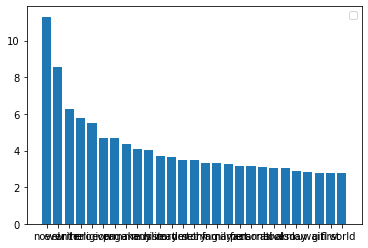

In [225]:
import matplotlib
import matplotlib.pyplot as plt

labels = [w[0] for w in words_scores] # the label locations
scores = [w[1] for w in words_scores] # the label locations
x = np.arange(len(labels))              # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x, scores)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)

fig.tight_layout()

plt.show()


# HELPING METHODS

In [182]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import re
from collections import Counter
import liwc
import math
import json
import os
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.stem.isri import ISRIStemmer #ar
from nltk.stem.porter import * #eng


def extract_classify_test(features,classes,kf=0):
    
    f_kbest_k = features
    
    if kf != 0:
        sel_k = SelectKBest(chi2, k=kf)
        f_kbest_k = sel_k.fit_transform(features, classes)
    
    ####### Build the model 
    
    #Create Labels and integer classes
    from sklearn import preprocessing

    le = preprocessing.LabelEncoder()
    le.fit(classes)
    print("Classes found : ", le.classes_)

    #Convert classes to integers for use with ML
    int_classes = le.transform(classes)
    print("\nClasses converted to integers :", int_classes)

    from sklearn.model_selection import train_test_split

    #Split as training and testing sets
    xtrain, xtest, ytrain, ytest = train_test_split(f_kbest_k, int_classes,random_state=1,test_size=0.1)
    
    
    ####### Classify & Test
    
    cm_acc = {"NB":(),"SVM":(),"DT":(),"RF":(),"NN":()}
    
    from sklearn.naive_bayes import MultinomialNB
    classifier_1 = MultinomialNB().fit(xtrain, ytrain)
    print("NB")
    cm_acc["NB"] = test(classifier_1,xtest,ytest)

    from sklearn import svm
    classifier_2 = svm.SVC(kernel='linear').fit(xtrain, ytrain)
    print("SVM")
    cm_acc["SVM"] = test(classifier_2,xtest,ytest)

    from sklearn import tree
    clf_3 = tree.DecisionTreeClassifier().fit(xtrain, ytrain)
    print("Decision Tree")
    cm_acc["DT"] = test(clf_3,xtest,ytest)

    from sklearn.ensemble import RandomForestClassifier

    clf_4 = RandomForestClassifier(max_depth=2, random_state=0).fit(xtrain,ytrain)
    print("Random Forest")
    cm_acc["RF"] = test(clf_4,xtest,ytest)

    from sklearn.neural_network import MLPClassifier
    clf_5 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 2), random_state=0, max_iter=10000).fit(xtrain,ytrain)
    print("NN")
    cm_acc["NN"] = test(clf_5,xtest,ytest)
    
    return cm_acc
    
def replace(x):
    if x != "helpful":
        return "not_helpful"
    else:
        return "helpful"

def test(clf,xtest,ytest):
    from sklearn import metrics
    
    #Predict on test data
    predictions=clf.predict(xtest)
    
    print("Confusion Matrix : ")
    cm = metrics.confusion_matrix(ytest, predictions)
    print(cm)
    
    accuracy = metrics.accuracy_score(ytest, predictions)
    prc = metrics.precision_score(ytest , predictions)
    recall = metrics.recall_score(ytest , predictions)
    f1 = metrics.f1_score(ytest , predictions)
    
    dec = 3
    
    print("Acc: ",round(accuracy,dec)," Prec: ",round(prc,dec)," Recall: ",round(recall,dec)," F1:",round(f1,dec))
    
    #if predictions.sum() != 0:
    #    precision = metrics.precision_score(ytest , predictions)
    #else:dsd
    #    precision = 0.0
    #print("Precision:",precision)
    #
    #print("------------------------")
    
    
    return(cm,accuracy,prc,recall,f1)
    #return(cm,accuracy,precision)
    
####### Features methods 


def extract_tfidf(reviews):
        
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords

    #setup wordnet for lemmatization
    nltk.download('wordnet')
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    from sklearn.feature_extraction.text import TfidfVectorizer

    #Custom tokenizer that will perform tokenization, stopword removal
    #and lemmatization
    def customtokenize(str):
        tokens=nltk.word_tokenize(str)

        #Replace special characters
        token_list2 = [word.replace("'", "") for word in tokens ]

        #Remove punctuations
        token_list3 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list2))

        #Convert to lower case
        token_list4=[word.lower() for word in token_list3 ]

        #remove stop words
        nostop = list(filter(lambda token: token not in stopwords.words('english'), token_list4))

        #lemmatized
        lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]

        return lemmatized

    #Generate TFIDF matrix
    vectorizer = TfidfVectorizer(tokenizer=customtokenize)
    tfidf = vectorizer.fit_transform(reviews)

    print("\nSample feature names identified : ", vectorizer.get_feature_names()[:25])
    print("\nSize of TFIDF matrix : ",tfidf.shape)

    return (tfidf,vectorizer)
    
def struct_extract(reviews):

    """
    review list(str): list of sentences 
    """
    
    #initiate dataframe
    results = pd.DataFrame(reviews)
    results.columns = ['review']

    #define local funcs
    def avg_sent_length(string):
        sentences = string.split('.')
        sum_len = 0        
        for i,s in enumerate(sentences):
            sum_len += len(s)
        return sum_len/len(sentences)

    def per_of_q(string):
    
        num_q = string.count("?")
        new_string = string.replace("?",".")
        sentences = new_string.split(".")
        
        return num_q/len(sentences)
    
    #extract feats
    results['length'] = results.review.apply(lambda x: len(x))
    results['num_tokens'] = results.review.apply(lambda x: len(x.split(' ')))
    results['num_sentences'] = results.review.apply(lambda x: x.count('.'))
    results['avg_sent_len'] = results.review.apply(lambda x: avg_sent_length(x))
    results['num_exclm_mark'] = results.review.apply(lambda x: x.count('!'))
    results['ratio_q'] = results.review.apply(lambda x: per_of_q(x))
    
    #drop the review
    results = results.drop(columns=['review'])
    
    #scale
    results = results - results.min()
    results = results / results.max()
    results = results.fillna(0)
    
    #save file
    return results

# GALC

def galc_extract(reviews):
    
    # read galc dictionary
    with open('galc_dict.json') as json_file:
        galc_dict = json.load(json_file)
    
    #init dataframe
    galc_feature = pd.DataFrame(np.zeros((len(reviews),len(galc_dict))))
    galc_feature.columns = list(galc_dict.keys())

    def galc_vector_feature(review):
        ps = PorterStemmer()
        dic = dict.fromkeys(galc_dict.keys(),0)

        for w in review.split(' '):
            word = w.replace('.','')
            stemmed = ps.stem(word)

            for categ,words in galc_dict.items():
                if stemmed in words:
                    dic[categ] += 1

        return dic.values()

    for i,r in galc_feature.iterrows():
        galc_feature.iloc[i] = galc_vector_feature(reviews[i])
        
    
    #scale
    galc_feature = galc_feature - galc_feature.min()
    galc_feature = galc_feature / galc_feature.max()
    galc_feature = galc_feature.fillna(0)

    #Save file
    return galc_feature


# LIWC 

def liwc_extract(reviews):
    import liwc
    parse, category_names = liwc.load_token_parser('LIWC2007_English100131.dic')

    # define helpers
    def tokenize(text):
        # you may want to use a smarter tokenizer
        for match in re.finditer(r'\w+', text, re.UNICODE):
            yield match.group(0)

    def liwc_features(text):
        
        dic = dict.fromkeys(category_names,0)

        gettysburg_tokens = tokenize(text)
        from collections import Counter
        gettysburg_counts = Counter(category for token in gettysburg_tokens for category in parse(token))

        for k,v in gettysburg_counts.items():
            dic[k] = v

        return dic.values()
    
    # init dataframe
    liwc_feature = pd.DataFrame(np.zeros((len(reviews),len(category_names))))
    liwc_feature.columns = category_names
    
    #extract feats
    for i,r in liwc_feature.iterrows():
        liwc_feature.iloc[i] = liwc_features(reviews[i])
    
    #scale
    liwc_feature = liwc_feature - liwc_feature.min()
    liwc_feature = liwc_feature / liwc_feature.max()
    liwc_feature = liwc_feature.fillna(0)

    #save file
    return liwc_feature

# INQURIER 

def inq_extract(reviews):
    
    #read inq
    inq = pd.read_excel('inquirerbasic.xls')
    inq_categs = list(inq.columns)
    
    #init dataframe
    inq_features = np.zeros((1,len(inq_categs)),dtype=int)

    #extract features 
    for review in reviews:
        inq_feat = dict.fromkeys(inq_categs,0)
        for w in review.split(' '):
            clean = w.strip().replace('.',"").replace("?",'').replace(",","").replace(";",'').upper()
            # if the word exists in the dictionary
            if len(inq[inq['Entry'] == clean]) > 0:
                row = inq[inq['Entry']==clean].to_dict()
                for k,v in row.items():
                    vv = list(v.values())[0]
                    if isinstance(vv,str):
                        inq_feat[k] += 1

        # convert the dict to one row features 
        inq_feat_row = np.array(list(inq_feat.values()),dtype=int).reshape((1,len(inq_categs)))

        #combine with big matrix
        inq_features = np.concatenate((inq_features,inq_feat_row),axis=0)
    
    
    #scale
    inq_features = pd.DataFrame(inq_features)
    inq_features = inq_features - inq_features.min()
    inq_features = inq_features / inq_features.max()
    inq_features = inq_features.fillna(0)
    
    # save file
    return inq_features

# extract aspects

def extract_aspects(reviews,aspects):
    aspect_reviews = np.zeros((len(reviews),len(aspects)))
    for i,review in enumerate(reviews):
        for j,aspect in enumerate(aspects):
            #count the number of occurances         
            aspect_reviews[i][j] = review.count(aspect)
    return aspect_reviews

def extract_aspects_df(reviews,aspects):
    
    aspect_reviews = np.zeros((len(reviews),len(aspects)))
    
    for i,review in enumerate(reviews):
        for j,aspect in enumerate(aspects):
            #count the number of occurances    
            print(aspect)
            aspect_reviews[i][j] = review.count(aspect)
    
    #make df
    aspect_reviews = pd.DataFrame(aspect_reviews)
    aspect_reviews.columns = aspects
    
    return aspect_reviews

# find max accuracy  

def find_max_acc(cm_acc):
    accs = [a[1] for a in cm_acc.values()]
    return max(accs)

def find_max_prec(cm_acc_pr):
    prcs = [a[2] for a in cm_acc_pr.values()]
    return max(prcs)
    ml
# join features 

def join_features(features_list):
    features = pd.DataFrame(features_list[0])
    for i in range(1,len(features_list)):
        f_2 = pd.DataFrame(features_list[i])
        cols_to_use = f_2.columns.difference(features.columns)
        features = features.join(f_2[cols_to_use])
    return features

def join_features_df(dfs_features_list):
    features = dfs_features_list[0]
    for i in range(1,len(dfs_features_list)):
        f_2 = dfs_features_list[i]
        cols_to_use = f_2.columns.difference(features.columns)
        features = features.join(f_2[cols_to_use])
    return features
    
# combine not helpful 

def combine_not_helpful(classes):
    return classes.map(lambda x: "not_helpful" if x != "helpful" else "helpful")


# extract test with best k

def ex_with_best_k(f,c,ks):
    
    # find all ks
    
    cm_accs = []
    
    for i in range(1,ks):
        print("k = ---------- ",i)
        sel_k = SelectKBest(chi2, k=i)
        f_kbest_k = sel_k.fit_transform(f, c)
        cm_acc = extract_classify_test(f_kbest_k,c)
        cm_accs.append(cm_acc)
    
    # find max acc
    
    max_accs = []
    for k,cm_acc in enumerate(cm_accs):
        max_accs.append(find_max_acc(cm_acc))
    max_a = max(max_accs)
    print(max_a)
    
    #find max precision
    
    #max_prc = []
    #for k,cm_acc in enumerate(cm_accs):
    #    max_prc.append(find_max_prec(cm_acc))
    #max_p = max(max_prc)
    #print(max_p)

def extract_aspects_stem_df(reviews,aspects,lang="en"):
    
    aspect_reviews = np.zeros((len(reviews),len(aspects)))
    stmr = PorterStemmer()
    if lang == "ar":
        stmr = ISRIStemmer()
    
    for i,review in enumerate(reviews):
        for j,aspect in enumerate(aspects):
            
            # Stem aspect
            word = aspect
            word_s = stmr.stem(word)
            
            # Review stem words
            rev_list = pd.Series(review.split(" "))
            rev_list.map(lambda x: stmr.stem(x))
            rev_list = rev_list.to_list()
            
            # Count the number of occurances    
            aspect_reviews[i][j] = rev_list.count(word_s)
    
    #make df
    aspect_reviews = pd.DataFrame(aspect_reviews)
    aspect_reviews.columns = aspects
    
    return aspect_reviews